In [3]:
#importing my packages
import patatmo
import pandas
import time
import os
import datetime
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

In [5]:
os.chdir('C:\\Users\donna\crowdsourd_raw\hallo')
print(os.getcwd())

#my credentials for the Netatmo API
username = '...'
password = '...'
client_id = '...'
client_secret = '...'

# my netatmo connect developer credentials
credentials = {"password" : password ,
               "username" : username,
               "client_id" : client_id,
               "client_secret": client_secret
              }

# configure the authentication
authentication = patatmo.api.authentication.Authentication(
    credentials=credentials,
    tmpfile = "temp_auth.json"
)

# create an api client
client = patatmo.api.client.NetatmoClient(authentication)

# lat/lon outline of The Hague in The Netherlands
hague_region = {
    "lat_ne" : 52.135036,
    "lat_sw" : 52.014848,
    "lon_ne" : 4.42249,
    "lon_sw" : 4.184998,
}

# issue the API request for getting public data
hague = client.Getpublicdata(region = hague_region)

#convert the public data to pandas DataFrame
hague_df = hague.dataframe()

device_id = hague_df.id
module_id = []
for i in range(len(hague.response["body"])):
    # only consider the module for outdoor measurement 
    md_id = list(hague.response['body'][i]['measures'].keys())[0]
    module_id.append(md_id)

raw_data_list = []
for i in range(len(device_id)):
    try:
        print("downloading first measurements of the stations"+str(i))
        measure = client.Getmeasure(device_id[i], module_id[i], date_begin=1546254000, scale="max").dataframe()
        raw_data_list.append(measure)
        print(len(raw_data_list))
    except: 
        print("there is something with the server. please wait for 20 seconds "+"to reset the code")
        time.sleep(20)
        
        continue 
print(raw_data_list)

C:\Users\donna\crowdsourd_raw\hallo
downloading first measurements of the stations0
1
downloading first measurements of the stations1
2
downloading first measurements of the stations2
3
downloading first measurements of the stations3
4
downloading first measurements of the stations4
5
downloading first measurements of the stations5
6
downloading first measurements of the stations6
7
downloading first measurements of the stations7
8
downloading first measurements of the stations8
9
downloading first measurements of the stations9
10
downloading first measurements of the stations10
11
downloading first measurements of the stations11
12
downloading first measurements of the stations12
13
downloading first measurements of the stations13
14
downloading first measurements of the stations14
15
downloading first measurements of the stations15
16
downloading first measurements of the stations16
17
downloading first measurements of the stations17
18
downloading first measurements of the stations1

156
downloading first measurements of the stations156
157
downloading first measurements of the stations157
158
downloading first measurements of the stations158
159
downloading first measurements of the stations159
160
downloading first measurements of the stations160
161
downloading first measurements of the stations161
162
downloading first measurements of the stations162
163
downloading first measurements of the stations163
164
downloading first measurements of the stations164
165
downloading first measurements of the stations165
166
downloading first measurements of the stations166
167
downloading first measurements of the stations167
168
downloading first measurements of the stations168
169
downloading first measurements of the stations169
170
downloading first measurements of the stations170
171
downloading first measurements of the stations171
172
downloading first measurements of the stations172
173
downloading first measurements of the stations173
174
downloading first measur

In [6]:
start_id = -1
for i in range(len(device_id)):
    print("downloading more measurements of the stations"+str(i))
    timenow = time.mktime(datetime.now().timetuple())
   
    if i <= start_id:
        pass 
    else: 
        while True:
            try:
            
                print('Current time: ',datetime.now())
                date_begin = time.mktime(raw_data_list[i].index[-1].timetuple())
                print(i)
               
                
                if timenow - date_begin <= 11825365 : 
# this difference is the difference between now and 2 jan 2020, so it stops with downloading when reaching 2 jan 2020              
                    break 
            
                measure = client.Getmeasure(device_id[i], module_id[i], date_begin=date_begin, date_end=timenow, scale="max")
                df = [raw_data_list[i], measure.dataframe()]
            
                df_concat = pd.concat(df)
                raw_data_list[i] = df_concat
                print("Crowded time "+str(raw_data_list[i].index[-1]))

            
                path = os.getcwd() 
                filename = device_id[i].replace(":","_")
                raw_data_list[i].to_csv(filename + " data2019")
        
            except:
                print('Error catched time: ', datetime.now())
                print('Wait for 20 seconds') 
            
                time.sleep(300)
            
                continue 
            
return raw_data_list

downloading more measurements of the stations0
Current time:  2020-05-28 13:04:04.657825
0
Crowded time 2019-07-15 14:42:32+00:00
Current time:  2020-05-28 13:04:05.275890
0
Crowded time 2019-07-19 03:41:18+00:00
Current time:  2020-05-28 13:04:05.667330
0
Crowded time 2019-07-22 16:54:26+00:00
Current time:  2020-05-28 13:04:06.173353
0
Crowded time 2019-07-26 07:32:45+00:00
Current time:  2020-05-28 13:04:06.636183
0
Crowded time 2019-07-29 20:32:35+00:00
Current time:  2020-05-28 13:04:07.122068
0
Crowded time 2019-08-02 09:33:23+00:00
Current time:  2020-05-28 13:04:07.524690
0
Crowded time 2019-08-06 22:08:01+00:00
Current time:  2020-05-28 13:04:08.040295
0
Crowded time 2019-08-10 11:10:12+00:00
Current time:  2020-05-28 13:04:08.497302
0
Crowded time 2019-08-14 00:12:16+00:00
Current time:  2020-05-28 13:04:09.837963
0
Crowded time 2019-08-17 13:04:40+00:00
Current time:  2020-05-28 13:04:11.184815
0
Crowded time 2019-08-21 02:03:26+00:00
Current time:  2020-05-28 13:04:12.28287

Current time:  2020-05-28 13:05:20.923227
3
Crowded time 2019-04-18 01:35:36+00:00
Current time:  2020-05-28 13:05:21.747712
3
Crowded time 2019-04-21 14:54:03+00:00
Current time:  2020-05-28 13:05:22.435504
3
Crowded time 2019-04-25 03:58:03+00:00
Current time:  2020-05-28 13:05:23.342277
3
Crowded time 2019-04-28 16:50:58+00:00
Current time:  2020-05-28 13:05:24.074753
3
Crowded time 2019-05-02 06:13:20+00:00
Current time:  2020-05-28 13:05:24.828760
3
Crowded time 2019-05-05 19:16:30+00:00
Current time:  2020-05-28 13:05:25.588338
3
Crowded time 2019-05-09 19:16:47+00:00
Current time:  2020-05-28 13:05:26.379880
3
Crowded time 2019-05-13 08:34:21+00:00
Current time:  2020-05-28 13:05:27.247823
3
Crowded time 2019-05-16 21:49:27+00:00
Current time:  2020-05-28 13:05:28.239511
3
Crowded time 2019-05-20 11:07:08+00:00
Current time:  2020-05-28 13:05:29.390986
3
Crowded time 2019-05-24 00:30:35+00:00
Current time:  2020-05-28 13:05:30.293557
3
Crowded time 2019-05-29 15:27:15+00:00
Curr

Current time:  2020-05-28 13:07:08.695256
4
Crowded time 2019-04-25 00:23:23+00:00
Current time:  2020-05-28 13:07:09.366110
4
Crowded time 2019-04-28 13:43:37+00:00
Current time:  2020-05-28 13:07:10.046011
4
Crowded time 2019-05-02 03:02:21+00:00
Current time:  2020-05-28 13:07:10.733444
4
Crowded time 2019-05-05 16:20:53+00:00
Current time:  2020-05-28 13:07:11.451089
4
Crowded time 2019-05-09 05:39:24+00:00
Current time:  2020-05-28 13:07:12.191734
4
Crowded time 2019-05-12 18:59:38+00:00
Current time:  2020-05-28 13:07:12.862913
4
Crowded time 2019-05-16 08:19:54+00:00
Current time:  2020-05-28 13:07:13.526326
4
Crowded time 2019-05-19 21:40:08+00:00
Current time:  2020-05-28 13:07:14.234208
4
Crowded time 2019-05-23 11:00:21+00:00
Current time:  2020-05-28 13:07:15.154785
4
Crowded time 2019-05-27 17:15:41+00:00
Current time:  2020-05-28 13:07:15.913637
4
Crowded time 2019-05-31 06:36:47+00:00
Current time:  2020-05-28 13:07:16.728703
4
Crowded time 2019-06-03 19:50:37+00:00
Curr

Current time:  2020-05-28 13:08:40.228663
5
Crowded time 2019-05-05 01:47:20+00:00
Current time:  2020-05-28 13:08:40.938503
5
Crowded time 2019-05-08 14:31:28+00:00
Current time:  2020-05-28 13:08:41.635026
5
Crowded time 2019-05-12 03:14:46+00:00
Current time:  2020-05-28 13:08:42.748952
5
Crowded time 2019-05-15 15:57:13+00:00
Current time:  2020-05-28 13:08:43.455908
5
Crowded time 2019-05-19 04:37:06+00:00
Current time:  2020-05-28 13:08:44.134164
5
Crowded time 2019-05-22 17:22:14+00:00
Current time:  2020-05-28 13:08:44.825567
5
Crowded time 2019-05-26 06:01:16+00:00
Current time:  2020-05-28 13:08:45.607948
5
Crowded time 2019-05-29 18:44:33+00:00
Current time:  2020-05-28 13:08:46.352022
5
Crowded time 2019-06-02 07:27:52+00:00
Current time:  2020-05-28 13:08:47.118710
5
Crowded time 2019-06-05 20:12:54+00:00
Current time:  2020-05-28 13:08:47.987319
5
Crowded time 2019-06-09 08:51:03+00:00
Current time:  2020-05-28 13:08:48.762236
5
Crowded time 2019-06-12 21:29:14+00:00
Curr

Crowded time 2019-03-12 03:43:00+00:00
Current time:  2020-05-28 13:10:15.203197
7
Crowded time 2019-03-15 15:16:17+00:00
Current time:  2020-05-28 13:10:15.890621
7
Crowded time 2019-03-19 03:40:53+00:00
Current time:  2020-05-28 13:10:16.624966
7
Crowded time 2019-03-22 16:52:28+00:00
Current time:  2020-05-28 13:10:17.267611
7
Crowded time 2019-03-26 05:41:50+00:00
Current time:  2020-05-28 13:10:17.992608
7
Crowded time 2019-03-29 18:46:34+00:00
Current time:  2020-05-28 13:10:18.633075
7
Crowded time 2019-04-02 07:43:37+00:00
Current time:  2020-05-28 13:10:19.328978
7
Crowded time 2019-04-05 20:44:57+00:00
Current time:  2020-05-28 13:10:20.024149
7
Crowded time 2019-04-09 09:36:00+00:00
Current time:  2020-05-28 13:10:20.709783
7
Crowded time 2019-04-12 22:47:36+00:00
Current time:  2020-05-28 13:10:21.485537
7
Crowded time 2019-04-16 11:37:23+00:00
Current time:  2020-05-28 13:10:22.260513
7
Crowded time 2019-04-20 00:14:46+00:00
Current time:  2020-05-28 13:10:23.016712
7
Crow

Crowded time 2019-04-06 23:13:14+00:00
Current time:  2020-05-28 13:12:01.574643
8
Crowded time 2019-04-10 12:48:21+00:00
Current time:  2020-05-28 13:12:02.168876
8
Crowded time 2019-04-14 20:14:50+00:00
Current time:  2020-05-28 13:12:02.744847
8
Crowded time 2019-04-18 09:25:23+00:00
Current time:  2020-05-28 13:12:03.357349
8
Crowded time 2019-04-22 04:49:31+00:00
Current time:  2020-05-28 13:12:03.972657
8
Crowded time 2019-04-26 07:23:44+00:00
Current time:  2020-05-28 13:12:04.590068
8
Crowded time 2019-04-30 08:34:17+00:00
Current time:  2020-05-28 13:12:05.485267
8
Crowded time 2019-05-04 03:14:06+00:00
Current time:  2020-05-28 13:12:06.130964
8
Crowded time 2019-05-07 15:42:21+00:00
Current time:  2020-05-28 13:12:06.755282
8
Crowded time 2019-05-11 04:31:58+00:00
Current time:  2020-05-28 13:12:07.459405
8
Crowded time 2019-05-25 21:35:37+00:00
Current time:  2020-05-28 13:12:08.058210
8
Crowded time 2019-05-29 11:00:22+00:00
Current time:  2020-05-28 13:12:08.771053
8
Crow

Crowded time 2019-05-04 03:14:06+00:00
Current time:  2020-05-28 14:08:44.498338
9
Crowded time 2019-05-07 15:42:21+00:00
Current time:  2020-05-28 14:08:45.294178
9
Crowded time 2019-05-11 04:31:58+00:00
Current time:  2020-05-28 14:08:46.042350
9
Crowded time 2019-05-25 21:35:37+00:00
Current time:  2020-05-28 14:08:46.898801
9
Crowded time 2019-05-29 11:00:22+00:00
Current time:  2020-05-28 14:08:47.766385
9
Crowded time 2019-06-02 09:32:03+00:00
Current time:  2020-05-28 14:08:48.692884
9
Crowded time 2019-06-20 04:56:36+00:00
Current time:  2020-05-28 14:08:49.775516
9
Crowded time 2019-06-23 19:09:22+00:00
Current time:  2020-05-28 14:08:50.931623
9
Crowded time 2019-06-27 07:54:57+00:00
Current time:  2020-05-28 14:08:51.872919
9
Crowded time 2019-06-30 21:26:16+00:00
Current time:  2020-05-28 14:08:52.830019
9
Crowded time 2019-07-04 10:19:53+00:00
Current time:  2020-05-28 14:08:53.926207
9
Crowded time 2019-07-07 23:36:07+00:00
Current time:  2020-05-28 14:08:54.872422
9
Crow

Current time:  2020-05-28 14:11:08.901354
10
Crowded time 2019-05-21 18:19:01+00:00
Current time:  2020-05-28 14:11:09.967354
10
Crowded time 2019-05-25 07:16:17+00:00
Current time:  2020-05-28 14:11:11.261085
10
Crowded time 2019-05-28 20:38:57+00:00
Current time:  2020-05-28 14:11:16.215243
10
Crowded time 2019-06-01 11:08:35+00:00
Current time:  2020-05-28 14:11:17.816684
10
Crowded time 2019-06-05 00:03:17+00:00
Current time:  2020-05-28 14:11:19.280776
10
Crowded time 2019-06-08 20:31:17+00:00
Current time:  2020-05-28 14:11:20.595827
10
Crowded time 2019-06-12 09:25:59+00:00
Current time:  2020-05-28 14:11:21.861797
10
Crowded time 2019-06-15 22:24:31+00:00
Current time:  2020-05-28 14:11:23.001933
10
Crowded time 2019-06-19 11:21:08+00:00
Current time:  2020-05-28 14:11:24.068617
10
Crowded time 2019-06-23 00:19:15+00:00
Current time:  2020-05-28 14:11:25.383940
10
Crowded time 2019-06-26 13:01:08+00:00
Current time:  2020-05-28 14:11:26.603858
10
Crowded time 2019-06-30 01:52:2

Crowded time 2019-04-24 23:03:32+00:00
Current time:  2020-05-28 14:14:14.779120
11
Crowded time 2019-04-28 12:45:03+00:00
Current time:  2020-05-28 14:14:16.830112
11
Crowded time 2019-05-02 01:57:26+00:00
Current time:  2020-05-28 14:14:21.536741
11
Crowded time 2019-05-05 17:23:18+00:00
Current time:  2020-05-28 14:14:27.067982
11
Crowded time 2019-05-09 08:07:40+00:00
Current time:  2020-05-28 14:14:28.335257
11
Crowded time 2019-05-12 22:19:19+00:00
Current time:  2020-05-28 14:14:29.530376
11
Crowded time 2019-05-16 12:13:46+00:00
Current time:  2020-05-28 14:14:30.492825
11
Crowded time 2019-05-20 01:59:34+00:00
Current time:  2020-05-28 14:14:31.902128
11
Crowded time 2019-05-23 14:58:16+00:00
Current time:  2020-05-28 14:14:33.020175
11
Crowded time 2019-05-27 04:03:47+00:00
Current time:  2020-05-28 14:14:34.117059
11
Crowded time 2019-05-30 16:47:06+00:00
Current time:  2020-05-28 14:14:38.557091
11
Crowded time 2019-06-03 05:51:47+00:00
Current time:  2020-05-28 14:14:39.58

Current time:  2020-05-28 14:17:10.874385
13
Crowded time 2019-04-16 08:23:58+00:00
Current time:  2020-05-28 14:17:11.940352
13
Crowded time 2019-04-19 21:43:43+00:00
Current time:  2020-05-28 14:17:13.001523
13
Crowded time 2019-04-23 10:44:54+00:00
Current time:  2020-05-28 14:17:14.254522
13
Crowded time 2019-04-26 23:12:13+00:00
Current time:  2020-05-28 14:17:15.102901
13
Crowded time 2019-04-30 11:59:55+00:00
Current time:  2020-05-28 14:17:15.970358
13
Crowded time 2019-05-04 00:34:56+00:00
Current time:  2020-05-28 14:17:16.984818
13
Crowded time 2019-05-07 13:21:55+00:00
Current time:  2020-05-28 14:17:18.062532
13
Crowded time 2019-05-11 02:08:51+00:00
Current time:  2020-05-28 14:17:19.112128
13
Crowded time 2019-06-01 08:01:10+00:00
Current time:  2020-05-28 14:17:20.188563
13
Crowded time 2019-06-04 21:02:39+00:00
Current time:  2020-05-28 14:17:21.728315
13
Crowded time 2019-06-08 09:32:33+00:00
Current time:  2020-05-28 14:17:23.128630
13
Crowded time 2019-06-11 22:29:3

Crowded time 2019-04-23 11:45:24+00:00
Current time:  2020-05-28 14:19:38.581800
15
Crowded time 2019-04-27 00:36:25+00:00
Current time:  2020-05-28 14:19:39.406785
15
Crowded time 2019-04-30 14:25:45+00:00
Current time:  2020-05-28 14:19:43.779170
15
Crowded time 2019-05-04 07:05:51+00:00
Current time:  2020-05-28 14:19:44.591853
15
Crowded time 2019-05-07 19:56:51+00:00
Current time:  2020-05-28 14:19:45.508657
15
Crowded time 2019-05-11 09:26:39+00:00
Current time:  2020-05-28 14:19:46.712863
15
Crowded time 2019-05-15 11:10:12+00:00
Current time:  2020-05-28 14:19:47.956728
15
Crowded time 2019-05-19 05:57:06+00:00
Current time:  2020-05-28 14:19:49.605770
15
Crowded time 2019-05-22 21:31:38+00:00
Current time:  2020-05-28 14:19:50.703977
15
Crowded time 2019-05-26 10:34:03+00:00
Current time:  2020-05-28 14:19:51.874007
15
Crowded time 2019-05-30 00:59:17+00:00
Current time:  2020-05-28 14:19:56.390262
15
Crowded time 2019-06-02 14:04:03+00:00
Current time:  2020-05-28 14:19:57.64

Crowded time 2019-04-28 22:11:38+00:00
Current time:  2020-05-28 15:12:00.549243
16
Crowded time 2019-05-02 11:15:30+00:00
Current time:  2020-05-28 15:12:01.160225
16
Crowded time 2019-05-06 00:36:27+00:00
Current time:  2020-05-28 15:12:02.599116
16
Crowded time 2019-05-09 13:40:21+00:00
Current time:  2020-05-28 15:12:03.353836
16
Crowded time 2019-05-13 02:41:39+00:00
Current time:  2020-05-28 15:12:04.143869
16
Crowded time 2019-05-16 15:45:32+00:00
Current time:  2020-05-28 15:12:04.873509
16
Crowded time 2019-05-20 04:49:24+00:00
Current time:  2020-05-28 15:12:05.705584
16
Crowded time 2019-05-23 17:53:17+00:00
Current time:  2020-05-28 15:12:06.405038
16
Crowded time 2019-05-27 06:53:12+00:00
Current time:  2020-05-28 15:12:07.108449
16
Crowded time 2019-05-30 20:06:29+00:00
Current time:  2020-05-28 15:12:07.839095
16
Crowded time 2019-06-04 06:56:31+00:00
Current time:  2020-05-28 15:12:08.860815
16
Crowded time 2019-06-07 20:09:09+00:00
Current time:  2020-05-28 15:12:09.61

Current time:  2020-05-28 15:14:18.641030
18
Crowded time 2019-10-13 17:30:26+00:00
Current time:  2020-05-28 15:14:20.208404
18
Crowded time 2019-10-17 06:34:28+00:00
Current time:  2020-05-28 15:14:21.267578
18
Crowded time 2020-01-24 04:29:38+00:00
Current time:  2020-05-28 15:14:21.999291
18
downloading more measurements of the stations19
Current time:  2020-05-28 15:14:21.999291
19
Crowded time 2019-01-07 17:24:05+00:00
Current time:  2020-05-28 15:14:22.586432
19
Crowded time 2019-01-11 06:41:41+00:00
Current time:  2020-05-28 15:14:23.124363
19
Crowded time 2019-01-14 20:55:41+00:00
Current time:  2020-05-28 15:14:23.668534
19
Crowded time 2019-01-18 09:57:04+00:00
Current time:  2020-05-28 15:14:24.226175
19
Crowded time 2019-01-21 23:07:49+00:00
Current time:  2020-05-28 15:14:24.789854
19
Crowded time 2019-01-25 12:28:00+00:00
Current time:  2020-05-28 15:14:25.329060
19
Crowded time 2019-01-29 23:20:28+00:00
Current time:  2020-05-28 15:14:25.907729
19
Crowded time 2019-02-0

Crowded time 2019-04-26 07:12:03+00:00
Current time:  2020-05-28 15:16:05.650606
20
Crowded time 2019-04-29 20:37:47+00:00
Current time:  2020-05-28 15:16:06.633633
20
Crowded time 2019-05-03 11:03:14+00:00
Current time:  2020-05-28 15:16:08.252190
20
Crowded time 2019-05-06 23:15:05+00:00
Current time:  2020-05-28 15:16:09.355559
20
Crowded time 2019-05-10 12:07:57+00:00
Current time:  2020-05-28 15:16:10.536488
20
Crowded time 2019-05-14 01:06:46+00:00
Current time:  2020-05-28 15:16:11.567898
20
Crowded time 2019-05-17 13:50:15+00:00
Current time:  2020-05-28 15:16:12.649314
20
Crowded time 2019-05-21 02:25:09+00:00
Current time:  2020-05-28 15:16:13.702814
20
Crowded time 2019-05-24 15:19:12+00:00
Current time:  2020-05-28 15:16:14.782507
20
Crowded time 2019-05-28 04:03:51+00:00
Current time:  2020-05-28 15:16:15.800919
20
Crowded time 2019-05-31 17:00:58+00:00
Current time:  2020-05-28 15:16:16.911436
20
Crowded time 2019-06-04 05:58:58+00:00
Current time:  2020-05-28 15:16:17.91

Current time:  2020-05-28 15:18:13.081205
21
Crowded time 2019-03-29 06:35:05+00:00
Current time:  2020-05-28 15:18:13.743826
21
Crowded time 2019-04-01 19:04:03+00:00
Current time:  2020-05-28 15:18:14.438460
21
Crowded time 2019-04-05 07:39:33+00:00
Current time:  2020-05-28 15:18:15.932661
21
Crowded time 2019-04-08 20:09:43+00:00
Current time:  2020-05-28 15:18:16.612465
21
Crowded time 2019-04-12 08:41:09+00:00
Current time:  2020-05-28 15:18:17.355041
21
Crowded time 2019-04-15 21:20:17+00:00
Current time:  2020-05-28 15:18:18.308359
21
Crowded time 2019-04-19 09:45:02+00:00
Current time:  2020-05-28 15:18:19.041513
21
Crowded time 2019-04-23 00:17:36+00:00
Current time:  2020-05-28 15:18:19.825082
21
Crowded time 2019-04-26 12:40:54+00:00
Current time:  2020-05-28 15:18:20.539594
21
Crowded time 2019-04-30 01:21:46+00:00
Current time:  2020-05-28 15:18:21.234197
21
Crowded time 2019-05-03 14:20:40+00:00
Current time:  2020-05-28 15:18:22.082306
21
Crowded time 2019-05-07 03:16:0

Crowded time 2019-02-19 19:29:42+00:00
Current time:  2020-05-28 15:20:04.817693
22
Crowded time 2019-02-23 08:07:51+00:00
Current time:  2020-05-28 15:20:05.418370
22
Crowded time 2019-02-26 21:11:27+00:00
Current time:  2020-05-28 15:20:06.152177
22
Crowded time 2019-03-02 13:20:42+00:00
Current time:  2020-05-28 15:20:06.901747
22
Crowded time 2019-03-06 18:40:52+00:00
Current time:  2020-05-28 15:20:07.731283
22
Crowded time 2019-03-10 11:35:04+00:00
Current time:  2020-05-28 15:20:08.375913
22
Crowded time 2019-03-14 00:49:40+00:00
Current time:  2020-05-28 15:20:09.197762
22
Crowded time 2019-03-17 14:21:28+00:00
Current time:  2020-05-28 15:20:09.881140
22
Crowded time 2019-03-21 03:13:39+00:00
Current time:  2020-05-28 15:20:10.880953
22
Crowded time 2019-03-24 17:21:01+00:00
Current time:  2020-05-28 15:20:11.697787
22
Crowded time 2019-03-28 06:36:47+00:00
Current time:  2020-05-28 15:20:12.722316
22
Crowded time 2019-03-31 19:26:11+00:00
Current time:  2020-05-28 15:20:13.51

Current time:  2020-05-28 16:11:43.939045
22
downloading more measurements of the stations23
Current time:  2020-05-28 16:11:43.941039
23
Crowded time 2020-01-11 13:18:19+00:00
Current time:  2020-05-28 16:11:44.370093
23
Crowded time 2020-01-15 01:54:12+00:00
Current time:  2020-05-28 16:11:44.791727
23
downloading more measurements of the stations24
Current time:  2020-05-28 16:11:44.791727
24
Crowded time 2019-01-07 15:29:47+00:00
Current time:  2020-05-28 16:11:45.328958
24
Crowded time 2019-01-11 04:10:09+00:00
Current time:  2020-05-28 16:11:45.814561
24
Crowded time 2019-01-14 16:41:49+00:00
Current time:  2020-05-28 16:11:46.302931
24
Crowded time 2019-01-18 05:27:40+00:00
Current time:  2020-05-28 16:11:46.787547
24
Crowded time 2019-01-21 18:01:01+00:00
Current time:  2020-05-28 16:11:47.233264
24
Crowded time 2019-01-25 06:34:23+00:00
Current time:  2020-05-28 16:11:47.736730
24
Crowded time 2019-01-28 19:08:36+00:00
Current time:  2020-05-28 16:11:48.198896
24
Crowded time 

Crowded time 2019-12-01 21:56:51+00:00
Current time:  2020-05-28 16:13:17.892934
24
Crowded time 2019-12-05 10:14:49+00:00
Current time:  2020-05-28 16:13:19.430538
24
Crowded time 2019-12-08 22:44:14+00:00
Current time:  2020-05-28 16:13:20.864605
24
Crowded time 2019-12-12 11:17:36+00:00
Current time:  2020-05-28 16:13:23.555790
24
Crowded time 2019-12-15 23:44:59+00:00
Current time:  2020-05-28 16:13:24.926006
24
Crowded time 2019-12-19 12:40:14+00:00
Current time:  2020-05-28 16:13:26.436042
24
Crowded time 2019-12-23 02:05:24+00:00
Current time:  2020-05-28 16:13:27.990037
24
Crowded time 2019-12-26 14:24:15+00:00
Current time:  2020-05-28 16:13:29.512545
24
Crowded time 2019-12-30 03:02:56+00:00
Current time:  2020-05-28 16:13:31.006463
24
Crowded time 2020-01-02 16:13:55+00:00
Current time:  2020-05-28 16:13:32.798324
24
Crowded time 2020-01-06 05:21:27+00:00
Current time:  2020-05-28 16:13:34.478364
24
Crowded time 2020-01-09 18:51:01+00:00
Current time:  2020-05-28 16:13:36.07

Current time:  2020-05-28 16:14:33.860347
28
Crowded time 2019-05-13 22:37:10+00:00
Current time:  2020-05-28 16:14:34.662468
28
Crowded time 2019-05-17 11:45:09+00:00
Current time:  2020-05-28 16:14:35.554732
28
Crowded time 2019-05-21 00:38:43+00:00
Current time:  2020-05-28 16:14:36.420715
28
Crowded time 2019-05-31 19:14:42+00:00
Current time:  2020-05-28 16:14:37.466604
28
Crowded time 2019-06-04 09:14:06+00:00
Current time:  2020-05-28 16:14:38.480705
28
Crowded time 2019-06-13 12:37:29+00:00
Current time:  2020-05-28 16:14:39.414615
28
Crowded time 2019-06-17 01:52:25+00:00
Current time:  2020-05-28 16:14:40.349855
28
Crowded time 2019-06-20 14:57:56+00:00
Current time:  2020-05-28 16:14:41.276643
28
Crowded time 2019-06-24 04:46:44+00:00
Current time:  2020-05-28 16:14:42.256193
28
Crowded time 2019-06-27 17:24:04+00:00
Current time:  2020-05-28 16:14:43.399787
28
Crowded time 2019-07-01 06:12:31+00:00
Current time:  2020-05-28 16:14:44.358602
28
Crowded time 2019-07-04 19:01:4

Crowded time 2019-04-24 04:17:36+00:00
Current time:  2020-05-28 16:16:24.733481
29
Crowded time 2019-04-27 17:28:48+00:00
Current time:  2020-05-28 16:16:25.506646
29
Crowded time 2019-05-01 06:36:03+00:00
Current time:  2020-05-28 16:16:26.478355
29
Crowded time 2019-05-04 19:47:52+00:00
Current time:  2020-05-28 16:16:27.259739
29
Crowded time 2019-05-08 10:38:04+00:00
Current time:  2020-05-28 16:16:28.046295
29
Crowded time 2019-05-11 23:45:13+00:00
Current time:  2020-05-28 16:16:28.899865
29
Crowded time 2019-05-15 12:56:50+00:00
Current time:  2020-05-28 16:16:29.858390
29
Crowded time 2019-05-19 02:08:14+00:00
Current time:  2020-05-28 16:16:31.229803
29
Crowded time 2019-05-22 15:19:34+00:00
Current time:  2020-05-28 16:16:32.194009
29
Crowded time 2019-05-26 04:31:55+00:00
Current time:  2020-05-28 16:16:33.065226
29
Crowded time 2019-05-29 17:53:36+00:00
Current time:  2020-05-28 16:16:34.062682
29
Crowded time 2019-06-02 07:05:08+00:00
Current time:  2020-05-28 16:16:35.18

Current time:  2020-05-28 16:18:08.694395
30
Crowded time 2019-08-08 19:42:08+00:00
Current time:  2020-05-28 16:18:09.511286
30
Crowded time 2019-08-12 08:50:16+00:00
Current time:  2020-05-28 16:18:10.387443
30
Crowded time 2019-08-15 21:59:29+00:00
Current time:  2020-05-28 16:18:11.343446
30
Crowded time 2019-08-19 11:07:38+00:00
Current time:  2020-05-28 16:18:12.133012
30
Crowded time 2019-08-23 00:39:04+00:00
Current time:  2020-05-28 16:18:12.997395
30
Crowded time 2019-08-26 13:47:12+00:00
Current time:  2020-05-28 16:18:13.961643
30
Crowded time 2019-08-30 02:54:30+00:00
Current time:  2020-05-28 16:18:14.827428
30
Crowded time 2019-09-02 16:03:31+00:00
Current time:  2020-05-28 16:18:15.688609
30
Crowded time 2019-09-06 05:13:22+00:00
Current time:  2020-05-28 16:18:16.617266
30
Crowded time 2019-09-09 18:24:04+00:00
Current time:  2020-05-28 16:18:17.609114
30
Crowded time 2019-09-13 07:33:55+00:00
Current time:  2020-05-28 16:18:18.555529
30
Crowded time 2019-09-16 20:52:3

Crowded time 2019-10-07 09:26:05+00:00
Current time:  2020-05-28 16:19:43.071213
31
Crowded time 2019-10-10 21:56:09+00:00
Current time:  2020-05-28 16:19:44.067535
31
Crowded time 2019-10-14 10:18:29+00:00
Current time:  2020-05-28 16:19:45.123223
31
Crowded time 2019-10-17 23:25:11+00:00
Current time:  2020-05-28 16:19:46.152195
31
Crowded time 2019-10-21 11:53:37+00:00
Current time:  2020-05-28 16:19:47.208499
31
Crowded time 2019-10-25 00:36:55+00:00
Current time:  2020-05-28 16:19:48.280427
31
Crowded time 2019-10-28 15:51:27+00:00
Current time:  2020-05-28 16:19:49.476383
31
Crowded time 2019-11-01 04:27:36+00:00
Current time:  2020-05-28 16:19:51.041679
31
Crowded time 2019-11-04 17:00:38+00:00
Current time:  2020-05-28 16:19:52.207510
31
Crowded time 2019-11-08 05:49:21+00:00
Current time:  2020-05-28 16:19:53.262651
31
Crowded time 2019-11-11 18:24:12+00:00
Current time:  2020-05-28 16:19:54.592689
31
Crowded time 2019-11-15 06:57:15+00:00
Current time:  2020-05-28 16:19:55.65

Crowded time 2019-02-11 21:29:26+00:00
Current time:  2020-05-28 17:16:01.611221
33
Crowded time 2019-02-15 10:07:55+00:00
Current time:  2020-05-28 17:16:03.570903
33
Crowded time 2019-02-18 22:40:44+00:00
Current time:  2020-05-28 17:16:04.197355
33
Crowded time 2019-02-22 11:28:37+00:00
Current time:  2020-05-28 17:16:04.881423
33
Crowded time 2019-02-26 00:09:19+00:00
Current time:  2020-05-28 17:16:05.639523
33
Crowded time 2019-03-01 12:49:55+00:00
Current time:  2020-05-28 17:16:06.383279
33
Crowded time 2019-03-05 01:27:33+00:00
Current time:  2020-05-28 17:16:07.278798
33
Crowded time 2019-03-08 14:23:06+00:00
Current time:  2020-05-28 17:16:08.082922
33
Crowded time 2019-03-12 02:59:23+00:00
Current time:  2020-05-28 17:16:08.876563
33
Crowded time 2019-03-15 15:35:17+00:00
Current time:  2020-05-28 17:16:09.681757
33
Crowded time 2019-03-19 04:13:46+00:00
Current time:  2020-05-28 17:16:10.484467
33
Crowded time 2019-03-22 16:49:59+00:00
Current time:  2020-05-28 17:16:11.15

Crowded time 2019-02-09 06:32:05+00:00
Current time:  2020-05-28 17:18:06.089880
34
Crowded time 2019-02-12 19:57:19+00:00
Current time:  2020-05-28 17:18:06.629570
34
Crowded time 2019-02-16 09:27:15+00:00
Current time:  2020-05-28 17:18:07.558012
34
Crowded time 2019-02-19 22:22:46+00:00
Current time:  2020-05-28 17:18:08.280035
34
Crowded time 2019-02-23 11:16:29+00:00
Current time:  2020-05-28 17:18:08.850872
34
Crowded time 2019-02-27 00:31:21+00:00
Current time:  2020-05-28 17:18:09.484762
34
Crowded time 2019-03-02 13:19:12+00:00
Current time:  2020-05-28 17:18:10.038442
34
Crowded time 2019-03-06 02:12:56+00:00
Current time:  2020-05-28 17:18:10.786263
34
Crowded time 2019-03-09 15:01:31+00:00
Current time:  2020-05-28 17:18:11.747468
34
Crowded time 2019-03-13 03:55:14+00:00
Current time:  2020-05-28 17:18:12.385673
34
Crowded time 2019-03-16 16:48:39+00:00
Current time:  2020-05-28 17:18:13.339293
34
Crowded time 2019-03-20 05:37:14+00:00
Current time:  2020-05-28 17:18:14.10

Crowded time 2019-01-28 20:53:18+00:00
Current time:  2020-05-28 17:19:56.822064
35
Crowded time 2019-02-01 09:45:57+00:00
Current time:  2020-05-28 17:19:57.619891
35
Crowded time 2019-02-04 22:41:23+00:00
Current time:  2020-05-28 17:19:58.224902
35
Crowded time 2019-02-08 11:43:20+00:00
Current time:  2020-05-28 17:19:59.369360
35
Crowded time 2019-02-12 07:26:32+00:00
Current time:  2020-05-28 17:20:00.190680
35
Crowded time 2019-02-15 21:09:31+00:00
Current time:  2020-05-28 17:20:00.901903
35
Crowded time 2019-02-19 10:07:11+00:00
Current time:  2020-05-28 17:20:01.670540
35
Crowded time 2019-02-22 23:12:07+00:00
Current time:  2020-05-28 17:20:02.453010
35
Crowded time 2019-02-26 12:32:00+00:00
Current time:  2020-05-28 17:20:03.620945
35
Crowded time 2019-03-02 01:31:23+00:00
Current time:  2020-05-28 17:20:04.390502
35
Crowded time 2019-03-05 14:42:44+00:00
Current time:  2020-05-28 17:20:05.381920
35
Crowded time 2019-03-09 04:46:32+00:00
Current time:  2020-05-28 17:20:06.05

Crowded time 2019-02-09 19:33:05+00:00
Current time:  2020-05-28 17:21:53.590266
36
Crowded time 2019-02-13 12:51:35+00:00
Current time:  2020-05-28 17:21:54.096974
36
Crowded time 2019-02-17 01:52:08+00:00
Current time:  2020-05-28 17:21:55.028423
36
Crowded time 2019-02-20 14:44:39+00:00
Current time:  2020-05-28 17:21:55.730079
36
Crowded time 2019-02-24 22:14:13+00:00
Current time:  2020-05-28 17:21:59.852610
36
Crowded time 2019-02-28 11:06:59+00:00
Current time:  2020-05-28 17:22:00.475927
36
Crowded time 2019-03-04 09:10:51+00:00
Current time:  2020-05-28 17:22:01.179525
36
Crowded time 2019-03-07 22:03:36+00:00
Current time:  2020-05-28 17:22:02.004372
36
Crowded time 2019-03-11 10:56:22+00:00
Current time:  2020-05-28 17:22:02.733957
36
Crowded time 2019-03-14 23:46:19+00:00
Current time:  2020-05-28 17:22:03.489316
36
Crowded time 2019-03-22 17:37:13+00:00
Current time:  2020-05-28 17:22:04.250880
36
Crowded time 2019-03-26 06:42:26+00:00
Current time:  2020-05-28 17:22:05.07

Crowded time 2019-01-28 20:56:19+00:00
Current time:  2020-05-28 17:23:49.167086
37
Crowded time 2019-02-01 09:51:00+00:00
Current time:  2020-05-28 17:23:49.722246
37
Crowded time 2019-02-04 22:25:42+00:00
Current time:  2020-05-28 17:23:50.429089
37
Crowded time 2019-02-08 10:40:44+00:00
Current time:  2020-05-28 17:23:51.318922
37
Crowded time 2019-02-11 22:34:26+00:00
Current time:  2020-05-28 17:23:52.074125
37
Crowded time 2019-02-15 14:37:24+00:00
Current time:  2020-05-28 17:23:52.893043
37
Crowded time 2019-02-19 18:06:37+00:00
Current time:  2020-05-28 17:23:53.505693
37
Crowded time 2019-02-23 06:57:33+00:00
Current time:  2020-05-28 17:23:54.244974
37
Crowded time 2019-02-26 19:56:09+00:00
Current time:  2020-05-28 17:23:54.952155
37
Crowded time 2019-03-02 08:43:59+00:00
Current time:  2020-05-28 17:23:58.970305
37
Crowded time 2019-03-05 20:03:29+00:00
Current time:  2020-05-28 17:23:59.704499
37
Crowded time 2019-03-09 07:43:30+00:00
Current time:  2020-05-28 17:24:00.37

Crowded time 2019-11-18 23:02:29+00:00
Current time:  2020-05-28 18:20:27.294927
37
Crowded time 2019-11-22 11:29:41+00:00
Current time:  2020-05-28 18:20:29.036185
37
Crowded time 2019-11-26 00:01:49+00:00
Current time:  2020-05-28 18:20:30.339614
37
Crowded time 2019-11-29 11:51:13+00:00
Current time:  2020-05-28 18:20:31.640736
37
Crowded time 2019-12-03 00:21:39+00:00
Current time:  2020-05-28 18:20:33.028531
37
Crowded time 2019-12-06 12:43:31+00:00
Current time:  2020-05-28 18:20:34.254836
37
Crowded time 2019-12-10 00:15:00+00:00
Current time:  2020-05-28 18:20:35.661221
37
Crowded time 2019-12-13 12:49:38+00:00
Current time:  2020-05-28 18:20:36.968764
37
Crowded time 2019-12-17 00:54:24+00:00
Current time:  2020-05-28 18:20:38.572846
37
Crowded time 2019-12-20 13:00:11+00:00
Current time:  2020-05-28 18:20:39.942781
37
Crowded time 2019-12-24 00:35:54+00:00
Current time:  2020-05-28 18:20:41.312381
37
Crowded time 2019-12-27 12:02:51+00:00
Current time:  2020-05-28 18:20:42.63

Current time:  2020-05-28 18:21:47.046953
39
Crowded time 2019-04-28 02:43:26+00:00
Current time:  2020-05-28 18:21:47.823369
39
Crowded time 2019-05-01 15:22:41+00:00
Current time:  2020-05-28 18:21:48.555771
39
Crowded time 2019-05-05 04:17:19+00:00
Current time:  2020-05-28 18:21:49.344122
39
Crowded time 2019-05-08 17:45:36+00:00
Current time:  2020-05-28 18:21:50.091676
39
Crowded time 2019-05-12 06:35:13+00:00
Current time:  2020-05-28 18:21:51.411770
39
Crowded time 2019-05-15 19:26:26+00:00
Current time:  2020-05-28 18:21:52.247905
39
Crowded time 2019-05-19 08:09:58+00:00
Current time:  2020-05-28 18:21:53.101566
39
Crowded time 2019-05-22 21:04:36+00:00
Current time:  2020-05-28 18:21:53.992757
39
Crowded time 2019-05-26 09:50:43+00:00
Current time:  2020-05-28 18:21:55.017009
39
Crowded time 2019-05-29 22:32:33+00:00
Current time:  2020-05-28 18:21:56.152316
39
Crowded time 2019-06-02 11:17:48+00:00
Current time:  2020-05-28 18:21:57.099941
39
Crowded time 2019-06-06 00:04:2

Crowded time 2019-04-29 03:34:52+00:00
Current time:  2020-05-28 18:23:35.227330
40
Crowded time 2019-05-02 23:53:07+00:00
Current time:  2020-05-28 18:23:36.096357
40
Crowded time 2019-05-06 13:21:43+00:00
Current time:  2020-05-28 18:23:37.043679
40
Crowded time 2019-05-10 04:21:36+00:00
Current time:  2020-05-28 18:23:37.912375
40
Crowded time 2019-05-13 23:26:46+00:00
Current time:  2020-05-28 18:23:38.814809
40
Crowded time 2019-05-17 12:15:12+00:00
Current time:  2020-05-28 18:23:39.713953
40
Crowded time 2019-05-21 01:09:36+00:00
Current time:  2020-05-28 18:23:40.880968
40
Crowded time 2019-05-24 14:04:00+00:00
Current time:  2020-05-28 18:23:41.754570
40
Crowded time 2019-05-29 01:04:17+00:00
Current time:  2020-05-28 18:23:42.713297
40
Crowded time 2019-06-01 13:57:50+00:00
Current time:  2020-05-28 18:23:43.634201
40
Crowded time 2019-06-05 02:53:30+00:00
Current time:  2020-05-28 18:23:44.561024
40
Crowded time 2019-06-08 16:51:24+00:00
Current time:  2020-05-28 18:23:45.51

Current time:  2020-05-28 18:25:37.585295
41
Crowded time 2019-03-30 02:29:50+00:00
Current time:  2020-05-28 18:25:38.231849
41
Crowded time 2019-04-02 15:25:14+00:00
Current time:  2020-05-28 18:25:38.902475
41
Crowded time 2019-04-06 04:21:40+00:00
Current time:  2020-05-28 18:25:39.718988
41
Crowded time 2019-04-09 17:16:44+00:00
Current time:  2020-05-28 18:25:40.492780
41
Crowded time 2019-04-13 06:22:22+00:00
Current time:  2020-05-28 18:25:41.234703
41
Crowded time 2019-04-16 19:22:01+00:00
Current time:  2020-05-28 18:25:42.825140
41
Crowded time 2019-04-20 08:21:41+00:00
Current time:  2020-05-28 18:25:43.593692
41
Crowded time 2019-04-23 21:24:32+00:00
Current time:  2020-05-28 18:25:44.708552
41
Crowded time 2019-04-27 10:24:12+00:00
Current time:  2020-05-28 18:25:45.447359
41
Crowded time 2019-04-30 23:28:07+00:00
Current time:  2020-05-28 18:25:46.194698
41
Crowded time 2019-05-04 12:28:26+00:00
Current time:  2020-05-28 18:25:46.948005
41
Crowded time 2019-05-08 01:31:4

Crowded time 2019-02-23 01:16:45+00:00
Current time:  2020-05-28 18:27:22.499880
42
Crowded time 2019-02-26 14:31:50+00:00
Current time:  2020-05-28 18:27:23.025062
42
Crowded time 2019-03-02 03:47:41+00:00
Current time:  2020-05-28 18:27:23.662795
42
Crowded time 2019-03-05 17:14:46+00:00
Current time:  2020-05-28 18:27:24.268357
42
Crowded time 2019-03-09 06:28:09+00:00
Current time:  2020-05-28 18:27:24.942311
42
Crowded time 2019-03-12 19:47:14+00:00
Current time:  2020-05-28 18:27:25.624674
42
Crowded time 2019-03-16 12:33:46+00:00
Current time:  2020-05-28 18:27:26.310298
42
Crowded time 2019-03-20 01:54:10+00:00
Current time:  2020-05-28 18:27:26.978494
42
Crowded time 2019-03-23 14:37:13+00:00
Current time:  2020-05-28 18:27:28.417759
42
Crowded time 2019-03-27 02:54:13+00:00
Current time:  2020-05-28 18:27:29.139546
42
Crowded time 2019-03-30 15:20:13+00:00
Current time:  2020-05-28 18:27:29.912915
42
Crowded time 2019-04-03 03:39:46+00:00
Current time:  2020-05-28 18:27:30.83

Crowded time 2020-01-06 16:49:02+00:00
Current time:  2020-05-28 19:23:55.701612
42
Crowded time 2020-01-10 06:26:31+00:00
Current time:  2020-05-28 19:23:57.040731
42
Crowded time 2020-01-13 20:37:04+00:00
Current time:  2020-05-28 19:23:58.437912
42
downloading more measurements of the stations43
Current time:  2020-05-28 19:23:58.437912
43
downloading more measurements of the stations44
Current time:  2020-05-28 19:23:58.437912
44
downloading more measurements of the stations45
Current time:  2020-05-28 19:23:58.438913
45
Crowded time 2019-01-07 16:28:34+00:00
Current time:  2020-05-28 19:23:58.892447
45
Crowded time 2019-01-11 05:19:50+00:00
Current time:  2020-05-28 19:23:59.398138
45
Crowded time 2019-01-14 18:12:50+00:00
Current time:  2020-05-28 19:23:59.919673
45
Crowded time 2019-01-18 06:58:08+00:00
Current time:  2020-05-28 19:24:00.377666
45
Crowded time 2019-01-21 19:52:56+00:00
Current time:  2020-05-28 19:24:00.927756
45
Crowded time 2019-01-26 08:26:45+00:00
Current ti

Current time:  2020-05-28 19:25:25.537256
45
Crowded time 2019-12-11 06:45:03+00:00
Current time:  2020-05-28 19:25:26.974431
45
Crowded time 2019-12-14 19:44:53+00:00
Current time:  2020-05-28 19:25:28.446589
45
Crowded time 2019-12-18 08:41:13+00:00
Current time:  2020-05-28 19:25:30.036454
45
Crowded time 2019-12-21 21:44:32+00:00
Current time:  2020-05-28 19:25:31.610207
45
Crowded time 2019-12-25 10:51:12+00:00
Current time:  2020-05-28 19:25:33.212903
45
Crowded time 2019-12-28 23:55:17+00:00
Current time:  2020-05-28 19:25:34.718041
45
Crowded time 2020-01-01 13:12:12+00:00
Current time:  2020-05-28 19:25:36.517623
45
Crowded time 2020-01-05 02:42:38+00:00
Current time:  2020-05-28 19:25:37.948141
45
Crowded time 2020-01-08 16:27:02+00:00
Current time:  2020-05-28 19:25:40.191169
45
Crowded time 2020-01-12 06:48:41+00:00
Current time:  2020-05-28 19:25:41.842061
45
Crowded time 2020-01-15 21:29:33+00:00
Current time:  2020-05-28 19:25:43.568466
45
downloading more measurements o

Crowded time 2019-11-06 19:41:17+00:00
Current time:  2020-05-28 19:27:06.536110
46
Crowded time 2019-11-10 08:41:46+00:00
Current time:  2020-05-28 19:27:07.904330
46
Crowded time 2019-11-13 21:32:51+00:00
Current time:  2020-05-28 19:27:09.245494
46
Crowded time 2019-11-17 10:34:37+00:00
Current time:  2020-05-28 19:27:10.573510
46
Crowded time 2019-11-20 23:29:40+00:00
Current time:  2020-05-28 19:27:12.028683
46
Crowded time 2019-11-24 12:28:27+00:00
Current time:  2020-05-28 19:27:13.474210
46
Crowded time 2019-11-28 01:31:54+00:00
Current time:  2020-05-28 19:27:15.185421
46
Crowded time 2019-12-01 14:23:51+00:00
Current time:  2020-05-28 19:27:16.731209
46
Crowded time 2019-12-05 03:17:55+00:00
Current time:  2020-05-28 19:27:18.039460
46
Crowded time 2019-12-08 16:10:48+00:00
Current time:  2020-05-28 19:27:19.405018
46
Crowded time 2019-12-12 05:05:02+00:00
Current time:  2020-05-28 19:27:20.848662
46
Crowded time 2019-12-15 18:05:44+00:00
Current time:  2020-05-28 19:27:22.34

Current time:  2020-05-28 19:29:03.791022
47
Crowded time 2019-10-23 19:15:41+00:00
Current time:  2020-05-28 19:29:05.362194
47
Crowded time 2019-10-27 05:55:53+00:00
Current time:  2020-05-28 19:29:06.716421
47
Crowded time 2019-10-30 18:49:22+00:00
Current time:  2020-05-28 19:29:08.368526
47
Crowded time 2019-11-03 07:22:20+00:00
Current time:  2020-05-28 19:29:09.973742
47
Crowded time 2019-11-06 20:09:37+00:00
Current time:  2020-05-28 19:29:12.919361
47
Crowded time 2019-11-10 08:52:00+00:00
Current time:  2020-05-28 19:29:14.268591
47
Crowded time 2019-11-13 21:21:01+00:00
Current time:  2020-05-28 19:29:15.700772
47
Crowded time 2019-11-17 10:10:13+00:00
Current time:  2020-05-28 19:29:20.440618
47
Crowded time 2019-11-20 22:46:37+00:00
Current time:  2020-05-28 19:29:21.929533
47
Crowded time 2019-11-24 11:45:13+00:00
Current time:  2020-05-28 19:29:23.468092
47
Crowded time 2019-11-27 23:41:27+00:00
Current time:  2020-05-28 19:29:25.245815
47
Crowded time 2019-12-01 12:17:5

Crowded time 2019-09-16 10:58:57+00:00
Current time:  2020-05-28 19:31:32.923114
48
Crowded time 2019-09-19 23:32:49+00:00
Current time:  2020-05-28 19:31:34.393235
48
Crowded time 2019-09-23 12:25:31+00:00
Current time:  2020-05-28 19:31:35.617258
48
Crowded time 2019-09-27 01:12:46+00:00
Current time:  2020-05-28 19:31:36.833890
48
Crowded time 2019-09-30 13:27:53+00:00
Current time:  2020-05-28 19:31:38.069362
48
Crowded time 2019-10-04 01:55:47+00:00
Current time:  2020-05-28 19:31:39.405647
48
Crowded time 2019-10-07 14:42:30+00:00
Current time:  2020-05-28 19:31:40.582202
48
Crowded time 2019-10-11 02:48:12+00:00
Current time:  2020-05-28 19:31:41.866808
48
Crowded time 2019-10-14 16:17:33+00:00
Current time:  2020-05-28 19:31:43.104385
48
Crowded time 2019-10-18 07:53:07+00:00
Current time:  2020-05-28 19:31:44.345446
48
Crowded time 2019-10-21 20:50:24+00:00
Current time:  2020-05-28 19:31:45.595776
48
Crowded time 2019-10-25 09:39:41+00:00
Current time:  2020-05-28 19:31:46.95

Current time:  2020-05-28 19:33:12.789949
49
Crowded time 2019-08-21 10:32:28+00:00
Current time:  2020-05-28 19:33:14.018249
49
Crowded time 2019-08-24 23:02:55+00:00
Current time:  2020-05-28 19:33:15.173585
49
Crowded time 2019-08-28 11:32:32+00:00
Current time:  2020-05-28 19:33:16.327866
49
Crowded time 2019-09-01 00:01:37+00:00
Current time:  2020-05-28 19:33:17.466247
49
Crowded time 2019-09-04 12:27:48+00:00
Current time:  2020-05-28 19:33:18.707538
49
Crowded time 2019-09-08 00:36:14+00:00
Current time:  2020-05-28 19:33:20.562339
49
Crowded time 2019-09-11 14:27:21+00:00
Current time:  2020-05-28 19:33:21.704389
49
Crowded time 2019-09-15 03:07:30+00:00
Current time:  2020-05-28 19:33:23.068669
49
Crowded time 2019-09-18 17:08:26+00:00
Current time:  2020-05-28 19:33:24.307817
49
Crowded time 2019-09-22 05:47:26+00:00
Current time:  2020-05-28 19:33:25.604039
49
Crowded time 2019-09-25 18:08:29+00:00
Current time:  2020-05-28 19:33:26.798237
49
Crowded time 2019-09-29 06:32:3

Current time:  2020-05-28 20:29:52.725722
50
Crowded time 2019-12-29 10:58:00+00:00
Current time:  2020-05-28 20:29:53.584978
50
Crowded time 2020-01-01 23:06:46+00:00
Current time:  2020-05-28 20:29:54.884367
50
Crowded time 2020-01-05 10:48:17+00:00
Current time:  2020-05-28 20:29:55.952040
50
Crowded time 2020-01-08 23:39:09+00:00
Current time:  2020-05-28 20:29:56.979792
50
Crowded time 2020-01-12 12:25:29+00:00
Current time:  2020-05-28 20:29:57.855336
50
Crowded time 2020-01-15 23:35:52+00:00
Current time:  2020-05-28 20:29:58.897191
50
downloading more measurements of the stations51
Current time:  2020-05-28 20:29:58.897191
51
Crowded time 2019-01-07 19:44:42+00:00
Current time:  2020-05-28 20:29:59.559577
51
Crowded time 2019-01-12 07:53:23+00:00
Current time:  2020-05-28 20:30:00.040300
51
Crowded time 2019-01-15 20:55:26+00:00
Current time:  2020-05-28 20:30:00.462774
51
Crowded time 2019-01-19 09:54:05+00:00
Current time:  2020-05-28 20:30:01.025179
51
Crowded time 2019-01-2

Crowded time 2019-11-28 19:12:15+00:00
Current time:  2020-05-28 20:31:43.318809
51
Crowded time 2019-12-02 08:07:28+00:00
Current time:  2020-05-28 20:31:44.734997
51
Crowded time 2019-12-05 21:06:05+00:00
Current time:  2020-05-28 20:31:46.192402
51
Crowded time 2019-12-09 10:29:56+00:00
Current time:  2020-05-28 20:31:48.211572
51
Crowded time 2019-12-13 00:45:47+00:00
Current time:  2020-05-28 20:31:49.895689
51
Crowded time 2019-12-16 14:14:00+00:00
Current time:  2020-05-28 20:31:51.353104
51
Crowded time 2019-12-20 03:15:04+00:00
Current time:  2020-05-28 20:31:52.788493
51
Crowded time 2019-12-23 16:18:06+00:00
Current time:  2020-05-28 20:31:54.293631
51
Crowded time 2019-12-27 06:12:30+00:00
Current time:  2020-05-28 20:31:55.701825
51
Crowded time 2019-12-30 19:15:30+00:00
Current time:  2020-05-28 20:31:57.101025
51
Crowded time 2020-01-03 20:32:56+00:00
Current time:  2020-05-28 20:31:58.972486
51
Crowded time 2020-01-07 10:37:09+00:00
Current time:  2020-05-28 20:32:00.47

Current time:  2020-05-28 20:33:21.514052
52
Crowded time 2019-11-03 20:18:55+00:00
Current time:  2020-05-28 20:33:23.065221
52
Crowded time 2019-11-07 08:55:39+00:00
Current time:  2020-05-28 20:33:24.627424
52
Crowded time 2019-11-10 21:33:15+00:00
Current time:  2020-05-28 20:33:26.175389
52
Crowded time 2019-11-14 10:14:14+00:00
Current time:  2020-05-28 20:33:27.596066
52
Crowded time 2019-11-17 22:56:51+00:00
Current time:  2020-05-28 20:33:28.973514
52
Crowded time 2019-11-22 08:02:56+00:00
Current time:  2020-05-28 20:33:30.590150
52
Crowded time 2019-11-26 01:08:42+00:00
Current time:  2020-05-28 20:33:31.990850
52
Crowded time 2019-11-29 14:02:49+00:00
Current time:  2020-05-28 20:33:33.544962
52
Crowded time 2019-12-05 05:03:52+00:00
Current time:  2020-05-28 20:33:35.053213
52
Crowded time 2019-12-09 01:20:28+00:00
Current time:  2020-05-28 20:33:36.725418
52
Crowded time 2019-12-12 14:13:24+00:00
Current time:  2020-05-28 20:33:38.391439
52
Crowded time 2019-12-16 02:59:1

Crowded time 2019-11-15 03:18:58+00:00
Current time:  2020-05-28 20:35:10.703810
53
Crowded time 2019-11-18 16:06:23+00:00
Current time:  2020-05-28 20:35:11.963173
53
Crowded time 2019-11-22 04:50:30+00:00
Current time:  2020-05-28 20:35:13.248215
53
Crowded time 2019-11-25 17:40:30+00:00
Current time:  2020-05-28 20:35:14.512558
53
Crowded time 2019-11-29 06:29:37+00:00
Current time:  2020-05-28 20:35:16.156875
53
Crowded time 2019-12-02 19:12:46+00:00
Current time:  2020-05-28 20:35:17.529113
53
Crowded time 2019-12-12 04:47:51+00:00
Current time:  2020-05-28 20:35:18.902603
53
Crowded time 2019-12-15 17:35:16+00:00
Current time:  2020-05-28 20:35:20.250485
53
Crowded time 2019-12-19 06:27:11+00:00
Current time:  2020-05-28 20:35:21.651400
53
Crowded time 2019-12-22 19:14:42+00:00
Current time:  2020-05-28 20:35:22.943847
53
Crowded time 2019-12-26 08:15:21+00:00
Current time:  2020-05-28 20:35:24.323945
53
Crowded time 2019-12-29 21:12:18+00:00
Current time:  2020-05-28 20:35:25.70

Current time:  2020-05-28 20:36:31.400910
55
Crowded time 2019-06-19 22:54:48+00:00
Current time:  2020-05-28 20:36:32.437658
55
Crowded time 2019-06-23 11:33:06+00:00
Current time:  2020-05-28 20:36:33.410440
55
Crowded time 2019-06-27 00:12:34+00:00
Current time:  2020-05-28 20:36:34.366635
55
Crowded time 2019-06-30 12:55:59+00:00
Current time:  2020-05-28 20:36:35.477352
55
Crowded time 2019-07-04 02:05:42+00:00
Current time:  2020-05-28 20:36:36.584330
55
Crowded time 2019-07-07 14:49:59+00:00
Current time:  2020-05-28 20:36:38.641811
55
Crowded time 2019-07-11 03:33:24+00:00
Current time:  2020-05-28 20:36:39.640538
55
Crowded time 2019-07-14 16:16:50+00:00
Current time:  2020-05-28 20:36:40.675660
55
Crowded time 2019-07-18 04:59:37+00:00
Current time:  2020-05-28 20:36:41.712231
55
Crowded time 2019-07-21 20:16:57+00:00
Current time:  2020-05-28 20:36:42.737360
55
Crowded time 2019-07-25 09:06:15+00:00
Current time:  2020-05-28 20:36:43.835199
55
Crowded time 2019-07-28 21:44:2

Crowded time 2019-03-22 22:03:40+00:00
Current time:  2020-05-28 21:33:11.503111
58
Crowded time 2019-03-26 10:46:08+00:00
Current time:  2020-05-28 21:33:12.099570
58
Crowded time 2019-03-29 22:54:16+00:00
Current time:  2020-05-28 21:33:12.767224
58
Crowded time 2019-04-02 10:50:52+00:00
Current time:  2020-05-28 21:33:13.547778
58
Crowded time 2019-04-05 23:05:05+00:00
Current time:  2020-05-28 21:33:14.228386
58
Crowded time 2019-04-09 11:28:25+00:00
Current time:  2020-05-28 21:33:14.947974
58
Crowded time 2019-04-12 23:13:54+00:00
Current time:  2020-05-28 21:33:15.596759
58
Crowded time 2019-04-16 10:55:57+00:00
Current time:  2020-05-28 21:33:16.264681
58
Crowded time 2019-04-19 22:46:47+00:00
Current time:  2020-05-28 21:33:16.906585
58
Crowded time 2019-04-23 11:06:46+00:00
Current time:  2020-05-28 21:33:17.633039
58
Crowded time 2019-04-26 23:33:09+00:00
Current time:  2020-05-28 21:33:18.379124
58
Crowded time 2019-05-01 01:00:13+00:00
Current time:  2020-05-28 21:33:19.10

Current time:  2020-05-28 21:34:47.722326
60
Crowded time 2019-03-01 19:39:50+00:00
Current time:  2020-05-28 21:34:48.316693
60
Crowded time 2019-03-05 07:27:12+00:00
Current time:  2020-05-28 21:34:48.982590
60
Crowded time 2019-03-08 19:55:59+00:00
Current time:  2020-05-28 21:34:49.566328
60
Crowded time 2019-03-12 07:39:29+00:00
Current time:  2020-05-28 21:34:50.999264
60
Crowded time 2019-03-15 19:44:59+00:00
Current time:  2020-05-28 21:34:51.687474
60
Crowded time 2019-03-19 08:19:49+00:00
Current time:  2020-05-28 21:34:52.341121
60
Crowded time 2019-03-22 21:20:54+00:00
Current time:  2020-05-28 21:34:53.018807
60
Crowded time 2019-03-26 10:07:40+00:00
Current time:  2020-05-28 21:34:53.656462
60
Crowded time 2019-03-29 23:25:23+00:00
Current time:  2020-05-28 21:34:54.378146
60
Crowded time 2019-04-02 12:42:44+00:00
Current time:  2020-05-28 21:34:55.015788
60
Crowded time 2019-04-06 01:55:43+00:00
Current time:  2020-05-28 21:34:55.859497
60
Crowded time 2019-04-09 16:41:4

Crowded time 2019-01-25 06:42:55+00:00
Current time:  2020-05-28 21:36:40.644188
61
Crowded time 2019-01-28 18:43:05+00:00
Current time:  2020-05-28 21:36:41.135810
61
Crowded time 2019-02-01 07:30:42+00:00
Current time:  2020-05-28 21:36:41.666109
61
Crowded time 2019-02-04 19:48:25+00:00
Current time:  2020-05-28 21:36:42.306708
61
Crowded time 2019-02-08 08:17:35+00:00
Current time:  2020-05-28 21:36:42.816145
61
Crowded time 2019-02-12 07:51:04+00:00
Current time:  2020-05-28 21:36:43.371636
61
Crowded time 2019-02-16 14:56:32+00:00
Current time:  2020-05-28 21:36:43.902417
61
Crowded time 2019-02-20 03:25:33+00:00
Current time:  2020-05-28 21:36:44.474927
61
Crowded time 2019-02-23 16:26:00+00:00
Current time:  2020-05-28 21:36:45.075674
61
Crowded time 2019-02-27 05:27:53+00:00
Current time:  2020-05-28 21:36:45.675035
61
Crowded time 2019-03-02 18:33:27+00:00
Current time:  2020-05-28 21:36:46.309143
61
Crowded time 2019-03-06 05:53:55+00:00
Current time:  2020-05-28 21:36:46.90

Current time:  2020-05-28 21:43:26.081104
61
Crowded time 2020-01-06 15:58:25+00:00
Current time:  2020-05-28 21:43:27.502620
61
Crowded time 2020-01-10 05:07:15+00:00
Current time:  2020-05-28 21:43:29.040182
61
Crowded time 2020-01-13 18:33:30+00:00
Current time:  2020-05-28 21:43:30.545355
61
downloading more measurements of the stations62
Current time:  2020-05-28 21:43:30.546335
62
Crowded time 2019-01-07 16:51:15+00:00
Current time:  2020-05-28 21:43:31.017091
62
Crowded time 2019-01-11 06:04:38+00:00
Current time:  2020-05-28 21:43:31.493456
62
Crowded time 2019-01-14 19:18:01+00:00
Current time:  2020-05-28 21:43:31.919015
62
Crowded time 2019-01-18 08:28:56+00:00
Current time:  2020-05-28 21:43:32.362385
62
Crowded time 2019-01-21 21:39:45+00:00
Current time:  2020-05-28 21:43:32.863894
62
Crowded time 2019-01-25 10:52:17+00:00
Current time:  2020-05-28 21:43:33.324545
62
Crowded time 2019-01-29 00:09:04+00:00
Current time:  2020-05-28 21:43:33.817781
62
Crowded time 2019-02-0

Crowded time 2019-12-04 12:58:51+00:00
Current time:  2020-05-28 21:44:56.617543
62
Crowded time 2019-12-08 01:59:24+00:00
Current time:  2020-05-28 21:44:57.935111
62
Crowded time 2019-12-11 14:59:57+00:00
Current time:  2020-05-28 21:44:59.237767
62
Crowded time 2019-12-16 18:22:18+00:00
Current time:  2020-05-28 21:45:00.526344
62
Crowded time 2019-12-20 07:21:57+00:00
Current time:  2020-05-28 21:45:01.792200
62
Crowded time 2019-12-23 20:17:26+00:00
Current time:  2020-05-28 21:45:03.338456
62
Crowded time 2019-12-27 09:28:15+00:00
Current time:  2020-05-28 21:45:05.007170
62
Crowded time 2019-12-30 22:28:19+00:00
Current time:  2020-05-28 21:45:07.973849
62
Crowded time 2020-01-03 11:27:40+00:00
Current time:  2020-05-28 21:45:11.299657
62
Crowded time 2020-01-07 00:24:40+00:00
Current time:  2020-05-28 21:45:12.739596
62
Crowded time 2020-01-10 13:41:38+00:00
Current time:  2020-05-28 21:45:15.584801
62
Crowded time 2020-01-14 03:01:51+00:00
Current time:  2020-05-28 21:45:17.06

Current time:  2020-05-28 22:36:25.734674
63
Crowded time 2019-09-21 01:13:12+00:00
Current time:  2020-05-28 22:36:27.391645
63
Crowded time 2019-09-24 17:28:14+00:00
Current time:  2020-05-28 22:36:28.578162
63
Crowded time 2019-09-28 11:05:30+00:00
Current time:  2020-05-28 22:36:29.786806
63
Crowded time 2019-10-02 00:34:08+00:00
Current time:  2020-05-28 22:36:30.973817
63
Crowded time 2019-10-05 14:05:53+00:00
Current time:  2020-05-28 22:36:32.102414
63
Crowded time 2019-10-09 05:54:48+00:00
Current time:  2020-05-28 22:36:33.344108
63
Crowded time 2019-10-12 19:17:17+00:00
Current time:  2020-05-28 22:36:34.563510
63
Crowded time 2019-10-16 07:40:07+00:00
Current time:  2020-05-28 22:36:35.788272
63
Crowded time 2019-10-19 20:21:43+00:00
Current time:  2020-05-28 22:36:37.857579
63
Crowded time 2019-10-23 13:30:00+00:00
Current time:  2020-05-28 22:36:39.050893
63
Crowded time 2019-10-27 01:57:56+00:00
Current time:  2020-05-28 22:36:40.256682
63
Crowded time 2019-10-30 14:14:4

Crowded time 2019-08-23 09:37:26+00:00
Current time:  2020-05-28 22:38:05.656822
64
Crowded time 2019-08-26 22:07:50+00:00
Current time:  2020-05-28 22:38:06.784618
64
Crowded time 2019-08-30 10:19:29+00:00
Current time:  2020-05-28 22:38:07.890721
64
Crowded time 2019-09-02 22:43:56+00:00
Current time:  2020-05-28 22:38:09.188709
64
Crowded time 2019-09-06 18:48:55+00:00
Current time:  2020-05-28 22:38:10.252959
64
Crowded time 2019-09-12 15:01:30+00:00
Current time:  2020-05-28 22:38:11.412222
64
Crowded time 2019-09-16 03:25:56+00:00
Current time:  2020-05-28 22:38:12.748650
64
Crowded time 2019-09-19 16:06:24+00:00
Current time:  2020-05-28 22:38:14.269167
64
Crowded time 2019-09-23 04:41:05+00:00
Current time:  2020-05-28 22:38:15.555089
64
Crowded time 2019-09-28 01:16:38+00:00
Current time:  2020-05-28 22:38:16.806424
64
Crowded time 2019-10-02 16:15:31+00:00
Current time:  2020-05-28 22:38:18.068224
64
Crowded time 2019-10-07 12:43:41+00:00
Current time:  2020-05-28 22:38:19.37

Current time:  2020-05-28 22:39:37.443250
66
Crowded time 2019-06-19 21:43:08+00:00
Current time:  2020-05-28 22:39:38.314488
66
Crowded time 2019-06-23 10:49:23+00:00
Current time:  2020-05-28 22:39:39.298398
66
Crowded time 2019-06-26 23:58:14+00:00
Current time:  2020-05-28 22:39:40.149651
66
Crowded time 2019-06-30 13:06:19+00:00
Current time:  2020-05-28 22:39:41.073431
66
Crowded time 2019-07-04 02:13:27+00:00
Current time:  2020-05-28 22:39:42.005369
66
Crowded time 2019-07-07 15:19:43+00:00
Current time:  2020-05-28 22:39:42.975975
66
Crowded time 2019-07-11 04:39:27+00:00
Current time:  2020-05-28 22:39:44.120835
66
Crowded time 2019-07-14 17:47:45+00:00
Current time:  2020-05-28 22:39:45.148873
66
Crowded time 2019-07-18 06:51:27+00:00
Current time:  2020-05-28 22:39:46.108460
66
Crowded time 2019-07-21 19:55:09+00:00
Current time:  2020-05-28 22:39:47.116282
66
Crowded time 2019-07-25 09:02:17+00:00
Current time:  2020-05-28 22:39:48.059100
66
Crowded time 2019-07-28 22:06:5

Crowded time 2019-09-04 22:35:51+00:00
Current time:  2020-05-28 22:41:09.363570
67
Crowded time 2019-09-08 12:22:28+00:00
Current time:  2020-05-28 22:41:10.907045
67
Crowded time 2019-09-12 02:11:39+00:00
Current time:  2020-05-28 22:41:12.096562
67
Crowded time 2019-09-15 20:13:00+00:00
Current time:  2020-05-28 22:41:13.313750
67
Crowded time 2019-09-19 09:58:20+00:00
Current time:  2020-05-28 22:41:14.618225
67
Crowded time 2019-09-22 23:14:19+00:00
Current time:  2020-05-28 22:41:16.125612
67
Crowded time 2019-09-26 12:33:02+00:00
Current time:  2020-05-28 22:41:17.387846
67
Crowded time 2019-09-30 02:48:43+00:00
Current time:  2020-05-28 22:41:18.541188
67
Crowded time 2019-10-03 19:58:10+00:00
Current time:  2020-05-28 22:41:19.826550
67
Crowded time 2019-10-07 09:51:30+00:00
Current time:  2020-05-28 22:41:21.053722
67
Crowded time 2019-10-11 00:31:44+00:00
Current time:  2020-05-28 22:41:22.402846
67
Crowded time 2019-10-14 13:51:13+00:00
Current time:  2020-05-28 22:41:23.77

Current time:  2020-05-28 22:42:47.237006
68
Crowded time 2019-12-22 23:06:40+00:00
Current time:  2020-05-28 22:42:48.268702
68
Crowded time 2019-12-26 12:30:24+00:00
Current time:  2020-05-28 22:42:49.264927
68
Crowded time 2019-12-31 04:33:20+00:00
Current time:  2020-05-28 22:42:50.535950
68
Crowded time 2020-01-03 17:37:30+00:00
Current time:  2020-05-28 22:42:51.663871
68
Crowded time 2020-01-07 07:04:36+00:00
Current time:  2020-05-28 22:42:52.781181
68
Crowded time 2020-01-11 02:01:28+00:00
Current time:  2020-05-28 22:42:53.887599
68
Crowded time 2020-01-14 19:55:58+00:00
Current time:  2020-05-28 22:42:55.048760
68
downloading more measurements of the stations69
Current time:  2020-05-28 22:42:55.048760
69
Crowded time 2019-02-05 20:56:52+00:00
Current time:  2020-05-28 22:42:56.300065
69
Crowded time 2019-02-09 09:49:51+00:00
Current time:  2020-05-28 22:42:56.723043
69
Crowded time 2019-02-12 23:45:26+00:00
Current time:  2020-05-28 22:42:57.149237
69
Crowded time 2019-02-1

Crowded time 2019-12-24 16:45:24+00:00
Current time:  2020-05-28 22:44:21.484537
69
Crowded time 2019-12-28 05:02:00+00:00
Current time:  2020-05-28 22:44:22.783513
69
Crowded time 2019-12-31 17:22:05+00:00
Current time:  2020-05-28 22:44:24.443419
69
Crowded time 2020-01-04 06:12:11+00:00
Current time:  2020-05-28 22:44:25.790904
69
Crowded time 2020-01-07 19:16:00+00:00
Current time:  2020-05-28 22:44:27.155551
69
Crowded time 2020-01-11 09:05:01+00:00
Current time:  2020-05-28 22:44:28.500235
69
Crowded time 2020-01-14 23:06:35+00:00
Current time:  2020-05-28 22:44:29.959498
69
downloading more measurements of the stations70
Current time:  2020-05-28 22:44:29.975116
70
Crowded time 2019-01-07 17:36:48+00:00
Current time:  2020-05-28 22:44:30.593066
70
Crowded time 2019-01-11 04:55:32+00:00
Current time:  2020-05-28 22:44:31.126871
70
Crowded time 2019-01-14 17:08:57+00:00
Current time:  2020-05-28 22:44:31.642158
70
Crowded time 2019-01-18 05:29:12+00:00
Current time:  2020-05-28 22

Crowded time 2019-10-03 11:37:54+00:00
Current time:  2020-05-28 23:40:45.455393
70
Crowded time 2019-10-07 00:39:49+00:00
Current time:  2020-05-28 23:40:46.692021
70
Crowded time 2019-10-10 13:46:19+00:00
Current time:  2020-05-28 23:40:47.827360
70
Crowded time 2019-10-14 02:45:01+00:00
Current time:  2020-05-28 23:40:49.050169
70
Crowded time 2019-10-17 15:41:54+00:00
Current time:  2020-05-28 23:40:50.394496
70
Crowded time 2020-04-24 01:26:05+00:00
Current time:  2020-05-28 23:40:52.007523
70
downloading more measurements of the stations71
Current time:  2020-05-28 23:40:52.008523
71
Crowded time 2019-01-20 16:35:18+00:00
Current time:  2020-05-28 23:40:52.643130
71
Crowded time 2019-01-24 05:40:33+00:00
Current time:  2020-05-28 23:40:53.238581
71
Crowded time 2019-01-27 18:47:04+00:00
Current time:  2020-05-28 23:40:53.796363
71
Crowded time 2019-01-31 07:51:40+00:00
Current time:  2020-05-28 23:40:54.360352
71
Crowded time 2019-02-03 20:44:05+00:00
Current time:  2020-05-28 23

Current time:  2020-05-28 23:42:42.219264
71
Crowded time 2020-01-15 00:28:50+00:00
Current time:  2020-05-28 23:42:44.080531
71
downloading more measurements of the stations72
Current time:  2020-05-28 23:42:44.081511
72
Crowded time 2019-07-15 12:37:51+00:00
Current time:  2020-05-28 23:42:44.797510
72
Crowded time 2019-07-19 00:59:58+00:00
Current time:  2020-05-28 23:42:45.375981
72
Crowded time 2019-07-22 13:21:15+00:00
Current time:  2020-05-28 23:42:46.073256
72
Crowded time 2019-07-26 01:57:54+00:00
Current time:  2020-05-28 23:42:46.572728
72
Crowded time 2019-07-29 14:22:37+00:00
Current time:  2020-05-28 23:42:47.103938
72
Crowded time 2019-08-02 02:38:33+00:00
Current time:  2020-05-28 23:42:47.751045
72
Crowded time 2019-08-05 14:54:42+00:00
Current time:  2020-05-28 23:42:48.285998
72
Crowded time 2019-08-09 03:43:06+00:00
Current time:  2020-05-28 23:42:48.903439
72
Crowded time 2019-08-12 19:17:02+00:00
Current time:  2020-05-28 23:42:49.527963
72
Crowded time 2019-08-1

Crowded time 2019-06-02 15:17:13+00:00
Current time:  2020-05-28 23:44:25.556793
73
Crowded time 2019-06-06 04:19:15+00:00
Current time:  2020-05-28 23:44:26.531485
73
Crowded time 2019-06-13 20:19:14+00:00
Current time:  2020-05-28 23:44:27.453292
73
Crowded time 2019-06-25 21:00:02+00:00
Current time:  2020-05-28 23:44:28.549095
73
Crowded time 2019-06-29 10:06:46+00:00
Current time:  2020-05-28 23:44:29.504674
73
Crowded time 2019-07-02 23:15:11+00:00
Current time:  2020-05-28 23:44:30.610775
73
Crowded time 2019-07-06 12:23:11+00:00
Current time:  2020-05-28 23:44:31.698781
73
Crowded time 2019-07-10 01:30:20+00:00
Current time:  2020-05-28 23:44:32.729846
73
Crowded time 2019-07-13 14:37:29+00:00
Current time:  2020-05-28 23:44:33.754973
73
Crowded time 2019-07-17 03:44:24+00:00
Current time:  2020-05-28 23:44:35.188294
73
Crowded time 2019-07-20 16:47:16+00:00
Current time:  2020-05-28 23:44:36.539121
73
Crowded time 2019-07-24 05:54:25+00:00
Current time:  2020-05-28 23:44:41.66

Current time:  2020-05-28 23:46:31.182699
75
Crowded time 2019-08-29 18:53:13+00:00
Current time:  2020-05-28 23:46:32.144290
75
Crowded time 2019-09-02 07:52:54+00:00
Current time:  2020-05-28 23:46:33.529374
75
Crowded time 2019-09-05 20:32:04+00:00
Current time:  2020-05-28 23:46:34.516545
75
Crowded time 2019-09-09 08:56:43+00:00
Current time:  2020-05-28 23:46:35.447232
75
Crowded time 2019-09-12 21:50:11+00:00
Current time:  2020-05-28 23:46:36.491502
75
Crowded time 2019-09-16 10:37:28+00:00
Current time:  2020-05-28 23:46:37.347475
75
Crowded time 2019-09-19 23:32:53+00:00
Current time:  2020-05-28 23:46:38.313854
75
Crowded time 2019-09-23 12:21:26+00:00
Current time:  2020-05-28 23:46:39.352451
75
Crowded time 2019-09-27 00:57:11+00:00
Current time:  2020-05-28 23:46:40.305424
75
Crowded time 2019-09-30 13:12:44+00:00
Current time:  2020-05-28 23:46:41.231616
75
Crowded time 2019-10-04 01:24:46+00:00
Current time:  2020-05-28 23:46:42.158257
75
Crowded time 2019-10-07 13:39:5

Crowded time 2019-07-01 14:03:12+00:00
Current time:  2020-05-28 23:48:20.187942
77
Crowded time 2019-07-05 02:53:19+00:00
Current time:  2020-05-28 23:48:21.241405
77
Crowded time 2019-07-08 15:50:36+00:00
Current time:  2020-05-28 23:48:22.562509
77
Crowded time 2019-07-12 04:40:44+00:00
Current time:  2020-05-28 23:48:23.696415
77
Crowded time 2019-07-15 17:57:41+00:00
Current time:  2020-05-28 23:48:25.129274
77
Crowded time 2019-07-19 06:56:15+00:00
Current time:  2020-05-28 23:48:26.268833
77
Crowded time 2019-07-22 19:47:26+00:00
Current time:  2020-05-28 23:48:27.818586
77
Crowded time 2019-07-26 08:28:11+00:00
Current time:  2020-05-28 23:48:28.910124
77
Crowded time 2019-07-29 21:18:18+00:00
Current time:  2020-05-28 23:48:30.064944
77
Crowded time 2019-08-02 10:07:36+00:00
Current time:  2020-05-28 23:48:34.533310
77
Crowded time 2019-08-05 22:51:30+00:00
Current time:  2020-05-28 23:48:35.574512
77
Crowded time 2019-08-09 11:38:55+00:00
Current time:  2020-05-28 23:48:36.56

Crowded time 2019-04-10 05:52:27+00:00
Current time:  2020-05-29 00:40:03.607899
78
Crowded time 2019-04-13 19:09:24+00:00
Current time:  2020-05-29 00:40:04.401470
78
Crowded time 2019-04-17 08:27:13+00:00
Current time:  2020-05-29 00:40:05.277870
78
Crowded time 2019-04-20 21:44:11+00:00
Current time:  2020-05-29 00:40:06.070328
78
Crowded time 2019-04-24 11:02:52+00:00
Current time:  2020-05-29 00:40:06.987518
78
Crowded time 2019-04-28 00:18:59+00:00
Current time:  2020-05-29 00:40:08.046579
78
Crowded time 2019-05-01 13:36:47+00:00
Current time:  2020-05-29 00:40:08.875044
78
Crowded time 2019-05-05 02:54:37+00:00
Current time:  2020-05-29 00:40:09.687657
78
Crowded time 2019-05-12 20:17:08+00:00
Current time:  2020-05-29 00:40:10.526926
78
Crowded time 2019-05-16 09:30:40+00:00
Current time:  2020-05-29 00:40:11.326776
78
Crowded time 2019-05-19 22:45:55+00:00
Current time:  2020-05-29 00:40:12.082229
78
Crowded time 2019-05-23 12:00:20+00:00
Current time:  2020-05-29 00:40:12.92

Current time:  2020-05-29 00:41:42.088640
81
Crowded time 2019-03-14 09:55:04+00:00
Current time:  2020-05-29 00:41:42.735031
81
Crowded time 2019-03-17 22:18:59+00:00
Current time:  2020-05-29 00:41:43.490088
81
Crowded time 2019-03-30 10:43:44+00:00
Current time:  2020-05-29 00:41:44.271428
81
Crowded time 2019-04-02 23:59:47+00:00
Current time:  2020-05-29 00:41:44.909496
81
Crowded time 2019-04-06 13:06:19+00:00
Current time:  2020-05-29 00:41:46.216908
81
Crowded time 2019-04-10 02:25:47+00:00
Current time:  2020-05-29 00:41:46.854240
81
Crowded time 2019-04-13 15:18:46+00:00
Current time:  2020-05-29 00:41:47.604806
81
Crowded time 2019-04-17 04:07:28+00:00
Current time:  2020-05-29 00:41:48.350317
81
Crowded time 2019-04-20 17:09:05+00:00
Current time:  2020-05-29 00:41:49.097490
81
Crowded time 2019-04-24 06:09:13+00:00
Current time:  2020-05-29 00:41:49.887239
81
Crowded time 2019-04-27 18:53:39+00:00
Current time:  2020-05-29 00:41:50.622002
81
Crowded time 2019-05-01 08:34:4

Crowded time 2019-09-28 00:46:33+00:00
Current time:  2020-05-29 00:43:17.708234
82
Crowded time 2019-10-01 12:16:40+00:00
Current time:  2020-05-29 00:43:18.336051
82
Crowded time 2019-10-05 00:24:51+00:00
Current time:  2020-05-29 00:43:18.972147
82
Crowded time 2019-10-09 09:28:11+00:00
Current time:  2020-05-29 00:43:19.679209
82
Crowded time 2019-10-14 01:17:49+00:00
Current time:  2020-05-29 00:43:20.380983
82
Crowded time 2019-10-17 15:46:48+00:00
Current time:  2020-05-29 00:43:20.975904
82
Crowded time 2019-10-21 08:17:30+00:00
Current time:  2020-05-29 00:43:21.588724
82
Crowded time 2019-10-24 21:26:28+00:00
Current time:  2020-05-29 00:43:22.217115
82
Crowded time 2019-10-28 10:30:24+00:00
Current time:  2020-05-29 00:43:22.937533
82
Crowded time 2019-10-31 23:23:14+00:00
Current time:  2020-05-29 00:43:23.607195
82
Crowded time 2019-11-04 12:32:50+00:00
Current time:  2020-05-29 00:43:24.327725
82
Crowded time 2019-11-08 01:36:02+00:00
Current time:  2020-05-29 00:43:25.06

Current time:  2020-05-29 00:44:30.927582
83
Crowded time 2019-10-11 07:47:19+00:00
Current time:  2020-05-29 00:44:31.983317
83
Crowded time 2019-10-14 20:57:46+00:00
Current time:  2020-05-29 00:44:33.117173
83
Crowded time 2019-10-18 10:09:54+00:00
Current time:  2020-05-29 00:44:34.202787
83
Crowded time 2019-10-21 23:21:12+00:00
Current time:  2020-05-29 00:44:35.320818
83
Crowded time 2019-10-25 12:32:30+00:00
Current time:  2020-05-29 00:44:36.422443
83
Crowded time 2019-10-29 01:46:21+00:00
Current time:  2020-05-29 00:44:37.491407
83
Crowded time 2019-11-01 14:56:48+00:00
Current time:  2020-05-29 00:44:38.556938
83
Crowded time 2019-11-05 04:10:39+00:00
Current time:  2020-05-29 00:44:39.892531
83
Crowded time 2019-11-08 17:25:23+00:00
Current time:  2020-05-29 00:44:41.124933
83
Crowded time 2019-11-12 06:36:41+00:00
Current time:  2020-05-29 00:44:42.306080
83
Crowded time 2019-11-15 19:49:41+00:00
Current time:  2020-05-29 00:44:43.625706
83
Crowded time 2019-11-19 08:58:0

Crowded time 2019-09-16 16:57:07+00:00
Current time:  2020-05-29 00:46:05.343143
84
Crowded time 2019-09-20 06:15:28+00:00
Current time:  2020-05-29 00:46:06.525192
84
Crowded time 2019-09-23 19:39:49+00:00
Current time:  2020-05-29 00:46:07.659793
84
Crowded time 2019-09-27 08:39:21+00:00
Current time:  2020-05-29 00:46:08.889396
84
Crowded time 2019-09-30 21:32:06+00:00
Current time:  2020-05-29 00:46:10.042133
84
Crowded time 2019-10-04 10:56:12+00:00
Current time:  2020-05-29 00:46:11.376476
84
Crowded time 2019-10-08 00:21:24+00:00
Current time:  2020-05-29 00:46:12.597656
84
Crowded time 2019-10-11 13:19:08+00:00
Current time:  2020-05-29 00:46:13.818478
84
Crowded time 2019-10-15 02:48:36+00:00
Current time:  2020-05-29 00:46:15.153610
84
Crowded time 2019-10-18 15:58:24+00:00
Current time:  2020-05-29 00:46:16.631404
84
Crowded time 2019-10-22 05:04:48+00:00
Current time:  2020-05-29 00:46:17.861189
84
Crowded time 2019-10-25 18:32:00+00:00
Current time:  2020-05-29 00:46:19.13

Current time:  2020-05-29 01:27:33.329247
85
Error catched time:  2020-05-29 01:27:33.516840
Wait for 20 seconds
Current time:  2020-05-29 01:32:33.527610
85
Error catched time:  2020-05-29 01:32:33.683852
Wait for 20 seconds
Current time:  2020-05-29 01:37:33.694039
85
Error catched time:  2020-05-29 01:37:33.850277
Wait for 20 seconds
Current time:  2020-05-29 01:42:33.850341
85
Crowded time 2019-08-15 03:10:13+00:00
Current time:  2020-05-29 01:42:34.827938
85
Crowded time 2019-08-19 02:40:03+00:00
Current time:  2020-05-29 01:42:35.878766
85
Crowded time 2019-08-22 15:29:19+00:00
Current time:  2020-05-29 01:42:36.835428
85
Crowded time 2019-08-26 04:21:10+00:00
Current time:  2020-05-29 01:42:37.906638
85
Crowded time 2019-08-29 17:10:27+00:00
Current time:  2020-05-29 01:42:38.812074
85
Crowded time 2019-09-02 05:53:44+00:00
Current time:  2020-05-29 01:42:39.765384
85
Crowded time 2019-09-05 18:25:55+00:00
Current time:  2020-05-29 01:42:40.741228
85
Crowded time 2019-09-09 07:0

Crowded time 2019-06-26 13:35:56+00:00
Current time:  2020-05-29 01:44:01.403722
86
Crowded time 2019-06-30 02:39:59+00:00
Current time:  2020-05-29 01:44:02.309101
86
Crowded time 2019-07-03 15:55:08+00:00
Current time:  2020-05-29 01:44:03.261390
86
Crowded time 2019-07-07 04:50:50+00:00
Current time:  2020-05-29 01:44:04.180877
86
Crowded time 2019-07-10 17:52:19+00:00
Current time:  2020-05-29 01:44:05.160314
86
Crowded time 2019-07-14 06:34:08+00:00
Current time:  2020-05-29 01:44:06.066791
86
Crowded time 2019-07-17 19:27:56+00:00
Current time:  2020-05-29 01:44:07.094649
86
Crowded time 2019-07-21 08:20:52+00:00
Current time:  2020-05-29 01:44:08.233878
86
Crowded time 2019-07-24 21:24:04+00:00
Current time:  2020-05-29 01:44:09.430248
86
Crowded time 2019-07-28 10:28:39+00:00
Current time:  2020-05-29 01:44:10.461212
86
Crowded time 2019-07-31 23:31:00+00:00
Current time:  2020-05-29 01:44:11.463396
86
Crowded time 2019-08-04 12:41:52+00:00
Current time:  2020-05-29 01:44:12.49

Current time:  2020-05-29 01:45:40.291687
87
Crowded time 2019-09-20 15:01:08+00:00
Current time:  2020-05-29 01:45:41.155928
87
Crowded time 2019-09-24 04:11:54+00:00
Current time:  2020-05-29 01:45:41.968293
87
Crowded time 2019-09-27 17:21:55+00:00
Current time:  2020-05-29 01:45:42.858543
87
Crowded time 2019-10-01 06:28:23+00:00
Current time:  2020-05-29 01:45:44.213064
87
Crowded time 2019-10-04 19:40:00+00:00
Current time:  2020-05-29 01:45:45.126649
87
Crowded time 2019-10-08 08:47:20+00:00
Current time:  2020-05-29 01:45:46.023184
87
Crowded time 2019-10-11 21:58:04+00:00
Current time:  2020-05-29 01:45:46.859677
87
Crowded time 2019-10-15 11:06:15+00:00
Current time:  2020-05-29 01:45:47.748230
87
Crowded time 2019-10-19 00:16:22+00:00
Current time:  2020-05-29 01:45:48.642363
87
Crowded time 2020-05-14 20:33:12+00:00
Current time:  2020-05-29 01:45:49.795319
87
downloading more measurements of the stations88
Current time:  2020-05-29 01:45:49.795319
88
downloading more measu

Crowded time 2019-12-31 12:13:27+00:00
Current time:  2020-05-29 01:47:10.559055
89
Crowded time 2020-01-04 01:02:13+00:00
Current time:  2020-05-29 01:47:11.927272
89
Crowded time 2020-01-07 19:00:39+00:00
Current time:  2020-05-29 01:47:13.182964
89
Crowded time 2020-01-21 11:17:10+00:00
Current time:  2020-05-29 01:47:15.094444
89
downloading more measurements of the stations90
Current time:  2020-05-29 01:47:15.094444
90
Crowded time 2019-01-08 06:23:44+00:00
Current time:  2020-05-29 01:47:15.529649
90
Crowded time 2019-01-11 19:09:05+00:00
Current time:  2020-05-29 01:47:15.919870
90
Crowded time 2019-01-15 08:02:08+00:00
Current time:  2020-05-29 01:47:16.330112
90
Crowded time 2019-01-18 20:59:26+00:00
Current time:  2020-05-29 01:47:16.751712
90
Crowded time 2019-01-22 09:53:26+00:00
Current time:  2020-05-29 01:47:17.203970
90
Crowded time 2019-01-25 22:43:55+00:00
Current time:  2020-05-29 01:47:17.637637
90
Crowded time 2019-01-29 11:41:57+00:00
Current time:  2020-05-29 01

Current time:  2020-05-29 01:48:41.328329
90
Crowded time 2019-12-05 12:49:22+00:00
Current time:  2020-05-29 01:48:42.930536
90
Crowded time 2019-12-09 02:07:26+00:00
Current time:  2020-05-29 01:48:44.231284
90
Crowded time 2019-12-12 15:43:16+00:00
Current time:  2020-05-29 01:48:45.529948
90
Crowded time 2019-12-16 06:53:34+00:00
Current time:  2020-05-29 01:48:47.435242
90
Crowded time 2019-12-19 21:28:21+00:00
Current time:  2020-05-29 01:48:48.909000
90
Crowded time 2019-12-23 16:18:08+00:00
Current time:  2020-05-29 01:48:50.376381
90
Crowded time 2019-12-27 05:05:36+00:00
Current time:  2020-05-29 01:48:51.771577
90
Crowded time 2019-12-31 08:22:02+00:00
Current time:  2020-05-29 01:48:53.484320
90
Crowded time 2020-01-04 00:28:34+00:00
Current time:  2020-05-29 01:48:54.860683
90
Crowded time 2020-01-07 14:00:03+00:00
Current time:  2020-05-29 01:48:56.704948
90
Crowded time 2020-01-11 03:52:03+00:00
Current time:  2020-05-29 01:48:58.235095
90
Crowded time 2020-01-14 17:47:3

Crowded time 2019-07-09 13:30:29+00:00
Current time:  2020-05-29 01:50:06.682011
92
Crowded time 2019-07-13 02:01:39+00:00
Current time:  2020-05-29 01:50:07.183800
92
Crowded time 2019-07-16 14:33:56+00:00
Current time:  2020-05-29 01:50:07.810373
92
Crowded time 2019-07-20 03:09:41+00:00
Current time:  2020-05-29 01:50:08.371461
92
Crowded time 2019-07-23 15:41:07+00:00
Current time:  2020-05-29 01:50:09.044789
92
Crowded time 2019-07-27 04:17:57+00:00
Current time:  2020-05-29 01:50:09.613849
92
Crowded time 2019-07-30 16:50:16+00:00
Current time:  2020-05-29 01:50:10.214207
92
Crowded time 2019-08-03 05:26:51+00:00
Current time:  2020-05-29 01:50:10.795953
92
Crowded time 2019-08-06 18:02:28+00:00
Current time:  2020-05-29 01:50:11.364319
92
Crowded time 2019-08-10 06:55:04+00:00
Current time:  2020-05-29 01:50:11.937955
92
Crowded time 2019-08-13 19:38:29+00:00
Current time:  2020-05-29 01:50:12.580099
92
Crowded time 2019-08-17 08:20:12+00:00
Current time:  2020-05-29 01:50:13.26

Crowded time 2019-04-17 23:31:52+00:00
Current time:  2020-05-29 02:46:06.804759
93
Crowded time 2019-04-21 12:26:31+00:00
Current time:  2020-05-29 02:46:07.542171
93
Crowded time 2019-04-25 01:27:09+00:00
Current time:  2020-05-29 02:46:08.255617
93
Crowded time 2019-04-28 13:59:10+00:00
Current time:  2020-05-29 02:46:08.912085
93
Crowded time 2019-05-02 02:48:16+00:00
Current time:  2020-05-29 02:46:09.643837
93
Crowded time 2019-05-13 16:14:46+00:00
Current time:  2020-05-29 02:46:10.376060
93
Crowded time 2019-05-17 05:05:15+00:00
Current time:  2020-05-29 02:46:11.107007
93
Crowded time 2019-05-20 20:29:32+00:00
Current time:  2020-05-29 02:46:11.882519
93
Crowded time 2019-05-24 09:19:56+00:00
Current time:  2020-05-29 02:46:12.594272
93
Crowded time 2019-05-28 00:01:06+00:00
Current time:  2020-05-29 02:46:13.377490
93
Crowded time 2019-05-31 12:50:58+00:00
Current time:  2020-05-29 02:46:14.125574
93
Crowded time 2019-06-04 08:14:38+00:00
Current time:  2020-05-29 02:46:14.98

Current time:  2020-05-29 02:47:40.540005
94
Crowded time 2019-04-09 18:26:06+00:00
Current time:  2020-05-29 02:47:41.164575
94
Crowded time 2019-04-13 07:37:46+00:00
Current time:  2020-05-29 02:47:41.854667
94
Crowded time 2019-04-16 20:57:58+00:00
Current time:  2020-05-29 02:47:42.533539
94
Crowded time 2019-04-20 12:25:28+00:00
Current time:  2020-05-29 02:47:43.253067
94
Crowded time 2019-04-24 02:03:04+00:00
Current time:  2020-05-29 02:47:43.956790
94
Crowded time 2019-04-27 17:13:09+00:00
Current time:  2020-05-29 02:47:44.642476
94
Crowded time 2019-05-01 06:27:36+00:00
Current time:  2020-05-29 02:47:45.364047
94
Crowded time 2019-05-04 19:45:58+00:00
Current time:  2020-05-29 02:47:46.037118
94
Crowded time 2019-05-08 10:08:32+00:00
Current time:  2020-05-29 02:47:46.754806
94
Crowded time 2019-05-12 01:54:32+00:00
Current time:  2020-05-29 02:47:47.484817
94
Crowded time 2019-05-17 06:38:51+00:00
Current time:  2020-05-29 02:47:48.265171
94
Crowded time 2019-05-21 02:42:5

Crowded time 2019-05-22 03:16:57+00:00
Current time:  2020-05-29 02:49:02.300538
95
Crowded time 2019-05-25 16:18:27+00:00
Current time:  2020-05-29 02:49:03.220824
95
Crowded time 2019-05-29 05:14:29+00:00
Current time:  2020-05-29 02:49:04.076485
95
Crowded time 2019-06-01 18:07:21+00:00
Current time:  2020-05-29 02:49:05.102058
95
Crowded time 2019-06-05 07:09:22+00:00
Current time:  2020-05-29 02:49:05.907240
95
Crowded time 2019-06-08 19:54:18+00:00
Current time:  2020-05-29 02:49:06.818355
95
Crowded time 2019-06-12 08:48:37+00:00
Current time:  2020-05-29 02:49:07.632057
95
Crowded time 2019-06-15 21:43:49+00:00
Current time:  2020-05-29 02:49:08.529038
95
Crowded time 2019-06-19 10:32:10+00:00
Current time:  2020-05-29 02:49:09.451710
95
Crowded time 2019-06-22 23:27:20+00:00
Current time:  2020-05-29 02:49:10.373227
95
Crowded time 2019-06-26 12:23:25+00:00
Current time:  2020-05-29 02:49:11.367112
95
Crowded time 2019-06-30 01:15:10+00:00
Current time:  2020-05-29 02:49:12.27

Current time:  2020-05-29 02:50:43.747249
96
Crowded time 2019-04-25 06:58:22+00:00
Current time:  2020-05-29 02:50:44.467106
96
Crowded time 2019-04-28 20:01:24+00:00
Current time:  2020-05-29 02:50:45.178796
96
Crowded time 2019-05-02 10:26:17+00:00
Current time:  2020-05-29 02:50:45.925320
96
Crowded time 2019-05-05 23:38:43+00:00
Current time:  2020-05-29 02:50:46.716578
96
Crowded time 2019-05-09 12:37:28+00:00
Current time:  2020-05-29 02:50:47.495068
96
Crowded time 2019-05-13 01:42:14+00:00
Current time:  2020-05-29 02:50:48.399284
96
Crowded time 2019-05-16 14:47:50+00:00
Current time:  2020-05-29 02:50:49.337807
96
Crowded time 2019-05-20 03:48:19+00:00
Current time:  2020-05-29 02:50:50.233242
96
Crowded time 2019-05-23 16:51:08+00:00
Current time:  2020-05-29 02:50:51.078220
96
Crowded time 2019-05-27 05:51:36+00:00
Current time:  2020-05-29 02:50:51.921929
96
Crowded time 2019-05-30 18:55:30+00:00
Current time:  2020-05-29 02:50:52.720133
96
Crowded time 2019-06-03 07:58:3

Crowded time 2019-03-13 04:02:14+00:00
Current time:  2020-05-29 02:52:11.634648
100
Crowded time 2019-03-16 17:16:15+00:00
Current time:  2020-05-29 02:52:12.234379
100
Crowded time 2019-03-20 06:28:52+00:00
Current time:  2020-05-29 02:52:13.289701
100
Crowded time 2019-03-23 19:52:25+00:00
Current time:  2020-05-29 02:52:13.975610
100
Crowded time 2019-03-27 08:56:29+00:00
Current time:  2020-05-29 02:52:14.586999
100
Crowded time 2019-03-30 22:08:16+00:00
Current time:  2020-05-29 02:52:15.332405
100
Crowded time 2019-04-03 11:29:25+00:00
Current time:  2020-05-29 02:52:16.036030
100
Crowded time 2019-04-07 00:42:54+00:00
Current time:  2020-05-29 02:52:16.749207
100
Crowded time 2019-04-10 13:56:23+00:00
Current time:  2020-05-29 02:52:17.502583
100
Crowded time 2019-04-14 04:00:10+00:00
Current time:  2020-05-29 02:52:18.146762
100
Crowded time 2019-04-17 17:29:52+00:00
Current time:  2020-05-29 02:52:18.829190
100
Crowded time 2019-04-21 06:42:29+00:00
Current time:  2020-05-29 

Crowded time 2019-12-31 08:16:16+00:00
Current time:  2020-05-29 03:48:40.610286
100
Crowded time 2020-01-03 21:46:41+00:00
Current time:  2020-05-29 03:48:42.082080
100
Crowded time 2020-01-07 11:57:35+00:00
Current time:  2020-05-29 03:48:43.439863
100
Crowded time 2020-01-11 02:48:29+00:00
Current time:  2020-05-29 03:48:44.870362
100
Crowded time 2020-01-14 17:51:39+00:00
Current time:  2020-05-29 03:48:46.281829
100
downloading more measurements of the stations101
Current time:  2020-05-29 03:48:46.281829
101
Crowded time 2019-01-07 17:47:49+00:00
Current time:  2020-05-29 03:48:46.723742
101
Crowded time 2019-01-11 07:00:14+00:00
Current time:  2020-05-29 03:48:47.182934
101
Crowded time 2019-01-14 20:15:40+00:00
Current time:  2020-05-29 03:48:47.603628
101
Crowded time 2019-01-18 09:31:04+00:00
Current time:  2020-05-29 03:48:47.978619
101
Crowded time 2019-01-21 22:33:15+00:00
Current time:  2020-05-29 03:48:48.427678
101
Crowded time 2019-01-25 11:44:34+00:00
Current time:  2

Current time:  2020-05-29 03:50:09.114053
101
Crowded time 2020-01-12 19:50:36+00:00
Current time:  2020-05-29 03:50:10.897168
101
Crowded time 2020-01-16 10:15:44+00:00
Current time:  2020-05-29 03:50:12.584741
101
downloading more measurements of the stations102
Current time:  2020-05-29 03:50:12.584741
102
Crowded time 2019-01-07 15:57:43+00:00
Current time:  2020-05-29 03:50:13.064145
102
Crowded time 2019-01-11 05:01:57+00:00
Current time:  2020-05-29 03:50:13.527287
102
Crowded time 2019-01-14 18:06:40+00:00
Current time:  2020-05-29 03:50:13.970266
102
Crowded time 2019-01-18 07:05:49+00:00
Current time:  2020-05-29 03:50:14.511967
102
Crowded time 2019-01-21 20:10:59+00:00
Current time:  2020-05-29 03:50:15.001945
102
Crowded time 2019-01-25 09:15:03+00:00
Current time:  2020-05-29 03:50:15.443556
102
Crowded time 2019-01-28 22:19:47+00:00
Current time:  2020-05-29 03:50:15.991467
102
Crowded time 2019-02-01 11:21:06+00:00
Current time:  2020-05-29 03:50:16.564929
102
Crowded t

Crowded time 2019-12-09 00:25:06+00:00
Current time:  2020-05-29 03:51:42.624654
102
Crowded time 2019-12-12 13:36:41+00:00
Current time:  2020-05-29 03:51:44.125550
102
Crowded time 2019-12-16 03:04:27+00:00
Current time:  2020-05-29 03:51:45.598790
102
Crowded time 2019-12-19 16:35:53+00:00
Current time:  2020-05-29 03:51:47.108775
102
Crowded time 2019-12-23 06:46:14+00:00
Current time:  2020-05-29 03:51:48.682755
102
Crowded time 2019-12-26 21:38:31+00:00
Current time:  2020-05-29 03:51:50.320308
102
Crowded time 2019-12-30 12:17:55+00:00
Current time:  2020-05-29 03:51:51.708423
102
Crowded time 2020-01-03 02:18:21+00:00
Current time:  2020-05-29 03:51:53.824965
102
Crowded time 2020-01-06 16:52:04+00:00
Current time:  2020-05-29 03:51:55.547637
102
Crowded time 2020-01-10 07:37:38+00:00
Current time:  2020-05-29 03:51:57.025470
102
Crowded time 2020-01-13 22:34:58+00:00
Current time:  2020-05-29 03:51:58.546260
102
downloading more measurements of the stations103
Current time:  2

Current time:  2020-05-29 03:53:15.930588
103
Crowded time 2019-11-07 13:54:03+00:00
Current time:  2020-05-29 03:53:17.281750
103
Crowded time 2019-11-11 02:47:46+00:00
Current time:  2020-05-29 03:53:18.848579
103
Crowded time 2019-11-14 15:19:04+00:00
Current time:  2020-05-29 03:53:20.282281
103
Crowded time 2019-11-18 04:21:39+00:00
Current time:  2020-05-29 03:53:21.628316
103
Crowded time 2019-11-21 17:20:18+00:00
Current time:  2020-05-29 03:53:23.184001
103
Crowded time 2019-11-25 16:09:24+00:00
Current time:  2020-05-29 03:53:24.702214
103
Crowded time 2019-11-29 04:53:28+00:00
Current time:  2020-05-29 03:53:26.072601
103
Crowded time 2019-12-02 17:39:19+00:00
Current time:  2020-05-29 03:53:27.504618
103
Crowded time 2019-12-06 06:12:18+00:00
Current time:  2020-05-29 03:53:29.034051
103
Crowded time 2019-12-09 18:25:09+00:00
Current time:  2020-05-29 03:53:30.934736
103
Crowded time 2019-12-13 06:59:48+00:00
Current time:  2020-05-29 03:53:32.391585
103
Crowded time 2019-1

Crowded time 2019-10-29 09:39:32+00:00
Current time:  2020-05-29 03:54:54.397797
104
Crowded time 2019-11-01 22:07:27+00:00
Current time:  2020-05-29 03:54:55.575898
104
Crowded time 2019-11-05 10:44:47+00:00
Current time:  2020-05-29 03:54:56.761565
104
Crowded time 2019-11-08 23:18:42+00:00
Current time:  2020-05-29 03:54:57.961291
104
Crowded time 2019-11-12 11:49:12+00:00
Current time:  2020-05-29 03:54:59.184862
104
Crowded time 2019-11-16 00:24:30+00:00
Current time:  2020-05-29 03:55:00.757575
104
Crowded time 2019-11-19 12:58:24+00:00
Current time:  2020-05-29 03:55:02.062010
104
Crowded time 2019-11-23 18:50:56+00:00
Current time:  2020-05-29 03:55:03.402431
104
Crowded time 2019-11-27 17:49:59+00:00
Current time:  2020-05-29 03:55:04.797276
104
Crowded time 2019-12-01 06:22:18+00:00
Current time:  2020-05-29 03:55:06.489295
104
Crowded time 2019-12-04 18:46:49+00:00
Current time:  2020-05-29 03:55:07.867589
104
Crowded time 2019-12-08 07:25:00+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 04:01:23.369127
105
Error catched time:  2020-05-29 04:01:23.540989
Wait for 20 seconds
Current time:  2020-05-29 04:06:23.554294
105
Error catched time:  2020-05-29 04:06:23.699399
Wait for 20 seconds
Current time:  2020-05-29 04:11:23.700046
105
Error catched time:  2020-05-29 04:11:23.840575
Wait for 20 seconds
Current time:  2020-05-29 04:16:23.852768
105
Error catched time:  2020-05-29 04:16:24.036083
Wait for 20 seconds
Current time:  2020-05-29 04:21:24.041530
105
Error catched time:  2020-05-29 04:21:24.197772
Wait for 20 seconds
Current time:  2020-05-29 04:26:24.221845
105
Error catched time:  2020-05-29 04:26:24.380785
Wait for 20 seconds
Current time:  2020-05-29 04:31:24.381956
105
Error catched time:  2020-05-29 04:31:24.522569
Wait for 20 seconds
Current time:  2020-05-29 04:36:24.527142
105
Error catched time:  2020-05-29 04:36:24.683327
Wait for 20 seconds
Current time:  2020-05-29 04:41:24.683510
105
Error catched time:  2020-05-29 04:41:24.8

Current time:  2020-05-29 04:52:33.432519
106
Crowded time 2019-09-07 14:32:50+00:00
Current time:  2020-05-29 04:52:34.990796
106
Crowded time 2019-09-11 03:37:29+00:00
Current time:  2020-05-29 04:52:36.084262
106
Crowded time 2019-09-14 16:48:07+00:00
Current time:  2020-05-29 04:52:37.177230
106
Crowded time 2019-09-18 06:00:20+00:00
Current time:  2020-05-29 04:52:38.325905
106
Crowded time 2019-09-21 19:25:43+00:00
Current time:  2020-05-29 04:52:39.661406
106
Crowded time 2019-09-25 08:23:32+00:00
Current time:  2020-05-29 04:52:40.780081
106
Crowded time 2019-09-28 21:03:23+00:00
Current time:  2020-05-29 04:52:41.980909
106
Crowded time 2019-10-02 09:32:10+00:00
Current time:  2020-05-29 04:52:43.326512
106
Crowded time 2019-10-05 22:22:17+00:00
Current time:  2020-05-29 04:52:44.509474
106
Crowded time 2019-10-09 11:26:05+00:00
Current time:  2020-05-29 04:52:45.624218
106
Crowded time 2019-10-13 00:11:05+00:00
Current time:  2020-05-29 04:52:46.806942
106
Crowded time 2019-1

Crowded time 2019-07-29 10:27:32+00:00
Current time:  2020-05-29 04:54:09.287009
107
Crowded time 2019-08-01 23:33:30+00:00
Current time:  2020-05-29 04:54:10.322238
107
Crowded time 2019-08-05 12:54:59+00:00
Current time:  2020-05-29 04:54:11.322175
107
Crowded time 2019-08-09 02:07:21+00:00
Current time:  2020-05-29 04:54:12.387120
107
Crowded time 2019-08-12 14:54:05+00:00
Current time:  2020-05-29 04:54:13.416385
107
Crowded time 2019-08-16 03:52:47+00:00
Current time:  2020-05-29 04:54:14.492517
107
Crowded time 2019-08-19 16:57:27+00:00
Current time:  2020-05-29 04:54:15.542296
107
Crowded time 2019-08-23 06:13:15+00:00
Current time:  2020-05-29 04:54:16.555938
107
Crowded time 2019-08-26 19:25:44+00:00
Current time:  2020-05-29 04:54:17.642755
107
Crowded time 2019-08-30 08:35:32+00:00
Current time:  2020-05-29 04:54:18.886397
107
Crowded time 2019-09-02 21:43:38+00:00
Current time:  2020-05-29 04:54:20.195561
107
Crowded time 2019-09-06 10:54:18+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 04:55:43.595999
108
Crowded time 2019-06-29 10:20:37+00:00
Current time:  2020-05-29 04:55:44.515964
108
Crowded time 2019-07-02 23:01:22+00:00
Current time:  2020-05-29 04:55:45.516818
108
Crowded time 2019-07-06 11:36:59+00:00
Current time:  2020-05-29 04:55:46.424687
108
Crowded time 2019-07-10 00:10:54+00:00
Current time:  2020-05-29 04:55:47.433552
108
Crowded time 2019-07-13 12:49:44+00:00
Current time:  2020-05-29 04:55:48.404097
108
Crowded time 2019-07-17 01:30:30+00:00
Current time:  2020-05-29 04:55:49.354237
108
Crowded time 2019-07-20 14:05:15+00:00
Current time:  2020-05-29 04:55:50.300748
108
Crowded time 2019-07-24 02:40:34+00:00
Current time:  2020-05-29 04:55:51.215663
108
Crowded time 2019-07-27 15:17:55+00:00
Current time:  2020-05-29 04:55:52.221228
108
Crowded time 2019-07-31 03:57:49+00:00
Current time:  2020-05-29 04:55:53.225438
108
Crowded time 2019-08-03 16:30:01+00:00
Current time:  2020-05-29 04:55:54.297057
108
Crowded time 2019-0

Crowded time 2019-05-18 16:41:40+00:00
Current time:  2020-05-29 04:57:19.523439
109
Crowded time 2019-05-22 05:17:32+00:00
Current time:  2020-05-29 04:57:20.370198
109
Crowded time 2019-05-25 17:55:57+00:00
Current time:  2020-05-29 04:57:21.163044
109
Crowded time 2019-05-29 06:38:38+00:00
Current time:  2020-05-29 04:57:22.009059
109
Crowded time 2019-06-01 19:17:02+00:00
Current time:  2020-05-29 04:57:22.833915
109
Crowded time 2019-06-05 07:49:29+00:00
Current time:  2020-05-29 04:57:23.657838
109
Crowded time 2019-06-08 20:42:26+00:00
Current time:  2020-05-29 04:57:24.520208
109
Crowded time 2019-06-12 09:18:18+00:00
Current time:  2020-05-29 04:57:25.409145
109
Crowded time 2019-06-15 21:56:43+00:00
Current time:  2020-05-29 04:57:26.356690
109
Crowded time 2019-06-19 11:48:25+00:00
Current time:  2020-05-29 04:57:27.218370
109
Crowded time 2019-06-23 01:27:24+00:00
Current time:  2020-05-29 04:57:28.642111
109
Crowded time 2019-06-26 14:17:48+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 04:58:56.187242
110
Crowded time 2019-12-31 15:41:52+00:00
Current time:  2020-05-29 04:58:57.468266
110
Crowded time 2020-01-04 05:13:46+00:00
Current time:  2020-05-29 04:58:58.214010
110
Crowded time 2020-01-07 19:27:46+00:00
Current time:  2020-05-29 04:58:58.980869
110
Crowded time 2020-01-11 09:14:49+00:00
Current time:  2020-05-29 04:58:59.734698
110
Crowded time 2020-01-14 22:52:45+00:00
Current time:  2020-05-29 04:59:00.486452
110
downloading more measurements of the stations111
Current time:  2020-05-29 04:59:00.487452
111
Crowded time 2019-01-07 15:23:05+00:00
Current time:  2020-05-29 04:59:00.870676
111
Crowded time 2019-01-11 03:29:45+00:00
Current time:  2020-05-29 04:59:01.348025
111
Crowded time 2019-01-14 15:55:13+00:00
Current time:  2020-05-29 04:59:01.802597
111
Crowded time 2019-01-18 04:17:16+00:00
Current time:  2020-05-29 04:59:02.208815
111
Crowded time 2019-01-21 16:37:36+00:00
Current time:  2020-05-29 04:59:02.723041
111
Crowded t

Crowded time 2019-10-23 00:29:12+00:00
Current time:  2020-05-29 05:55:04.040708
111
Crowded time 2019-10-26 13:01:31+00:00
Current time:  2020-05-29 05:55:05.316236
111
Crowded time 2019-10-30 01:32:57+00:00
Current time:  2020-05-29 05:55:06.542012
111
Crowded time 2019-11-02 13:48:11+00:00
Current time:  2020-05-29 05:55:07.995640
111
Crowded time 2019-11-06 02:11:56+00:00
Current time:  2020-05-29 05:55:09.312502
111
Crowded time 2019-11-09 14:27:10+00:00
Current time:  2020-05-29 05:55:10.498339
111
Crowded time 2019-11-13 02:46:15+00:00
Current time:  2020-05-29 05:55:11.668853
111
Crowded time 2019-11-16 15:01:27+00:00
Current time:  2020-05-29 05:55:12.985007
111
Crowded time 2019-11-20 03:19:00+00:00
Current time:  2020-05-29 05:55:14.269206
111
Crowded time 2019-11-23 15:51:20+00:00
Current time:  2020-05-29 05:55:15.718159
111
Crowded time 2019-11-27 04:11:35+00:00
Current time:  2020-05-29 05:55:17.036081
111
Crowded time 2019-11-30 16:21:39+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 05:56:34.761690
112
Crowded time 2019-12-02 23:24:27+00:00
Current time:  2020-05-29 05:56:36.004249
112
Crowded time 2019-12-06 12:32:49+00:00
Current time:  2020-05-29 05:56:37.395982
112
Crowded time 2019-12-10 01:32:37+00:00
Current time:  2020-05-29 05:56:38.542183
112
Crowded time 2019-12-13 14:41:47+00:00
Current time:  2020-05-29 05:56:39.785115
112
Crowded time 2019-12-17 03:20:08+00:00
Current time:  2020-05-29 05:56:41.599572
112
Crowded time 2019-12-20 15:59:25+00:00
Current time:  2020-05-29 05:56:42.936237
112
Crowded time 2019-12-24 04:44:44+00:00
Current time:  2020-05-29 05:56:44.369036
112
Crowded time 2019-12-27 17:12:41+00:00
Current time:  2020-05-29 05:56:45.777920
112
Crowded time 2019-12-31 05:53:42+00:00
Current time:  2020-05-29 05:56:47.310144
112
Crowded time 2020-01-03 18:48:52+00:00
Current time:  2020-05-29 05:56:48.676405
112
Crowded time 2020-01-07 07:36:53+00:00
Current time:  2020-05-29 05:56:50.034846
112
Crowded time 2020-0

Crowded time 2019-10-27 11:34:51+00:00
Current time:  2020-05-29 05:58:04.028148
113
Crowded time 2019-10-31 00:41:26+00:00
Current time:  2020-05-29 05:58:05.441731
113
Crowded time 2019-11-04 04:55:04+00:00
Current time:  2020-05-29 05:58:06.704394
113
Crowded time 2019-11-07 17:50:20+00:00
Current time:  2020-05-29 05:58:08.041863
113
Crowded time 2019-11-11 06:39:36+00:00
Current time:  2020-05-29 05:58:09.576819
113
Crowded time 2019-11-14 19:36:33+00:00
Current time:  2020-05-29 05:58:10.854741
113
Crowded time 2019-11-18 08:36:06+00:00
Current time:  2020-05-29 05:58:12.298242
113
Crowded time 2019-11-21 21:12:20+00:00
Current time:  2020-05-29 05:58:13.708137
113
Crowded time 2019-11-25 09:57:39+00:00
Current time:  2020-05-29 05:58:15.032913
113
Crowded time 2019-11-28 22:41:48+00:00
Current time:  2020-05-29 05:58:16.385028
113
Crowded time 2019-12-02 12:17:59+00:00
Current time:  2020-05-29 05:58:17.676621
113
Crowded time 2019-12-06 01:10:01+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 05:59:31.905667
114
Crowded time 2019-09-22 04:05:46+00:00
Current time:  2020-05-29 05:59:33.021323
114
Crowded time 2019-09-25 16:40:45+00:00
Current time:  2020-05-29 05:59:34.149434
114
Crowded time 2019-09-29 05:20:00+00:00
Current time:  2020-05-29 05:59:35.383782
114
Crowded time 2019-10-02 17:54:59+00:00
Current time:  2020-05-29 05:59:36.537963
114
Crowded time 2019-10-06 07:43:29+00:00
Current time:  2020-05-29 05:59:37.618197
114
Crowded time 2019-10-09 20:27:01+00:00
Current time:  2020-05-29 05:59:38.793149
114
Crowded time 2019-10-13 09:07:59+00:00
Current time:  2020-05-29 05:59:40.340674
114
Crowded time 2019-10-16 21:46:24+00:00
Current time:  2020-05-29 05:59:41.871665
114
Crowded time 2019-10-20 10:23:57+00:00
Current time:  2020-05-29 05:59:43.188425
114
Crowded time 2019-11-06 20:20:25+00:00
Current time:  2020-05-29 05:59:44.417150
114
Crowded time 2019-11-10 09:31:37+00:00
Current time:  2020-05-29 05:59:45.786264
114
Crowded time 2019-1

Current time:  2020-05-29 06:06:00.145049
116
Crowded time 2019-08-04 14:00:39+00:00
Current time:  2020-05-29 06:06:01.064983
116
Crowded time 2019-08-08 02:37:07+00:00
Current time:  2020-05-29 06:06:02.039602
116
Crowded time 2019-08-11 15:14:28+00:00
Current time:  2020-05-29 06:06:03.028858
116
Crowded time 2019-08-15 03:55:12+00:00
Current time:  2020-05-29 06:06:04.135476
116
Crowded time 2019-08-18 16:29:07+00:00
Current time:  2020-05-29 06:06:05.109323
116
Crowded time 2019-08-22 05:00:35+00:00
Current time:  2020-05-29 06:06:06.097092
116
Crowded time 2019-08-25 17:26:48+00:00
Current time:  2020-05-29 06:06:07.150847
116
Crowded time 2019-09-02 22:12:31+00:00
Current time:  2020-05-29 06:06:08.308036
116
Crowded time 2019-09-06 10:25:04+00:00
Current time:  2020-05-29 06:06:09.313910
116
Crowded time 2019-09-09 22:44:02+00:00
Current time:  2020-05-29 06:06:10.392940
116
Crowded time 2019-09-13 11:09:25+00:00
Current time:  2020-05-29 06:06:11.508765
116
Crowded time 2019-0

Current time:  2020-05-29 06:57:18.076754
117
Crowded time 2019-05-21 18:44:57+00:00
Current time:  2020-05-29 06:57:18.857433
117
Crowded time 2019-05-25 07:48:47+00:00
Current time:  2020-05-29 06:57:19.624731
117
Crowded time 2019-05-28 20:40:42+00:00
Current time:  2020-05-29 06:57:20.407110
117
Crowded time 2019-06-01 09:57:19+00:00
Current time:  2020-05-29 06:57:21.255315
117
Crowded time 2019-06-04 22:53:28+00:00
Current time:  2020-05-29 06:57:22.064635
117
Crowded time 2019-06-08 11:43:36+00:00
Current time:  2020-05-29 06:57:22.847099
117
Crowded time 2019-06-12 00:37:11+00:00
Current time:  2020-05-29 06:57:23.984555
117
Crowded time 2019-06-15 13:24:47+00:00
Current time:  2020-05-29 06:57:24.792555
117
Crowded time 2019-06-19 02:25:50+00:00
Current time:  2020-05-29 06:57:25.640980
117
Crowded time 2019-06-22 15:29:08+00:00
Current time:  2020-05-29 06:57:26.584864
117
Crowded time 2019-06-26 04:20:09+00:00
Current time:  2020-05-29 06:57:27.442574
117
Crowded time 2019-0

Crowded time 2019-04-15 07:05:01+00:00
Current time:  2020-05-29 06:58:54.608919
118
Crowded time 2019-04-18 19:47:29+00:00
Current time:  2020-05-29 06:58:55.316568
118
Crowded time 2019-04-22 08:46:57+00:00
Current time:  2020-05-29 06:58:56.051716
118
Crowded time 2019-04-25 21:36:41+00:00
Current time:  2020-05-29 06:58:56.773026
118
Crowded time 2019-04-29 10:25:08+00:00
Current time:  2020-05-29 06:58:57.485036
118
Crowded time 2019-05-02 23:06:45+00:00
Current time:  2020-05-29 06:58:58.191187
118
Crowded time 2019-05-06 11:40:39+00:00
Current time:  2020-05-29 06:58:58.972310
118
Crowded time 2019-05-10 01:27:32+00:00
Current time:  2020-05-29 06:58:59.817796
118
Crowded time 2019-05-13 14:13:57+00:00
Current time:  2020-05-29 06:59:00.590453
118
Crowded time 2019-05-17 03:02:18+00:00
Current time:  2020-05-29 06:59:01.408393
118
Crowded time 2019-05-20 15:49:54+00:00
Current time:  2020-05-29 06:59:02.190332
118
Crowded time 2019-05-24 04:36:19+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 07:00:38.157064
119
Crowded time 2019-03-12 10:54:49+00:00
Current time:  2020-05-29 07:00:38.852704
119
Crowded time 2019-03-15 23:57:27+00:00
Current time:  2020-05-29 07:00:39.448448
119
Crowded time 2019-03-19 13:00:06+00:00
Current time:  2020-05-29 07:00:40.121058
119
Crowded time 2019-03-23 02:10:52+00:00
Current time:  2020-05-29 07:00:40.803672
119
Crowded time 2019-03-26 14:58:51+00:00
Current time:  2020-05-29 07:00:41.538212
119
Crowded time 2019-03-30 03:39:43+00:00
Current time:  2020-05-29 07:00:42.649232
119
Crowded time 2019-04-02 16:47:04+00:00
Current time:  2020-05-29 07:00:43.576762
119
Crowded time 2019-04-06 05:58:40+00:00
Current time:  2020-05-29 07:00:44.369581
119
Crowded time 2019-04-09 19:11:09+00:00
Current time:  2020-05-29 07:00:45.155984
119
Crowded time 2019-04-13 08:15:04+00:00
Current time:  2020-05-29 07:00:45.982239
119
Crowded time 2019-04-16 21:03:36+00:00
Current time:  2020-05-29 07:00:47.009503
119
Crowded time 2019-0

Crowded time 2019-02-01 07:37:43+00:00
Current time:  2020-05-29 07:02:23.633999
120
Crowded time 2019-02-04 20:24:40+00:00
Current time:  2020-05-29 07:02:24.197969
120
Crowded time 2019-02-08 09:25:22+00:00
Current time:  2020-05-29 07:02:24.703133
120
Crowded time 2019-02-11 22:12:21+00:00
Current time:  2020-05-29 07:02:25.224921
120
Crowded time 2019-02-15 10:56:46+00:00
Current time:  2020-05-29 07:02:25.735187
120
Crowded time 2019-02-18 23:44:36+00:00
Current time:  2020-05-29 07:02:26.316379
120
Crowded time 2019-02-22 12:49:30+00:00
Current time:  2020-05-29 07:02:26.891112
120
Crowded time 2019-02-26 01:39:04+00:00
Current time:  2020-05-29 07:02:27.487987
120
Crowded time 2019-03-01 14:32:52+00:00
Current time:  2020-05-29 07:02:28.142803
120
Crowded time 2019-03-05 03:26:44+00:00
Current time:  2020-05-29 07:02:29.186692
120
Crowded time 2019-03-08 16:28:14+00:00
Current time:  2020-05-29 07:02:29.733246
120
Crowded time 2019-03-12 05:22:04+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 07:04:07.987855
120
Crowded time 2020-01-11 03:13:36+00:00
Current time:  2020-05-29 07:04:09.662010
120
Crowded time 2020-01-14 13:03:41+00:00
Current time:  2020-05-29 07:04:12.277885
120
downloading more measurements of the stations121
Current time:  2020-05-29 07:04:12.277885
121
Crowded time 2019-01-10 15:56:53+00:00
Current time:  2020-05-29 07:04:12.797905
121
Crowded time 2019-01-14 03:29:15+00:00
Current time:  2020-05-29 07:04:13.205129
121
Crowded time 2019-01-17 15:33:16+00:00
Current time:  2020-05-29 07:04:13.693152
121
Crowded time 2019-01-21 04:08:53+00:00
Current time:  2020-05-29 07:04:14.121979
121
Crowded time 2019-01-24 17:54:42+00:00
Current time:  2020-05-29 07:04:14.693338
121
Crowded time 2019-01-28 08:09:39+00:00
Current time:  2020-05-29 07:04:15.199319
121
Crowded time 2019-01-31 21:48:57+00:00
Current time:  2020-05-29 07:04:15.808105
121
Crowded time 2019-02-04 10:46:02+00:00
Current time:  2020-05-29 07:04:16.326058
121
Crowded t

Crowded time 2019-12-11 08:18:26+00:00
Current time:  2020-05-29 07:05:42.235480
121
Crowded time 2019-12-14 20:51:34+00:00
Current time:  2020-05-29 07:05:43.495107
121
Crowded time 2019-12-18 09:27:07+00:00
Current time:  2020-05-29 07:05:44.806347
121
Crowded time 2019-12-21 21:39:53+00:00
Current time:  2020-05-29 07:05:46.110063
121
Crowded time 2019-12-25 09:47:05+00:00
Current time:  2020-05-29 07:05:47.409608
121
Crowded time 2019-12-28 21:11:59+00:00
Current time:  2020-05-29 07:05:48.829304
121
Crowded time 2020-01-01 08:19:36+00:00
Current time:  2020-05-29 07:05:50.813700
121
Crowded time 2020-01-04 20:48:23+00:00
Current time:  2020-05-29 07:05:52.345112
121
Crowded time 2020-01-08 09:18:29+00:00
Current time:  2020-05-29 07:05:53.765182
121
Crowded time 2020-01-11 20:56:12+00:00
Current time:  2020-05-29 07:05:55.156165
121
Crowded time 2020-01-15 09:29:46+00:00
Current time:  2020-05-29 07:05:56.582812
121
downloading more measurements of the stations122
Current time:  2

Crowded time 2019-09-10 16:20:37+00:00
Current time:  2020-05-29 08:01:59.718075
122
Crowded time 2019-09-14 04:46:50+00:00
Current time:  2020-05-29 08:02:00.846215
122
Crowded time 2019-09-17 17:16:27+00:00
Current time:  2020-05-29 08:02:02.115207
122
Crowded time 2019-09-21 05:42:13+00:00
Current time:  2020-05-29 08:02:03.453880
122
Crowded time 2019-09-24 18:13:34+00:00
Current time:  2020-05-29 08:02:04.663116
122
Crowded time 2019-09-28 06:06:26+00:00
Current time:  2020-05-29 08:02:05.829566
122
Crowded time 2019-10-01 17:39:08+00:00
Current time:  2020-05-29 08:02:07.210652
122
Crowded time 2019-10-05 05:53:23+00:00
Current time:  2020-05-29 08:02:08.468344
122
Crowded time 2019-10-13 22:14:21+00:00
Current time:  2020-05-29 08:02:09.677026
122
Crowded time 2019-10-17 10:29:25+00:00
Current time:  2020-05-29 08:02:11.086972
122
Crowded time 2019-10-20 22:27:26+00:00
Current time:  2020-05-29 08:02:12.470360
122
Crowded time 2019-10-24 11:06:08+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 08:03:33.450898
123
Crowded time 2019-09-10 11:11:55+00:00
Current time:  2020-05-29 08:03:34.509331
123
Crowded time 2019-09-14 00:02:02+00:00
Current time:  2020-05-29 08:03:35.729499
123
Crowded time 2019-09-17 12:49:34+00:00
Current time:  2020-05-29 08:03:37.201911
123
Crowded time 2019-09-21 01:43:05+00:00
Current time:  2020-05-29 08:03:38.510186
123
Crowded time 2019-09-24 14:26:21+00:00
Current time:  2020-05-29 08:03:39.698563
123
Crowded time 2019-09-28 03:27:15+00:00
Current time:  2020-05-29 08:03:40.988002
123
Crowded time 2019-10-01 16:29:18+00:00
Current time:  2020-05-29 08:03:42.688955
123
Crowded time 2019-10-05 05:32:13+00:00
Current time:  2020-05-29 08:03:44.046141
123
Crowded time 2019-10-08 18:28:25+00:00
Current time:  2020-05-29 08:03:45.238680
123
Crowded time 2019-10-12 07:31:39+00:00
Current time:  2020-05-29 08:03:46.487574
123
Crowded time 2019-10-15 20:33:42+00:00
Current time:  2020-05-29 08:03:47.938458
123
Crowded time 2019-1

Crowded time 2019-08-04 22:10:08+00:00
Current time:  2020-05-29 08:05:12.256672
124
Crowded time 2019-08-08 11:40:28+00:00
Current time:  2020-05-29 08:05:13.334225
124
Crowded time 2019-08-12 00:32:14+00:00
Current time:  2020-05-29 08:05:14.420911
124
Crowded time 2019-08-15 13:33:24+00:00
Current time:  2020-05-29 08:05:15.433599
124
Crowded time 2019-08-19 02:42:22+00:00
Current time:  2020-05-29 08:05:16.692963
124
Crowded time 2019-08-22 15:57:38+00:00
Current time:  2020-05-29 08:05:18.056273
124
Crowded time 2019-08-26 05:10:46+00:00
Current time:  2020-05-29 08:05:19.588042
124
Crowded time 2019-08-29 18:00:50+00:00
Current time:  2020-05-29 08:05:20.766395
124
Crowded time 2019-09-02 07:10:33+00:00
Current time:  2020-05-29 08:05:21.873432
124
Crowded time 2019-09-05 20:24:13+00:00
Current time:  2020-05-29 08:05:23.107898
124
Crowded time 2019-09-09 09:20:21+00:00
Current time:  2020-05-29 08:05:24.456755
124
Crowded time 2019-09-12 22:33:35+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 08:06:49.221599
125
Crowded time 2019-07-06 04:18:14+00:00
Current time:  2020-05-29 08:06:50.079659
125
Crowded time 2019-07-09 17:30:16+00:00
Current time:  2020-05-29 08:06:51.047455
125
Crowded time 2019-07-13 06:17:05+00:00
Current time:  2020-05-29 08:06:51.988055
125
Crowded time 2019-07-16 19:08:56+00:00
Current time:  2020-05-29 08:06:52.997674
125
Crowded time 2019-07-20 07:51:04+00:00
Current time:  2020-05-29 08:06:54.109517
125
Crowded time 2019-07-23 20:33:18+00:00
Current time:  2020-05-29 08:06:55.364712
125
Crowded time 2019-07-27 09:15:38+00:00
Current time:  2020-05-29 08:06:56.320594
125
Crowded time 2019-07-30 21:58:05+00:00
Current time:  2020-05-29 08:06:57.218133
125
Crowded time 2019-08-03 10:54:45+00:00
Current time:  2020-05-29 08:06:58.212741
125
Crowded time 2019-08-07 00:27:18+00:00
Current time:  2020-05-29 08:06:59.442967
125
Crowded time 2019-08-10 13:34:38+00:00
Current time:  2020-05-29 08:07:00.495082
125
Crowded time 2019-0

Crowded time 2019-06-29 09:16:19+00:00
Current time:  2020-05-29 08:08:23.681311
126
Crowded time 2019-07-03 02:08:23+00:00
Current time:  2020-05-29 08:08:24.701295
126
Crowded time 2019-07-06 14:36:12+00:00
Current time:  2020-05-29 08:08:25.549954
126
Crowded time 2019-07-10 03:03:10+00:00
Current time:  2020-05-29 08:08:26.412561
126
Crowded time 2019-07-13 15:29:16+00:00
Current time:  2020-05-29 08:08:27.319958
126
Crowded time 2019-07-17 04:00:30+00:00
Current time:  2020-05-29 08:08:28.216540
126
Crowded time 2019-07-20 16:29:11+00:00
Current time:  2020-05-29 08:08:29.119376
126
Crowded time 2019-07-24 04:59:41+00:00
Current time:  2020-05-29 08:08:30.433553
126
Crowded time 2019-07-27 17:42:01+00:00
Current time:  2020-05-29 08:08:31.578865
126
Crowded time 2019-07-31 06:14:58+00:00
Current time:  2020-05-29 08:08:32.573890
126
Crowded time 2019-08-03 18:47:04+00:00
Current time:  2020-05-29 08:08:33.696839
126
Crowded time 2019-08-07 07:14:22+00:00
Current time:  2020-05-29 

Crowded time 2019-08-17 23:52:19+00:00
Current time:  2020-05-29 09:04:44.067337
127
Crowded time 2019-08-21 12:56:11+00:00
Current time:  2020-05-29 09:04:44.724924
127
Crowded time 2019-08-25 02:01:46+00:00
Current time:  2020-05-29 09:04:45.378581
127
Crowded time 2019-08-28 15:24:31+00:00
Current time:  2020-05-29 09:04:46.074710
127
Crowded time 2019-09-01 04:44:30+00:00
Current time:  2020-05-29 09:04:46.981985
127
Crowded time 2019-09-04 17:46:42+00:00
Current time:  2020-05-29 09:04:47.926815
127
Crowded time 2019-09-08 06:56:14+00:00
Current time:  2020-05-29 09:04:48.665841
127
Crowded time 2019-09-11 20:00:56+00:00
Current time:  2020-05-29 09:04:49.413867
127
Crowded time 2019-09-15 09:14:05+00:00
Current time:  2020-05-29 09:04:50.117723
127
Crowded time 2019-09-18 22:14:06+00:00
Current time:  2020-05-29 09:04:50.916312
127
Crowded time 2019-09-22 11:39:26+00:00
Current time:  2020-05-29 09:04:51.693697
127
Crowded time 2019-09-26 00:56:44+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 09:06:05.817613
128
Crowded time 2019-09-17 10:15:01+00:00
Current time:  2020-05-29 09:06:07.038224
128
Crowded time 2019-09-20 22:54:04+00:00
Current time:  2020-05-29 09:06:08.169643
128
Crowded time 2019-09-24 11:40:14+00:00
Current time:  2020-05-29 09:06:09.251854
128
Crowded time 2019-09-28 00:13:56+00:00
Current time:  2020-05-29 09:06:10.373457
128
Crowded time 2019-10-01 14:05:55+00:00
Current time:  2020-05-29 09:06:11.393709
128
Crowded time 2019-10-05 07:05:41+00:00
Current time:  2020-05-29 09:06:12.366405
128
Crowded time 2019-10-08 21:23:37+00:00
Current time:  2020-05-29 09:06:13.380135
128
Crowded time 2019-10-12 14:51:29+00:00
Current time:  2020-05-29 09:06:14.424715
128
Crowded time 2019-10-16 08:16:46+00:00
Current time:  2020-05-29 09:06:15.504326
128
Crowded time 2019-10-19 23:26:37+00:00
Current time:  2020-05-29 09:06:16.532514
128
Crowded time 2019-10-24 16:15:29+00:00
Current time:  2020-05-29 09:06:17.597764
128
Crowded time 2019-1

Current time:  2020-05-29 09:12:38.002961
129
Crowded time 2019-08-11 07:50:18+00:00
Current time:  2020-05-29 09:12:39.097079
129
Crowded time 2019-08-22 06:49:01+00:00
Current time:  2020-05-29 09:12:40.214700
129
Crowded time 2019-08-25 19:44:21+00:00
Current time:  2020-05-29 09:12:41.322484
129
Crowded time 2019-08-29 08:08:05+00:00
Current time:  2020-05-29 09:12:42.423826
129
Crowded time 2019-09-01 20:42:57+00:00
Current time:  2020-05-29 09:12:43.554470
129
Crowded time 2019-09-05 09:46:51+00:00
Current time:  2020-05-29 09:12:44.643593
129
Crowded time 2019-09-08 23:05:42+00:00
Current time:  2020-05-29 09:12:45.820080
129
Crowded time 2019-09-12 12:24:07+00:00
Current time:  2020-05-29 09:12:46.987243
129
Crowded time 2019-09-16 01:40:49+00:00
Current time:  2020-05-29 09:12:48.125731
129
Crowded time 2019-09-19 14:59:13+00:00
Current time:  2020-05-29 09:12:49.224225
129
Crowded time 2019-09-23 04:15:05+00:00
Current time:  2020-05-29 09:12:50.335379
129
Crowded time 2019-0

Crowded time 2019-08-20 22:12:24+00:00
Current time:  2020-05-29 09:14:08.431468
130
Crowded time 2019-08-24 10:37:49+00:00
Current time:  2020-05-29 09:14:09.529372
130
Crowded time 2019-08-27 23:37:25+00:00
Current time:  2020-05-29 09:14:10.561782
130
Crowded time 2019-08-31 12:18:12+00:00
Current time:  2020-05-29 09:14:11.643514
130
Crowded time 2019-09-04 00:24:49+00:00
Current time:  2020-05-29 09:14:12.715469
130
Crowded time 2019-09-07 12:39:08+00:00
Current time:  2020-05-29 09:14:13.826356
130
Crowded time 2019-09-11 01:08:04+00:00
Current time:  2020-05-29 09:14:14.885282
130
Crowded time 2019-09-14 13:37:45+00:00
Current time:  2020-05-29 09:14:16.020377
130
Crowded time 2019-09-18 02:08:10+00:00
Current time:  2020-05-29 09:14:17.079942
130
Crowded time 2019-09-21 14:15:38+00:00
Current time:  2020-05-29 09:14:18.258494
130
Crowded time 2019-09-25 02:34:12+00:00
Current time:  2020-05-29 09:14:19.368968
130
Crowded time 2019-09-28 14:54:16+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 09:15:41.553086
132
Crowded time 2019-07-11 11:38:22+00:00
Current time:  2020-05-29 09:15:42.615802
132
Crowded time 2019-07-15 01:49:28+00:00
Current time:  2020-05-29 09:15:43.733712
132
Crowded time 2019-07-31 00:30:52+00:00
Current time:  2020-05-29 09:15:45.125793
132
Crowded time 2019-08-03 13:47:42+00:00
Current time:  2020-05-29 09:15:46.073720
132
Crowded time 2019-08-07 03:02:36+00:00
Current time:  2020-05-29 09:15:47.521347
132
Crowded time 2019-08-10 16:32:53+00:00
Current time:  2020-05-29 09:15:48.535531
132
Crowded time 2019-08-14 05:51:58+00:00
Current time:  2020-05-29 09:15:50.045603
132
Crowded time 2019-08-17 19:17:54+00:00
Current time:  2020-05-29 09:15:50.992082
132
Crowded time 2019-08-21 08:38:48+00:00
Current time:  2020-05-29 09:15:51.952173
132
Crowded time 2019-08-24 21:54:34+00:00
Current time:  2020-05-29 09:15:53.044106
132
Crowded time 2019-08-28 10:35:42+00:00
Current time:  2020-05-29 09:15:54.067281
132
Crowded time 2019-0

Current time:  2020-05-29 09:37:02.978674
133
Error catched time:  2020-05-29 09:37:03.150536
Wait for 20 seconds
Current time:  2020-05-29 09:42:03.163039
133
Error catched time:  2020-05-29 09:42:03.319222
Wait for 20 seconds
Current time:  2020-05-29 09:47:03.326890
133
Error catched time:  2020-05-29 09:47:03.471870
Wait for 20 seconds
Current time:  2020-05-29 09:52:03.476269
133
Error catched time:  2020-05-29 09:52:03.648129
Wait for 20 seconds
Current time:  2020-05-29 09:57:03.654381
133
Error catched time:  2020-05-29 09:57:03.779372
Wait for 20 seconds
Current time:  2020-05-29 10:02:03.787660
133
Error catched time:  2020-05-29 10:02:03.928279
Wait for 20 seconds
Current time:  2020-05-29 10:07:03.941623
133
Crowded time 2019-10-19 22:09:55+00:00
Current time:  2020-05-29 10:07:05.042581
133
Crowded time 2019-10-23 11:18:57+00:00
Current time:  2020-05-29 10:07:06.102833
133
Crowded time 2019-10-27 00:16:01+00:00
Current time:  2020-05-29 10:07:07.171201
133
Crowded time 20

Crowded time 2019-08-16 13:45:13+00:00
Current time:  2020-05-29 10:08:15.362506
135
Crowded time 2019-08-20 03:31:14+00:00
Current time:  2020-05-29 10:08:16.153983
135
Crowded time 2019-08-24 07:36:45+00:00
Current time:  2020-05-29 10:08:16.864552
135
Crowded time 2019-08-27 20:14:05+00:00
Current time:  2020-05-29 10:08:17.505922
135
Crowded time 2019-08-31 09:04:13+00:00
Current time:  2020-05-29 10:08:18.150600
135
Crowded time 2019-09-04 23:51:33+00:00
Current time:  2020-05-29 10:08:18.775820
135
Crowded time 2019-09-08 12:57:25+00:00
Current time:  2020-05-29 10:08:19.533901
135
Crowded time 2019-09-12 02:08:04+00:00
Current time:  2020-05-29 10:08:20.237530
135
Crowded time 2019-09-15 15:15:19+00:00
Current time:  2020-05-29 10:08:20.938598
135
Crowded time 2019-09-20 10:19:04+00:00
Current time:  2020-05-29 10:08:21.593391
135
Crowded time 2019-09-23 23:21:12+00:00
Current time:  2020-05-29 10:08:22.302908
135
Crowded time 2019-09-27 12:27:41+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 10:09:29.413888
136
Crowded time 2019-08-12 08:49:38+00:00
Current time:  2020-05-29 10:09:30.328581
136
Crowded time 2019-08-15 21:51:37+00:00
Current time:  2020-05-29 10:09:31.333899
136
Crowded time 2019-08-19 10:46:49+00:00
Current time:  2020-05-29 10:09:32.381484
136
Crowded time 2019-08-22 23:44:32+00:00
Current time:  2020-05-29 10:09:33.391994
136
Crowded time 2019-08-26 13:04:34+00:00
Current time:  2020-05-29 10:09:34.398062
136
Crowded time 2019-08-30 05:18:16+00:00
Current time:  2020-05-29 10:09:35.875428
136
Crowded time 2019-09-02 20:16:00+00:00
Current time:  2020-05-29 10:09:37.136451
136
Crowded time 2019-09-06 09:37:33+00:00
Current time:  2020-05-29 10:09:38.233655
136
Crowded time 2019-09-09 22:39:33+00:00
Current time:  2020-05-29 10:09:39.406903
136
Crowded time 2019-09-13 11:40:54+00:00
Current time:  2020-05-29 10:09:40.462680
136
Crowded time 2019-09-17 00:44:31+00:00
Current time:  2020-05-29 10:09:41.656145
136
Crowded time 2019-0

Crowded time 2019-07-17 01:58:09+00:00
Current time:  2020-05-29 10:11:04.626049
137
Crowded time 2019-07-20 14:59:39+00:00
Current time:  2020-05-29 10:11:05.544649
137
Crowded time 2019-07-24 04:13:55+00:00
Current time:  2020-05-29 10:11:06.501710
137
Crowded time 2019-07-27 17:30:15+00:00
Current time:  2020-05-29 10:11:07.460355
137
Crowded time 2019-07-31 09:14:04+00:00
Current time:  2020-05-29 10:11:08.491773
137
Crowded time 2019-08-03 22:54:14+00:00
Current time:  2020-05-29 10:11:09.521476
137
Crowded time 2019-08-07 12:04:09+00:00
Current time:  2020-05-29 10:11:10.621762
137
Crowded time 2019-08-11 01:12:00+00:00
Current time:  2020-05-29 10:11:11.783350
137
Crowded time 2019-08-14 17:03:30+00:00
Current time:  2020-05-29 10:11:12.949857
137
Crowded time 2019-08-18 14:37:44+00:00
Current time:  2020-05-29 10:11:14.110402
137
Crowded time 2019-08-22 04:39:01+00:00
Current time:  2020-05-29 10:11:15.175569
137
Crowded time 2019-08-25 18:46:16+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 10:13:14.188079
139
Crowded time 2019-07-04 11:47:48+00:00
Current time:  2020-05-29 10:13:15.162157
139
Crowded time 2019-07-08 00:37:08+00:00
Current time:  2020-05-29 10:13:16.286631
139
Crowded time 2019-07-11 13:30:44+00:00
Current time:  2020-05-29 10:13:17.233352
139
Crowded time 2019-07-15 02:33:55+00:00
Current time:  2020-05-29 10:13:18.196835
139
Crowded time 2019-07-18 15:28:22+00:00
Current time:  2020-05-29 10:13:19.229343
139
Crowded time 2019-07-22 04:22:49+00:00
Current time:  2020-05-29 10:13:20.432197
139
Crowded time 2019-07-25 17:08:44+00:00
Current time:  2020-05-29 10:13:21.554842
139
Crowded time 2019-07-29 05:53:47+00:00
Current time:  2020-05-29 10:13:22.644161
139
Crowded time 2019-08-01 18:43:59+00:00
Current time:  2020-05-29 10:13:23.751561
139
Crowded time 2019-08-05 07:46:07+00:00
Current time:  2020-05-29 10:13:24.825778
139
Crowded time 2019-08-08 20:39:44+00:00
Current time:  2020-05-29 10:13:25.903000
139
Crowded time 2019-0

Crowded time 2019-05-22 10:49:27+00:00
Current time:  2020-05-29 10:14:53.650849
141
Crowded time 2019-05-26 00:01:09+00:00
Current time:  2020-05-29 10:14:54.442845
141
Crowded time 2019-05-29 13:18:48+00:00
Current time:  2020-05-29 10:14:55.278441
141
Crowded time 2019-06-02 02:24:31+00:00
Current time:  2020-05-29 10:14:56.359976
141
Crowded time 2019-06-05 15:38:08+00:00
Current time:  2020-05-29 10:14:57.275161
141
Crowded time 2019-06-09 04:31:02+00:00
Current time:  2020-05-29 10:14:58.130688
141
Crowded time 2019-06-12 17:29:54+00:00
Current time:  2020-05-29 10:14:59.045642
141
Crowded time 2019-06-16 06:12:40+00:00
Current time:  2020-05-29 10:14:59.919811
141
Crowded time 2019-06-19 18:45:55+00:00
Current time:  2020-05-29 10:15:00.787426
141
Crowded time 2019-06-23 07:12:20+00:00
Current time:  2020-05-29 10:15:01.688547
141
Crowded time 2019-06-26 20:04:23+00:00
Current time:  2020-05-29 10:15:02.892362
141
Crowded time 2019-06-30 09:08:29+00:00
Current time:  2020-05-29 

Crowded time 2019-06-06 13:50:50+00:00
Current time:  2020-05-29 11:11:28.855776
142
Crowded time 2019-06-10 02:56:25+00:00
Current time:  2020-05-29 11:11:30.018406
142
Crowded time 2019-06-13 16:02:00+00:00
Current time:  2020-05-29 11:11:30.958851
142
Crowded time 2019-06-17 06:39:58+00:00
Current time:  2020-05-29 11:11:31.876776
142
Crowded time 2019-06-20 20:31:56+00:00
Current time:  2020-05-29 11:11:32.921100
142
Crowded time 2019-06-24 09:41:08+00:00
Current time:  2020-05-29 11:11:34.837470
142
Crowded time 2019-06-27 22:42:40+00:00
Current time:  2020-05-29 11:11:36.102454
142
Crowded time 2019-07-01 11:43:40+00:00
Current time:  2020-05-29 11:11:37.062328
142
Crowded time 2019-07-05 03:54:46+00:00
Current time:  2020-05-29 11:11:40.548639
142
Crowded time 2019-07-08 17:39:26+00:00
Current time:  2020-05-29 11:11:41.756183
142
Crowded time 2019-07-12 07:27:32+00:00
Current time:  2020-05-29 11:11:43.055089
142
Crowded time 2019-07-15 21:06:01+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 11:13:23.332299
143
Crowded time 2019-05-05 00:01:59+00:00
Current time:  2020-05-29 11:13:28.172707
143
Crowded time 2019-05-08 13:18:37+00:00
Current time:  2020-05-29 11:13:32.916047
143
Crowded time 2019-05-12 02:36:05+00:00
Current time:  2020-05-29 11:13:35.043053
143
Crowded time 2019-05-15 15:52:43+00:00
Current time:  2020-05-29 11:13:36.501067
143
Crowded time 2019-05-19 05:10:12+00:00
Current time:  2020-05-29 11:13:38.266826
143
Crowded time 2019-05-22 18:16:27+00:00
Current time:  2020-05-29 11:13:39.620200
143
Crowded time 2019-05-26 07:34:48+00:00
Current time:  2020-05-29 11:13:41.259967
143
Crowded time 2019-05-29 20:52:17+00:00
Current time:  2020-05-29 11:13:42.352028
143
Crowded time 2019-06-02 09:56:56+00:00
Current time:  2020-05-29 11:13:43.579012
143
Crowded time 2019-06-05 22:55:06+00:00
Current time:  2020-05-29 11:13:44.661812
143
Crowded time 2019-06-09 11:58:55+00:00
Current time:  2020-05-29 11:13:45.600144
143
Crowded time 2019-0

Crowded time 2019-11-27 19:55:25+00:00
Current time:  2020-05-29 11:15:59.552629
144
Crowded time 2019-12-01 08:19:12+00:00
Current time:  2020-05-29 11:16:03.827623
144
Crowded time 2019-12-04 21:04:42+00:00
Current time:  2020-05-29 11:16:04.694076
144
Crowded time 2019-12-08 08:51:39+00:00
Current time:  2020-05-29 11:16:07.741813
144
Crowded time 2019-12-11 21:54:38+00:00
Current time:  2020-05-29 11:16:08.676501
144
Crowded time 2019-12-15 10:33:41+00:00
Current time:  2020-05-29 11:16:09.558875
144
Crowded time 2019-12-19 01:51:38+00:00
Current time:  2020-05-29 11:16:14.338072
144
Crowded time 2019-12-22 15:00:11+00:00
Current time:  2020-05-29 11:16:18.976870
144
Crowded time 2019-12-27 00:08:56+00:00
Current time:  2020-05-29 11:16:23.247764
144
Crowded time 2019-12-30 11:04:56+00:00
Current time:  2020-05-29 11:16:24.420740
144
Crowded time 2020-01-02 21:42:14+00:00
Current time:  2020-05-29 11:16:26.401869
144
Crowded time 2020-01-06 09:47:48+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 11:18:32.751989
145
Crowded time 2019-10-25 21:12:46+00:00
Current time:  2020-05-29 11:18:34.173119
145
Crowded time 2019-10-29 09:53:39+00:00
Current time:  2020-05-29 11:18:36.204282
145
Crowded time 2019-11-01 22:23:26+00:00
Current time:  2020-05-29 11:18:37.550964
145
Crowded time 2019-11-05 11:05:10+00:00
Current time:  2020-05-29 11:18:39.250838
145
Crowded time 2019-11-08 23:48:56+00:00
Current time:  2020-05-29 11:18:41.125728
145
Crowded time 2019-11-12 12:27:15+00:00
Current time:  2020-05-29 11:18:47.297748
145
Crowded time 2019-11-16 01:04:15+00:00
Current time:  2020-05-29 11:18:48.625084
145
Crowded time 2019-11-19 13:41:44+00:00
Current time:  2020-05-29 11:18:50.266671
145
Crowded time 2019-11-23 05:52:05+00:00
Current time:  2020-05-29 11:18:52.070028
145
Crowded time 2019-11-26 18:31:16+00:00
Current time:  2020-05-29 11:18:57.497933
145
Crowded time 2019-11-30 07:23:48+00:00
Current time:  2020-05-29 11:18:58.969116
145
Crowded time 2019-1

Crowded time 2019-09-18 12:45:18+00:00
Current time:  2020-05-29 11:21:02.297715
146
Crowded time 2019-09-22 01:06:25+00:00
Current time:  2020-05-29 11:21:03.820842
146
Crowded time 2019-09-25 18:22:31+00:00
Current time:  2020-05-29 11:21:05.610904
146
Crowded time 2019-09-29 06:59:01+00:00
Current time:  2020-05-29 11:21:07.313178
146
Crowded time 2019-10-02 18:40:00+00:00
Current time:  2020-05-29 11:21:08.625915
146
Crowded time 2019-10-06 07:40:37+00:00
Current time:  2020-05-29 11:21:09.962427
146
Crowded time 2019-10-09 19:48:49+00:00
Current time:  2020-05-29 11:21:11.327303
146
Crowded time 2019-10-13 08:02:15+00:00
Current time:  2020-05-29 11:21:12.624970
146
Crowded time 2019-10-16 20:23:02+00:00
Current time:  2020-05-29 11:21:13.908988
146
Crowded time 2019-10-20 08:46:44+00:00
Current time:  2020-05-29 11:21:15.251092
146
Crowded time 2019-10-23 21:16:17+00:00
Current time:  2020-05-29 11:21:16.752715
146
Crowded time 2019-10-27 09:58:58+00:00
Current time:  2020-05-29 

Crowded time 2019-06-21 23:01:31+00:00
Current time:  2020-05-29 12:13:01.491641
147
Crowded time 2019-06-25 11:27:08+00:00
Current time:  2020-05-29 12:13:02.547826
147
Crowded time 2019-06-28 23:57:06+00:00
Current time:  2020-05-29 12:13:03.473846
147
Crowded time 2019-07-02 12:20:46+00:00
Current time:  2020-05-29 12:13:04.434124
147
Crowded time 2019-07-06 00:45:19+00:00
Current time:  2020-05-29 12:13:10.314589
147
Crowded time 2019-07-09 13:14:06+00:00
Current time:  2020-05-29 12:13:11.318217
147
Crowded time 2019-07-13 01:40:21+00:00
Current time:  2020-05-29 12:13:12.311320
147
Crowded time 2019-07-16 14:09:08+00:00
Current time:  2020-05-29 12:13:13.330520
147
Crowded time 2019-07-20 02:33:41+00:00
Current time:  2020-05-29 12:13:14.592556
147
Crowded time 2019-07-23 14:57:21+00:00
Current time:  2020-05-29 12:13:15.626468
147
Crowded time 2019-07-27 03:20:10+00:00
Current time:  2020-05-29 12:13:16.678746
147
Crowded time 2019-07-30 15:43:51+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 12:15:46.350419
149
Crowded time 2019-04-03 00:01:40+00:00
Current time:  2020-05-29 12:15:47.965699
149
Crowded time 2019-04-06 12:50:41+00:00
Current time:  2020-05-29 12:15:49.006061
149
Crowded time 2019-04-10 01:53:20+00:00
Current time:  2020-05-29 12:15:49.919709
149
Crowded time 2019-04-13 14:59:00+00:00
Current time:  2020-05-29 12:15:51.889225
149
Crowded time 2019-04-17 03:37:44+00:00
Current time:  2020-05-29 12:15:52.954065
149
Crowded time 2019-04-20 16:25:01+00:00
Current time:  2020-05-29 12:15:53.784767
149
Crowded time 2019-04-24 05:16:54+00:00
Current time:  2020-05-29 12:15:54.524499
149
Crowded time 2019-04-27 18:06:19+00:00
Current time:  2020-05-29 12:15:55.738215
149
Crowded time 2019-05-01 07:18:37+00:00
Current time:  2020-05-29 12:15:56.734604
149
Crowded time 2019-05-04 20:05:22+00:00
Current time:  2020-05-29 12:15:58.390410
149
Crowded time 2019-05-08 09:01:56+00:00
Current time:  2020-05-29 12:15:59.252503
149
Crowded time 2019-0

Crowded time 2019-03-27 03:42:27+00:00
Current time:  2020-05-29 12:17:50.729220
150
Crowded time 2019-03-30 17:11:47+00:00
Current time:  2020-05-29 12:17:54.910583
150
Crowded time 2019-04-03 06:31:09+00:00
Current time:  2020-05-29 12:17:55.710383
150
Crowded time 2019-04-06 19:46:17+00:00
Current time:  2020-05-29 12:18:00.393198
150
Crowded time 2019-04-10 09:03:58+00:00
Current time:  2020-05-29 12:18:01.152094
150
Crowded time 2019-04-13 22:22:30+00:00
Current time:  2020-05-29 12:18:01.944847
150
Crowded time 2019-04-17 11:41:02+00:00
Current time:  2020-05-29 12:18:02.771807
150
Crowded time 2019-04-21 00:57:00+00:00
Current time:  2020-05-29 12:18:03.733116
150
Crowded time 2019-04-24 14:17:15+00:00
Current time:  2020-05-29 12:18:04.508543
150
Crowded time 2019-04-28 03:19:07+00:00
Current time:  2020-05-29 12:18:05.733254
150
Crowded time 2019-05-01 16:39:22+00:00
Current time:  2020-05-29 12:18:06.602894
150
Crowded time 2019-05-05 05:34:49+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 12:20:06.806267
151
Crowded time 2019-06-25 22:18:44+00:00
Current time:  2020-05-29 12:20:08.120583
151
Crowded time 2019-06-29 22:40:16+00:00
Current time:  2020-05-29 12:20:09.257109
151
Crowded time 2019-07-03 11:55:59+00:00
Current time:  2020-05-29 12:20:10.804863
151
Crowded time 2019-07-07 04:24:09+00:00
Current time:  2020-05-29 12:20:12.451413
151
Crowded time 2019-07-11 06:16:48+00:00
Current time:  2020-05-29 12:20:13.678223
151
Crowded time 2019-07-15 09:29:08+00:00
Current time:  2020-05-29 12:20:15.153526
151
Crowded time 2019-07-19 05:48:26+00:00
Current time:  2020-05-29 12:20:17.172816
151
Crowded time 2019-07-22 23:13:25+00:00
Current time:  2020-05-29 12:20:18.468883
151
Crowded time 2019-07-26 12:46:26+00:00
Current time:  2020-05-29 12:20:21.156967
151
Crowded time 2019-07-30 03:13:16+00:00
Current time:  2020-05-29 12:20:22.857572
151
Crowded time 2019-08-02 16:29:43+00:00
Current time:  2020-05-29 12:20:24.179382
151
Crowded time 2019-0

Crowded time 2019-04-24 16:01:03+00:00
Current time:  2020-05-29 12:22:16.468144
153
Crowded time 2019-04-28 04:52:52+00:00
Current time:  2020-05-29 12:22:17.544014
153
Crowded time 2019-05-01 18:49:11+00:00
Current time:  2020-05-29 12:22:18.763260
153
Crowded time 2019-05-05 07:37:41+00:00
Current time:  2020-05-29 12:22:19.638628
153
Crowded time 2019-05-08 20:11:38+00:00
Current time:  2020-05-29 12:22:20.841219
153
Crowded time 2019-05-12 09:00:59+00:00
Current time:  2020-05-29 12:22:21.689922
153
Crowded time 2019-05-15 22:04:58+00:00
Current time:  2020-05-29 12:22:23.235080
153
Crowded time 2019-05-19 11:09:41+00:00
Current time:  2020-05-29 12:22:27.494182
153
Crowded time 2019-05-23 00:16:40+00:00
Current time:  2020-05-29 12:22:31.874541
153
Crowded time 2019-05-26 13:03:13+00:00
Current time:  2020-05-29 12:22:33.484630
153
Crowded time 2019-05-30 02:02:50+00:00
Current time:  2020-05-29 12:22:34.514107
153
Crowded time 2019-06-02 14:59:58+00:00
Current time:  2020-05-29 

Crowded time 2019-03-20 23:59:48+00:00
Current time:  2020-05-29 12:24:57.419434
154
Crowded time 2019-03-24 13:04:30+00:00
Current time:  2020-05-29 12:24:58.062708
154
Crowded time 2019-03-28 02:25:07+00:00
Current time:  2020-05-29 12:24:59.209429
154
Crowded time 2019-03-31 15:32:03+00:00
Current time:  2020-05-29 12:25:00.089843
154
Crowded time 2019-04-04 04:35:53+00:00
Current time:  2020-05-29 12:25:00.865935
154
Crowded time 2019-04-07 17:52:14+00:00
Current time:  2020-05-29 12:25:01.757389
154
Crowded time 2019-04-11 06:59:37+00:00
Current time:  2020-05-29 12:25:02.560061
154
Crowded time 2019-04-14 20:14:20+00:00
Current time:  2020-05-29 12:25:03.416156
154
Crowded time 2019-04-18 09:43:35+00:00
Current time:  2020-05-29 12:25:04.258699
154
Crowded time 2019-04-21 22:55:08+00:00
Current time:  2020-05-29 12:25:05.228314
154
Crowded time 2019-04-25 13:46:13+00:00
Current time:  2020-05-29 12:25:06.255692
154
Crowded time 2019-04-29 04:53:12+00:00
Current time:  2020-05-29 

Crowded time 2019-11-23 21:04:10+00:00
Current time:  2020-05-29 13:16:21.378846
155
Crowded time 2019-11-27 09:27:10+00:00
Current time:  2020-05-29 13:16:21.839307
155
Crowded time 2019-11-30 21:32:17+00:00
Current time:  2020-05-29 13:16:22.297982
155
Crowded time 2019-12-04 09:49:19+00:00
Current time:  2020-05-29 13:16:22.818203
155
Crowded time 2019-12-07 22:20:02+00:00
Current time:  2020-05-29 13:16:23.430363
155
Crowded time 2019-12-11 10:48:08+00:00
Current time:  2020-05-29 13:16:23.952092
155
Crowded time 2019-12-14 23:15:28+00:00
Current time:  2020-05-29 13:16:24.467990
155
Crowded time 2019-12-18 11:42:51+00:00
Current time:  2020-05-29 13:16:24.987920
155
Crowded time 2019-12-22 00:15:10+00:00
Current time:  2020-05-29 13:16:25.504416
155
Crowded time 2019-12-25 12:39:51+00:00
Current time:  2020-05-29 13:16:26.266374
155
Crowded time 2019-12-29 01:08:53+00:00
Current time:  2020-05-29 13:16:26.829459
155
Crowded time 2020-01-01 13:42:59+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 13:17:24.264063
157
Crowded time 2019-07-25 10:43:24+00:00
Current time:  2020-05-29 13:17:25.372875
157
Crowded time 2019-07-28 23:46:02+00:00
Current time:  2020-05-29 13:17:26.418758
157
Crowded time 2019-08-01 19:54:51+00:00
Current time:  2020-05-29 13:17:27.468573
157
Crowded time 2019-08-05 08:38:07+00:00
Current time:  2020-05-29 13:17:28.569680
157
Crowded time 2019-08-08 21:18:49+00:00
Current time:  2020-05-29 13:17:30.152646
157
Crowded time 2019-08-12 10:02:56+00:00
Current time:  2020-05-29 13:17:31.255639
157
Crowded time 2019-08-15 22:50:03+00:00
Current time:  2020-05-29 13:17:32.331806
157
Crowded time 2019-08-19 11:29:22+00:00
Current time:  2020-05-29 13:17:33.364348
157
Crowded time 2019-08-23 05:21:50+00:00
Current time:  2020-05-29 13:17:34.446572
157
Crowded time 2019-08-26 21:25:36+00:00
Current time:  2020-05-29 13:17:35.566617
157
Crowded time 2019-08-30 10:47:13+00:00
Current time:  2020-05-29 13:17:36.676267
157
Crowded time 2019-0

Crowded time 2019-07-11 21:50:28+00:00
Current time:  2020-05-29 13:19:05.947676
158
Crowded time 2019-07-15 11:26:13+00:00
Current time:  2020-05-29 13:19:06.862195
158
Crowded time 2019-07-19 00:39:45+00:00
Current time:  2020-05-29 13:19:07.785715
158
Crowded time 2019-07-22 13:53:18+00:00
Current time:  2020-05-29 13:19:08.822850
158
Crowded time 2019-07-26 02:54:01+00:00
Current time:  2020-05-29 13:19:09.959716
158
Crowded time 2019-07-29 15:40:15+00:00
Current time:  2020-05-29 13:19:10.928765
158
Crowded time 2019-08-02 04:35:52+00:00
Current time:  2020-05-29 13:19:11.919941
158
Crowded time 2019-08-05 17:41:43+00:00
Current time:  2020-05-29 13:19:12.950985
158
Crowded time 2019-08-09 06:48:26+00:00
Current time:  2020-05-29 13:19:13.983580
158
Crowded time 2019-08-12 20:29:25+00:00
Current time:  2020-05-29 13:19:15.240854
158
Crowded time 2019-08-16 10:48:25+00:00
Current time:  2020-05-29 13:19:16.262406
158
Crowded time 2019-08-19 23:50:38+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 13:20:36.251181
160
Crowded time 2019-07-15 11:39:27+00:00
Current time:  2020-05-29 13:20:37.254661
160
Crowded time 2019-07-19 00:26:47+00:00
Current time:  2020-05-29 13:20:38.338423
160
Crowded time 2019-07-22 13:42:06+00:00
Current time:  2020-05-29 13:20:39.385124
160
Crowded time 2019-07-26 02:31:25+00:00
Current time:  2020-05-29 13:20:40.457183
160
Crowded time 2019-07-29 15:11:15+00:00
Current time:  2020-05-29 13:20:41.467504
160
Crowded time 2019-08-02 04:20:29+00:00
Current time:  2020-05-29 13:20:42.529901
160
Crowded time 2019-08-05 17:09:45+00:00
Current time:  2020-05-29 13:20:43.574378
160
Crowded time 2019-08-09 06:08:28+00:00
Current time:  2020-05-29 13:20:44.599332
160
Crowded time 2019-08-12 18:58:33+00:00
Current time:  2020-05-29 13:20:45.702393
160
Crowded time 2019-08-16 07:59:53+00:00
Current time:  2020-05-29 13:20:46.750529
160
Crowded time 2019-08-19 21:05:06+00:00
Current time:  2020-05-29 13:20:47.836700
160
Crowded time 2019-0

Crowded time 2019-08-08 05:41:16+00:00
Current time:  2020-05-29 13:22:17.916743
161
Crowded time 2019-08-11 18:53:25+00:00
Current time:  2020-05-29 13:22:18.853833
161
Crowded time 2019-08-15 07:51:23+00:00
Current time:  2020-05-29 13:22:19.776247
161
Crowded time 2019-08-18 20:42:55+00:00
Current time:  2020-05-29 13:22:20.669723
161
Crowded time 2019-08-22 11:17:05+00:00
Current time:  2020-05-29 13:22:21.576258
161
Crowded time 2019-08-25 23:55:16+00:00
Current time:  2020-05-29 13:22:22.587783
161
Crowded time 2019-08-29 12:30:15+00:00
Current time:  2020-05-29 13:22:23.544555
161
Crowded time 2019-09-02 01:29:41+00:00
Current time:  2020-05-29 13:22:24.571008
161
Crowded time 2019-09-05 14:04:27+00:00
Current time:  2020-05-29 13:22:25.566044
161
Crowded time 2019-09-09 02:57:09+00:00
Current time:  2020-05-29 13:22:26.684699
161
Crowded time 2019-09-12 15:57:52+00:00
Current time:  2020-05-29 13:22:27.933573
161
Crowded time 2019-09-16 06:35:54+00:00
Current time:  2020-05-29 

Crowded time 2019-07-27 02:48:10+00:00
Current time:  2020-05-29 14:18:46.546955
162
Crowded time 2019-07-30 15:12:53+00:00
Current time:  2020-05-29 14:18:47.412862
162
Crowded time 2019-08-04 16:45:27+00:00
Current time:  2020-05-29 14:18:48.610701
162
Crowded time 2019-08-09 10:11:35+00:00
Current time:  2020-05-29 14:18:49.550451
162
Crowded time 2019-08-13 15:07:53+00:00
Current time:  2020-05-29 14:18:50.512528
162
Crowded time 2019-08-17 04:00:47+00:00
Current time:  2020-05-29 14:18:51.884721
162
Crowded time 2019-08-21 01:13:03+00:00
Current time:  2020-05-29 14:18:53.122498
162
Crowded time 2019-08-25 16:04:19+00:00
Current time:  2020-05-29 14:18:55.782574
162
Crowded time 2019-09-02 07:29:09+00:00
Current time:  2020-05-29 14:18:57.227786
162
Crowded time 2019-09-06 16:08:59+00:00
Current time:  2020-05-29 14:18:58.293483
162
Crowded time 2019-09-10 14:55:13+00:00
Current time:  2020-05-29 14:18:59.248824
162
Crowded time 2019-09-14 04:40:33+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 14:20:26.922551
164
Crowded time 2019-10-19 22:33:38+00:00
Current time:  2020-05-29 14:20:28.140286
164
Crowded time 2019-10-23 11:58:12+00:00
Current time:  2020-05-29 14:20:29.310927
164
Crowded time 2019-10-27 01:30:52+00:00
Current time:  2020-05-29 14:20:30.559778
164
Crowded time 2019-10-30 14:59:11+00:00
Current time:  2020-05-29 14:20:31.580273
164
Crowded time 2019-11-03 04:17:39+00:00
Current time:  2020-05-29 14:20:32.709684
164
Crowded time 2019-11-06 17:37:57+00:00
Current time:  2020-05-29 14:20:33.800158
164
Crowded time 2019-11-10 06:57:23+00:00
Current time:  2020-05-29 14:20:34.923006
164
Crowded time 2019-11-13 20:07:25+00:00
Current time:  2020-05-29 14:20:36.262551
164
Crowded time 2019-11-17 09:36:09+00:00
Current time:  2020-05-29 14:20:37.601828
164
Crowded time 2019-11-20 22:51:18+00:00
Current time:  2020-05-29 14:20:38.993929
164
Crowded time 2019-11-24 12:04:46+00:00
Current time:  2020-05-29 14:20:40.380825
164
Crowded time 2019-1

Crowded time 2019-09-11 18:55:16+00:00
Current time:  2020-05-29 14:22:25.542773
165
Crowded time 2019-09-15 07:50:29+00:00
Current time:  2020-05-29 14:22:26.943403
165
Crowded time 2019-09-18 20:43:07+00:00
Current time:  2020-05-29 14:22:28.803623
165
Crowded time 2019-09-23 10:54:16+00:00
Current time:  2020-05-29 14:22:30.223766
165
Crowded time 2019-09-26 23:49:28+00:00
Current time:  2020-05-29 14:22:31.732279
165
Crowded time 2019-09-30 12:44:09+00:00
Current time:  2020-05-29 14:22:33.055264
165
Crowded time 2019-10-04 01:35:57+00:00
Current time:  2020-05-29 14:22:34.492599
165
Crowded time 2019-10-07 14:29:34+00:00
Current time:  2020-05-29 14:22:35.934356
165
Crowded time 2019-10-11 03:15:23+00:00
Current time:  2020-05-29 14:22:37.409216
165
Crowded time 2019-10-14 16:09:44+00:00
Current time:  2020-05-29 14:22:38.925147
165
Crowded time 2019-10-18 05:03:44+00:00
Current time:  2020-05-29 14:22:40.534050
165
Crowded time 2019-10-21 17:50:24+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 14:24:15.173929
166
Crowded time 2019-08-08 10:04:00+00:00
Current time:  2020-05-29 14:24:16.686470
166
Crowded time 2019-08-11 23:03:04+00:00
Current time:  2020-05-29 14:24:17.836138
166
Crowded time 2019-08-15 12:12:30+00:00
Current time:  2020-05-29 14:24:18.985983
166
Crowded time 2019-08-19 01:22:09+00:00
Current time:  2020-05-29 14:24:20.536204
166
Crowded time 2019-08-22 14:20:42+00:00
Current time:  2020-05-29 14:24:21.908817
166
Crowded time 2019-08-26 03:15:05+00:00
Current time:  2020-05-29 14:24:23.163051
166
Crowded time 2019-08-29 16:11:10+00:00
Current time:  2020-05-29 14:24:24.460541
166
Crowded time 2019-09-02 05:10:41+00:00
Current time:  2020-05-29 14:24:25.853106
166
Crowded time 2019-09-05 18:19:54+00:00
Current time:  2020-05-29 14:24:27.068625
166
Crowded time 2019-09-09 07:14:04+00:00
Current time:  2020-05-29 14:24:28.344307
166
Crowded time 2019-09-12 20:13:33+00:00
Current time:  2020-05-29 14:24:29.692158
166
Crowded time 2019-0

Crowded time 2019-06-30 03:08:08+00:00
Current time:  2020-05-29 14:26:06.918952
167
Crowded time 2019-07-03 15:54:14+00:00
Current time:  2020-05-29 14:26:08.039228
167
Crowded time 2019-07-07 11:56:29+00:00
Current time:  2020-05-29 14:26:09.343550
167
Crowded time 2019-07-11 00:36:38+00:00
Current time:  2020-05-29 14:26:10.718253
167
Crowded time 2019-07-14 13:15:05+00:00
Current time:  2020-05-29 14:26:12.042707
167
Crowded time 2019-07-18 02:12:20+00:00
Current time:  2020-05-29 14:26:13.435233
167
Crowded time 2019-07-21 14:54:11+00:00
Current time:  2020-05-29 14:26:14.664316
167
Crowded time 2019-07-25 03:40:21+00:00
Current time:  2020-05-29 14:26:15.843988
167
Crowded time 2019-07-28 16:06:50+00:00
Current time:  2020-05-29 14:26:17.026576
167
Crowded time 2019-08-01 04:43:34+00:00
Current time:  2020-05-29 14:26:18.831857
167
Crowded time 2019-08-04 17:24:34+00:00
Current time:  2020-05-29 14:26:20.210375
167
Crowded time 2019-08-08 06:13:17+00:00
Current time:  2020-05-29 

Error catched time:  2020-05-29 14:53:04.833772
Wait for 20 seconds
Current time:  2020-05-29 14:58:04.841216
168
Error catched time:  2020-05-29 14:58:05.041156
Wait for 20 seconds
Current time:  2020-05-29 15:03:05.047377
168
Error catched time:  2020-05-29 15:03:05.279359
Wait for 20 seconds
Current time:  2020-05-29 15:08:05.282495
168
Error catched time:  2020-05-29 15:08:05.458480
Wait for 20 seconds
Current time:  2020-05-29 15:13:05.459104
168
Error catched time:  2020-05-29 15:13:05.643088
Wait for 20 seconds
Current time:  2020-05-29 15:18:05.644326
168
Error catched time:  2020-05-29 15:18:05.844314
Wait for 20 seconds
Current time:  2020-05-29 15:23:05.851079
168
Crowded time 2019-04-27 19:17:34+00:00
Current time:  2020-05-29 15:23:06.738967
168
Crowded time 2019-05-04 00:12:46+00:00
Current time:  2020-05-29 15:23:07.586886
168
Crowded time 2019-05-07 12:55:25+00:00
Current time:  2020-05-29 15:23:08.460307
168
Crowded time 2019-05-11 01:28:42+00:00
Current time:  2020-05

Current time:  2020-05-29 15:24:50.185641
169
Crowded time 2019-06-15 15:00:10+00:00
Current time:  2020-05-29 15:24:50.849579
169
Crowded time 2019-06-19 03:57:22+00:00
Current time:  2020-05-29 15:24:51.545499
169
Crowded time 2019-06-22 16:58:00+00:00
Current time:  2020-05-29 15:24:52.321428
169
Crowded time 2019-06-26 06:00:20+00:00
Current time:  2020-05-29 15:24:53.822549
169
Crowded time 2019-06-29 19:01:50+00:00
Current time:  2020-05-29 15:24:54.470496
169
Crowded time 2019-07-03 08:04:11+00:00
Current time:  2020-05-29 15:24:55.158416
169
Crowded time 2019-07-06 21:07:22+00:00
Current time:  2020-05-29 15:24:55.878367
169
Crowded time 2019-07-10 10:09:41+00:00
Current time:  2020-05-29 15:24:56.550287
169
Crowded time 2019-07-13 23:10:20+00:00
Current time:  2020-05-29 15:24:57.246242
169
Crowded time 2019-07-17 12:04:07+00:00
Current time:  2020-05-29 15:24:57.902183
169
Crowded time 2019-07-21 01:18:58+00:00
Current time:  2020-05-29 15:24:58.614120
169
Crowded time 2019-0

Crowded time 2019-05-25 05:43:52+00:00
Current time:  2020-05-29 15:26:22.866801
170
Crowded time 2019-05-28 19:02:43+00:00
Current time:  2020-05-29 15:26:23.850713
170
Crowded time 2019-06-01 08:15:49+00:00
Current time:  2020-05-29 15:26:24.794607
170
Crowded time 2019-06-04 21:20:24+00:00
Current time:  2020-05-29 15:26:25.626551
170
Crowded time 2019-06-08 10:20:41+00:00
Current time:  2020-05-29 15:26:26.578445
170
Crowded time 2019-06-11 23:24:25+00:00
Current time:  2020-05-29 15:26:27.570373
170
Crowded time 2019-06-15 12:29:01+00:00
Current time:  2020-05-29 15:26:28.836093
170
Crowded time 2019-06-19 01:29:17+00:00
Current time:  2020-05-29 15:26:30.003986
170
Crowded time 2019-06-22 14:33:01+00:00
Current time:  2020-05-29 15:26:31.067890
170
Crowded time 2019-06-26 03:32:29+00:00
Current time:  2020-05-29 15:26:32.061901
170
Crowded time 2019-06-29 16:37:04+00:00
Current time:  2020-05-29 15:26:33.099650
170
Crowded time 2019-07-03 05:37:23+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 15:27:56.805514
172
Crowded time 2019-06-05 02:33:39+00:00
Current time:  2020-05-29 15:27:57.797423
172
Crowded time 2019-06-08 15:07:27+00:00
Current time:  2020-05-29 15:27:58.829329
172
Crowded time 2019-06-12 03:41:53+00:00
Current time:  2020-05-29 15:27:59.837238
172
Crowded time 2019-06-15 19:01:01+00:00
Current time:  2020-05-29 15:28:01.053126
172
Crowded time 2019-06-19 09:16:17+00:00
Current time:  2020-05-29 15:28:01.997043
172
Crowded time 2019-06-22 21:54:53+00:00
Current time:  2020-05-29 15:28:02.948954
172
Crowded time 2019-06-26 10:28:55+00:00
Current time:  2020-05-29 15:28:04.164844
172
Crowded time 2019-07-08 00:52:42+00:00
Current time:  2020-05-29 15:28:05.270275
172
Crowded time 2019-07-28 20:11:58+00:00
Current time:  2020-05-29 15:28:06.126215
172
Crowded time 2019-08-01 08:22:23+00:00
Current time:  2020-05-29 15:28:07.062114
172
Crowded time 2019-08-04 20:44:01+00:00
Current time:  2020-05-29 15:28:08.198010
172
Crowded time 2019-0

Crowded time 2019-08-02 04:43:35+00:00
Current time:  2020-05-29 15:29:36.129265
173
Crowded time 2019-08-05 17:37:22+00:00
Current time:  2020-05-29 15:29:37.316094
173
Crowded time 2019-08-09 06:46:19+00:00
Current time:  2020-05-29 15:29:38.515985
173
Crowded time 2019-08-12 19:33:16+00:00
Current time:  2020-05-29 15:29:39.718932
173
Crowded time 2019-08-16 08:26:13+00:00
Current time:  2020-05-29 15:29:41.174797
173
Crowded time 2019-08-19 21:25:07+00:00
Current time:  2020-05-29 15:29:42.398684
173
Crowded time 2019-08-23 10:38:34+00:00
Current time:  2020-05-29 15:29:43.614575
173
Crowded time 2019-08-26 23:37:28+00:00
Current time:  2020-05-29 15:29:44.846466
173
Crowded time 2019-08-30 12:30:24+00:00
Current time:  2020-05-29 15:29:46.126364
173
Crowded time 2019-09-03 01:31:52+00:00
Current time:  2020-05-29 15:29:47.502220
173
Crowded time 2019-09-06 14:36:33+00:00
Current time:  2020-05-29 15:29:48.936676
173
Crowded time 2019-09-10 03:10:53+00:00
Current time:  2020-05-29 

Crowded time 2019-08-12 19:18:05+00:00
Current time:  2020-05-29 15:36:29.604102
174
Crowded time 2019-08-16 07:52:46+00:00
Current time:  2020-05-29 15:36:30.541081
174
Crowded time 2019-08-19 20:36:01+00:00
Current time:  2020-05-29 15:36:31.441050
174
Crowded time 2019-08-23 09:31:12+00:00
Current time:  2020-05-29 15:36:32.386936
174
Crowded time 2019-08-26 22:15:17+00:00
Current time:  2020-05-29 15:36:33.485792
174
Crowded time 2019-08-30 11:01:56+00:00
Current time:  2020-05-29 15:36:34.510859
174
Crowded time 2019-09-02 23:45:10+00:00
Current time:  2020-05-29 15:36:35.532846
174
Crowded time 2019-09-06 12:31:43+00:00
Current time:  2020-05-29 15:36:36.674774
174
Crowded time 2019-09-10 01:09:16+00:00
Current time:  2020-05-29 15:36:37.719857
174
Crowded time 2019-09-13 14:03:23+00:00
Current time:  2020-05-29 15:36:38.819903
174
Crowded time 2019-09-17 02:45:47+00:00
Current time:  2020-05-29 15:36:39.867807
174
Crowded time 2019-09-20 15:58:36+00:00
Current time:  2020-05-29 

Crowded time 2019-03-15 11:51:33+00:00
Current time:  2020-05-29 16:27:38.189365
177
Crowded time 2019-03-19 00:15:16+00:00
Current time:  2020-05-29 16:27:38.797034
177
Crowded time 2019-03-22 12:45:48+00:00
Current time:  2020-05-29 16:27:39.442391
177
Crowded time 2019-03-26 01:05:15+00:00
Current time:  2020-05-29 16:27:40.062441
177
Crowded time 2019-03-29 13:33:14+00:00
Current time:  2020-05-29 16:27:40.695074
177
Crowded time 2019-04-02 02:12:52+00:00
Current time:  2020-05-29 16:27:41.361948
177
Crowded time 2019-04-05 14:57:05+00:00
Current time:  2020-05-29 16:27:41.973224
177
Crowded time 2019-04-09 03:37:02+00:00
Current time:  2020-05-29 16:27:42.638108
177
Crowded time 2019-04-12 16:36:43+00:00
Current time:  2020-05-29 16:27:43.341638
177
Crowded time 2019-04-16 04:50:11+00:00
Current time:  2020-05-29 16:27:44.009127
177
Crowded time 2019-04-19 17:10:28+00:00
Current time:  2020-05-29 16:27:44.699457
177
Crowded time 2019-04-23 05:35:02+00:00
Current time:  2020-05-29 

Crowded time 2019-02-08 11:44:46+00:00
Current time:  2020-05-29 16:29:13.384742
178
Crowded time 2019-02-12 00:35:10+00:00
Current time:  2020-05-29 16:29:13.896570
178
Crowded time 2019-02-15 13:16:47+00:00
Current time:  2020-05-29 16:29:14.513855
178
Crowded time 2019-02-19 02:26:49+00:00
Current time:  2020-05-29 16:29:15.060916
178
Crowded time 2019-02-22 15:21:29+00:00
Current time:  2020-05-29 16:29:15.611807
178
Crowded time 2019-02-26 04:15:50+00:00
Current time:  2020-05-29 16:29:16.300268
178
Crowded time 2019-03-01 17:05:08+00:00
Current time:  2020-05-29 16:29:16.908627
178
Crowded time 2019-03-05 05:51:15+00:00
Current time:  2020-05-29 16:29:17.464600
178
Crowded time 2019-03-08 18:52:01+00:00
Current time:  2020-05-29 16:29:18.048116
178
Crowded time 2019-03-12 07:45:48+00:00
Current time:  2020-05-29 16:29:18.977438
178
Crowded time 2019-03-15 20:50:18+00:00
Current time:  2020-05-29 16:29:19.570887
178
Crowded time 2019-03-19 09:40:41+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 16:31:03.128897
178
downloading more measurements of the stations179
Current time:  2020-05-29 16:31:03.129899
179
downloading more measurements of the stations180
Current time:  2020-05-29 16:31:03.129899
180
Crowded time 2019-01-07 15:52:29+00:00
Current time:  2020-05-29 16:31:03.637607
180
Crowded time 2019-01-11 04:53:09+00:00
Current time:  2020-05-29 16:31:04.255591
180
Crowded time 2019-01-14 17:49:34+00:00
Current time:  2020-05-29 16:31:04.778292
180
Crowded time 2019-01-18 06:50:27+00:00
Current time:  2020-05-29 16:31:05.568125
180
Crowded time 2019-01-21 19:51:51+00:00
Current time:  2020-05-29 16:31:06.040857
180
Crowded time 2019-01-25 08:52:31+00:00
Current time:  2020-05-29 16:31:06.749792
180
Crowded time 2019-01-28 22:12:44+00:00
Current time:  2020-05-29 16:31:07.379431
180
Crowded time 2019-02-01 11:20:14+00:00
Current time:  2020-05-29 16:31:07.944390
180
Crowded time 2019-02-05 00:29:27+00:00
Current time:  2020-05-29 16:31:08.549160
180

Crowded time 2019-12-12 17:53:34+00:00
Current time:  2020-05-29 16:32:44.575917
180
Crowded time 2019-12-16 06:39:11+00:00
Current time:  2020-05-29 16:32:45.990573
180
Crowded time 2019-12-19 19:11:04+00:00
Current time:  2020-05-29 16:32:47.471854
180
Crowded time 2019-12-23 07:49:35+00:00
Current time:  2020-05-29 16:32:48.977103
180
Crowded time 2019-12-26 21:40:52+00:00
Current time:  2020-05-29 16:32:50.475033
180
Crowded time 2019-12-30 09:40:45+00:00
Current time:  2020-05-29 16:32:51.935860
180
Crowded time 2020-01-02 22:19:33+00:00
Current time:  2020-05-29 16:32:54.034401
180
Crowded time 2020-01-06 15:37:10+00:00
Current time:  2020-05-29 16:32:55.534500
180
Crowded time 2020-01-10 03:26:56+00:00
Current time:  2020-05-29 16:32:57.135712
180
Crowded time 2020-01-13 14:51:43+00:00
Current time:  2020-05-29 16:32:58.812150
180
Crowded time 2020-01-17 02:17:45+00:00
Current time:  2020-05-29 16:33:00.461011
180
downloading more measurements of the stations181
Current time:  2

Crowded time 2019-04-18 21:23:25+00:00
Current time:  2020-05-29 16:34:16.108527
182
Crowded time 2019-04-22 10:13:50+00:00
Current time:  2020-05-29 16:34:16.628212
182
Crowded time 2019-04-27 18:40:10+00:00
Current time:  2020-05-29 16:34:17.289630
182
Crowded time 2019-05-05 13:08:50+00:00
Current time:  2020-05-29 16:34:17.819881
182
Crowded time 2019-05-10 14:31:48+00:00
Current time:  2020-05-29 16:34:18.402717
182
Crowded time 2019-05-14 13:03:05+00:00
Current time:  2020-05-29 16:34:19.037324
182
Crowded time 2019-05-18 02:27:41+00:00
Current time:  2020-05-29 16:34:19.604192
182
Crowded time 2019-05-25 20:21:26+00:00
Current time:  2020-05-29 16:34:20.203883
182
Crowded time 2019-06-01 14:26:28+00:00
Current time:  2020-05-29 16:34:20.754108
182
Crowded time 2019-06-07 08:26:25+00:00
Current time:  2020-05-29 16:34:21.379282
182
Crowded time 2019-06-16 14:43:46+00:00
Current time:  2020-05-29 16:34:21.975550
182
Crowded time 2019-06-23 13:03:24+00:00
Current time:  2020-05-29 

Crowded time 2020-01-07 00:03:38+00:00
Current time:  2020-05-29 17:30:19.800272
183
Crowded time 2020-01-10 15:00:43+00:00
Current time:  2020-05-29 17:30:20.867351
183
Crowded time 2020-01-14 06:56:35+00:00
Current time:  2020-05-29 17:30:21.913154
183
downloading more measurements of the stations184
Current time:  2020-05-29 17:30:21.913154
184
Crowded time 2019-01-07 16:22:59+00:00
Current time:  2020-05-29 17:30:22.596952
184
Crowded time 2019-01-11 04:48:37+00:00
Current time:  2020-05-29 17:30:23.154030
184
Crowded time 2019-01-14 17:24:30+00:00
Current time:  2020-05-29 17:30:24.004286
184
Crowded time 2019-01-18 06:19:42+00:00
Current time:  2020-05-29 17:30:24.551512
184
Crowded time 2019-01-21 18:59:49+00:00
Current time:  2020-05-29 17:30:25.134690
184
Crowded time 2019-01-25 07:36:34+00:00
Current time:  2020-05-29 17:30:25.754240
184
Crowded time 2019-01-28 19:16:56+00:00
Current time:  2020-05-29 17:30:26.438546
184
Crowded time 2019-02-01 07:13:31+00:00
Current time:  2

Crowded time 2019-01-18 07:06:38+00:00
Current time:  2020-05-29 17:31:53.772693
185
Crowded time 2019-01-21 19:57:34+00:00
Current time:  2020-05-29 17:31:54.211264
185
Crowded time 2019-01-25 08:56:10+00:00
Current time:  2020-05-29 17:31:54.727642
185
Crowded time 2019-01-29 08:47:43+00:00
Current time:  2020-05-29 17:31:55.242355
185
Crowded time 2019-02-01 21:39:23+00:00
Current time:  2020-05-29 17:31:55.719940
185
Crowded time 2019-02-05 10:30:17+00:00
Current time:  2020-05-29 17:31:56.198963
185
Crowded time 2019-02-08 23:30:37+00:00
Current time:  2020-05-29 17:31:56.725888
185
Crowded time 2019-02-12 12:27:31+00:00
Current time:  2020-05-29 17:31:57.313997
185
Crowded time 2019-02-16 01:29:32+00:00
Current time:  2020-05-29 17:31:58.206162
185
Crowded time 2019-02-19 14:31:34+00:00
Current time:  2020-05-29 17:31:58.745684
185
Crowded time 2019-02-23 03:25:55+00:00
Current time:  2020-05-29 17:31:59.352377
185
Crowded time 2019-02-26 16:24:31+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 17:33:04.106352
186
Crowded time 2019-06-21 12:04:19+00:00
Current time:  2020-05-29 17:33:05.053081
186
Crowded time 2019-06-25 01:21:56+00:00
Current time:  2020-05-29 17:33:05.968003
186
Crowded time 2019-06-28 14:58:12+00:00
Current time:  2020-05-29 17:33:07.007096
186
Crowded time 2019-07-02 04:09:49+00:00
Current time:  2020-05-29 17:33:08.212468
186
Crowded time 2019-07-05 17:22:17+00:00
Current time:  2020-05-29 17:33:10.267973
186
Crowded time 2019-07-09 06:24:29+00:00
Current time:  2020-05-29 17:33:11.248829
186
Crowded time 2019-07-12 20:56:31+00:00
Current time:  2020-05-29 17:33:12.216273
186
Crowded time 2019-07-16 10:29:49+00:00
Current time:  2020-05-29 17:33:13.189715
186
Crowded time 2019-07-19 23:43:09+00:00
Current time:  2020-05-29 17:33:14.395501
186
Crowded time 2019-07-23 12:51:01+00:00
Current time:  2020-05-29 17:33:15.529684
186
Crowded time 2019-07-27 02:06:54+00:00
Current time:  2020-05-29 17:33:16.611702
186
Crowded time 2019-0

Crowded time 2019-05-14 01:32:33+00:00
Current time:  2020-05-29 17:34:50.503282
187
Crowded time 2019-05-17 14:05:22+00:00
Current time:  2020-05-29 17:34:51.335078
187
Crowded time 2019-05-21 10:00:36+00:00
Current time:  2020-05-29 17:34:52.237719
187
Crowded time 2019-05-25 00:50:40+00:00
Current time:  2020-05-29 17:34:53.363601
187
Crowded time 2019-05-28 13:06:55+00:00
Current time:  2020-05-29 17:34:54.517264
187
Crowded time 2019-06-01 01:26:36+00:00
Current time:  2020-05-29 17:34:55.426679
187
Crowded time 2019-06-04 13:53:58+00:00
Current time:  2020-05-29 17:34:56.337701
187
Crowded time 2019-06-08 02:05:08+00:00
Current time:  2020-05-29 17:34:57.256470
187
Crowded time 2019-06-11 14:15:24+00:00
Current time:  2020-05-29 17:34:58.221739
187
Crowded time 2019-06-15 02:04:33+00:00
Current time:  2020-05-29 17:34:59.248290
187
Crowded time 2019-06-18 13:55:11+00:00
Current time:  2020-05-29 17:35:00.311520
187
Crowded time 2019-06-22 02:15:44+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 17:36:43.103077
188
Crowded time 2019-04-13 22:53:29+00:00
Current time:  2020-05-29 17:36:43.845482
188
Crowded time 2019-04-17 17:45:22+00:00
Current time:  2020-05-29 17:36:44.894161
188
Crowded time 2019-04-21 18:56:40+00:00
Current time:  2020-05-29 17:36:45.695803
188
Crowded time 2019-04-25 09:15:19+00:00
Current time:  2020-05-29 17:36:46.474515
188
Crowded time 2019-04-28 22:07:09+00:00
Current time:  2020-05-29 17:36:47.233660
188
Crowded time 2019-05-02 14:16:23+00:00
Current time:  2020-05-29 17:36:48.014151
188
Crowded time 2019-05-06 08:34:04+00:00
Current time:  2020-05-29 17:36:48.780977
188
Crowded time 2019-05-09 21:29:19+00:00
Current time:  2020-05-29 17:36:49.564609
188
Crowded time 2019-05-14 13:40:53+00:00
Current time:  2020-05-29 17:36:50.315873
188
Crowded time 2019-05-18 17:14:00+00:00
Current time:  2020-05-29 17:36:51.143663
188
Crowded time 2019-05-23 15:36:31+00:00
Current time:  2020-05-29 17:36:51.962584
188
Crowded time 2019-0

Crowded time 2019-03-13 08:39:49+00:00
Current time:  2020-05-29 17:38:21.111103
189
Crowded time 2019-03-16 21:22:15+00:00
Current time:  2020-05-29 17:38:21.779082
189
Crowded time 2019-03-20 10:02:07+00:00
Current time:  2020-05-29 17:38:22.505693
189
Crowded time 2019-03-23 22:38:35+00:00
Current time:  2020-05-29 17:38:23.137106
189
Crowded time 2019-03-27 11:15:03+00:00
Current time:  2020-05-29 17:38:23.786923
189
Crowded time 2019-03-30 23:50:40+00:00
Current time:  2020-05-29 17:38:24.449563
189
Crowded time 2019-04-03 12:33:58+00:00
Current time:  2020-05-29 17:38:25.169255
189
Crowded time 2019-04-07 01:05:19+00:00
Current time:  2020-05-29 17:38:25.846687
189
Crowded time 2019-04-10 15:23:27+00:00
Current time:  2020-05-29 17:38:26.545699
189
Crowded time 2019-04-14 04:14:46+00:00
Current time:  2020-05-29 17:38:27.249296
189
Crowded time 2019-04-17 16:47:49+00:00
Current time:  2020-05-29 17:38:27.944432
189
Crowded time 2019-04-21 05:15:44+00:00
Current time:  2020-05-29 

Crowded time 2020-01-15 04:18:50+00:00
Current time:  2020-05-29 18:34:52.805963
189
downloading more measurements of the stations190
Current time:  2020-05-29 18:34:52.805963
190
Crowded time 2019-12-13 15:31:40+00:00
Current time:  2020-05-29 18:34:53.218731
190
Crowded time 2019-12-17 17:58:13+00:00
Current time:  2020-05-29 18:34:53.578553
190
Crowded time 2019-12-21 07:36:22+00:00
Current time:  2020-05-29 18:34:53.937113
190
Crowded time 2019-12-24 21:54:21+00:00
Current time:  2020-05-29 18:34:54.377120
190
Crowded time 2019-12-28 12:05:44+00:00
Current time:  2020-05-29 18:34:54.855526
190
Crowded time 2020-01-01 03:23:13+00:00
Current time:  2020-05-29 18:34:55.592678
190
Crowded time 2020-01-05 06:29:04+00:00
Current time:  2020-05-29 18:34:56.050583
190
Crowded time 2020-01-08 21:28:31+00:00
Current time:  2020-05-29 18:34:56.516398
190
Crowded time 2020-01-12 12:46:37+00:00
Current time:  2020-05-29 18:34:57.032449
190
Crowded time 2020-01-16 12:09:28+00:00
Current time:  2

Current time:  2020-05-29 18:36:13.035562
191
Crowded time 2019-12-07 01:16:30+00:00
Current time:  2020-05-29 18:36:14.211523
191
Crowded time 2019-12-11 08:41:49+00:00
Current time:  2020-05-29 18:36:15.440504
191
Crowded time 2019-12-16 20:03:38+00:00
Current time:  2020-05-29 18:36:16.724227
191
Crowded time 2019-12-24 04:32:24+00:00
Current time:  2020-05-29 18:36:17.944484
191
Crowded time 2019-12-30 20:34:23+00:00
Current time:  2020-05-29 18:36:19.149710
191
Crowded time 2020-01-14 09:14:31+00:00
Current time:  2020-05-29 18:36:21.175861
191
downloading more measurements of the stations192
Current time:  2020-05-29 18:36:21.175861
192
Crowded time 2019-01-07 16:26:26+00:00
Current time:  2020-05-29 18:36:21.652801
192
Crowded time 2019-01-12 04:09:16+00:00
Current time:  2020-05-29 18:36:22.161596
192
Crowded time 2019-01-15 18:25:16+00:00
Current time:  2020-05-29 18:36:22.648574
192
Crowded time 2019-01-19 16:43:11+00:00
Current time:  2020-05-29 18:36:23.229360
192
Crowded t

Crowded time 2020-01-03 07:09:02+00:00
Current time:  2020-05-29 18:37:48.169100
192
Crowded time 2020-01-07 10:05:21+00:00
Current time:  2020-05-29 18:37:49.814161
192
Crowded time 2020-01-11 00:32:14+00:00
Current time:  2020-05-29 18:37:51.330291
192
Crowded time 2020-01-14 14:58:15+00:00
Current time:  2020-05-29 18:37:52.849669
192
downloading more measurements of the stations193
Current time:  2020-05-29 18:37:52.851666
193
Crowded time 2019-01-07 18:30:02+00:00
Current time:  2020-05-29 18:37:53.429634
193
Crowded time 2019-01-11 07:39:38+00:00
Current time:  2020-05-29 18:37:53.869358
193
Crowded time 2019-01-14 20:56:12+00:00
Current time:  2020-05-29 18:37:54.298653
193
Crowded time 2019-01-18 10:11:02+00:00
Current time:  2020-05-29 18:37:54.760556
193
Crowded time 2019-01-21 23:20:46+00:00
Current time:  2020-05-29 18:37:55.198305
193
Crowded time 2019-01-25 12:38:10+00:00
Current time:  2020-05-29 18:37:55.668633
193
Crowded time 2019-01-29 01:44:28+00:00
Current time:  2

Current time:  2020-05-29 18:39:16.729637
193
Crowded time 2019-11-29 15:49:51+00:00
Current time:  2020-05-29 18:39:18.362265
193
Crowded time 2019-12-03 04:26:15+00:00
Current time:  2020-05-29 18:39:19.660520
193
Crowded time 2019-12-06 17:02:07+00:00
Current time:  2020-05-29 18:39:21.021989
193
Crowded time 2019-12-10 05:45:21+00:00
Current time:  2020-05-29 18:39:22.352266
193
Crowded time 2019-12-13 18:30:14+00:00
Current time:  2020-05-29 18:39:23.691499
193
Crowded time 2019-12-17 07:14:53+00:00
Current time:  2020-05-29 18:39:25.078262
193
Crowded time 2019-12-20 19:50:23+00:00
Current time:  2020-05-29 18:39:26.508526
193
Crowded time 2019-12-24 08:37:05+00:00
Current time:  2020-05-29 18:39:27.844502
193
Crowded time 2019-12-27 20:54:36+00:00
Current time:  2020-05-29 18:39:29.237705
193
Crowded time 2019-12-31 08:53:30+00:00
Current time:  2020-05-29 18:39:31.416520
193
Crowded time 2020-01-03 21:35:14+00:00
Current time:  2020-05-29 18:39:33.274384
193
Crowded time 2020-0

Crowded time 2019-11-14 15:02:04+00:00
Current time:  2020-05-29 18:40:53.052072
194
Crowded time 2019-11-18 04:06:42+00:00
Current time:  2020-05-29 18:40:54.470433
194
Crowded time 2019-11-21 17:01:57+00:00
Current time:  2020-05-29 18:40:55.688124
194
Crowded time 2019-11-25 06:04:01+00:00
Current time:  2020-05-29 18:40:56.903430
194
Crowded time 2019-11-28 19:08:40+00:00
Current time:  2020-05-29 18:40:58.102019
194
Crowded time 2019-12-02 08:11:49+00:00
Current time:  2020-05-29 18:40:59.332314
194
Crowded time 2019-12-05 21:23:17+00:00
Current time:  2020-05-29 18:41:00.617683
194
Crowded time 2019-12-09 10:27:56+00:00
Current time:  2020-05-29 18:41:01.943393
194
Crowded time 2019-12-12 23:32:34+00:00
Current time:  2020-05-29 18:41:03.182683
194
Crowded time 2019-12-16 12:37:10+00:00
Current time:  2020-05-29 18:41:04.453958
194
Crowded time 2019-12-20 01:37:34+00:00
Current time:  2020-05-29 18:41:05.774073
194
Crowded time 2019-12-23 14:42:39+00:00
Current time:  2020-05-29 

Crowded time 2019-08-21 04:11:27+00:00
Current time:  2020-05-29 19:37:08.977203
195
Crowded time 2019-08-24 17:11:34+00:00
Current time:  2020-05-29 19:37:10.238097
195
Crowded time 2019-08-28 06:21:13+00:00
Current time:  2020-05-29 19:37:11.382603
195
Crowded time 2019-08-31 19:30:45+00:00
Current time:  2020-05-29 19:37:12.402442
195
Crowded time 2019-09-04 08:26:11+00:00
Current time:  2020-05-29 19:37:13.522029
195
Crowded time 2019-09-07 22:37:07+00:00
Current time:  2020-05-29 19:37:14.643788
195
Crowded time 2019-09-11 11:30:26+00:00
Current time:  2020-05-29 19:37:15.753605
195
Crowded time 2019-09-15 13:11:02+00:00
Current time:  2020-05-29 19:37:16.893736
195
Crowded time 2019-09-19 05:57:17+00:00
Current time:  2020-05-29 19:37:18.273795
195
Crowded time 2019-09-22 20:05:14+00:00
Current time:  2020-05-29 19:37:19.447319
195
Crowded time 2019-09-26 08:50:12+00:00
Current time:  2020-05-29 19:37:20.580170
195
Crowded time 2019-09-29 21:28:19+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 19:38:33.439765
197
Crowded time 2019-03-29 20:28:11+00:00
Current time:  2020-05-29 19:38:34.157864
197
Crowded time 2019-04-02 09:04:49+00:00
Current time:  2020-05-29 19:38:34.843139
197
Crowded time 2019-04-05 21:31:15+00:00
Current time:  2020-05-29 19:38:35.618225
197
Crowded time 2019-04-09 10:15:35+00:00
Current time:  2020-05-29 19:38:36.311238
197
Crowded time 2019-04-12 22:51:28+00:00
Current time:  2020-05-29 19:38:36.994679
197
Crowded time 2019-04-16 11:26:56+00:00
Current time:  2020-05-29 19:38:37.715263
197
Crowded time 2019-04-20 00:00:10+00:00
Current time:  2020-05-29 19:38:38.452035
197
Crowded time 2019-04-23 12:26:54+00:00
Current time:  2020-05-29 19:38:39.189604
197
Crowded time 2019-04-27 00:34:32+00:00
Current time:  2020-05-29 19:38:39.969452
197
Crowded time 2019-04-30 13:04:21+00:00
Current time:  2020-05-29 19:38:40.745466
197
Crowded time 2019-05-04 01:20:30+00:00
Current time:  2020-05-29 19:38:41.577752
197
Crowded time 2019-0

Crowded time 2019-02-26 19:30:42+00:00
Current time:  2020-05-29 19:40:16.180699
198
Crowded time 2019-03-02 07:54:33+00:00
Current time:  2020-05-29 19:40:16.785529
198
Crowded time 2019-03-05 20:14:10+00:00
Current time:  2020-05-29 19:40:17.480459
198
Crowded time 2019-03-09 08:28:36+00:00
Current time:  2020-05-29 19:40:18.108479
198
Crowded time 2019-03-12 20:45:39+00:00
Current time:  2020-05-29 19:40:18.846434
198
Crowded time 2019-03-16 08:57:32+00:00
Current time:  2020-05-29 19:40:19.451671
198
Crowded time 2019-03-19 21:13:55+00:00
Current time:  2020-05-29 19:40:20.192945
198
Crowded time 2019-03-23 09:43:46+00:00
Current time:  2020-05-29 19:40:20.990885
198
Crowded time 2019-03-26 21:53:57+00:00
Current time:  2020-05-29 19:40:21.946800
198
Crowded time 2019-03-30 10:19:32+00:00
Current time:  2020-05-29 19:40:22.597299
198
Crowded time 2019-04-02 22:44:40+00:00
Current time:  2020-05-29 19:40:23.336870
198
Crowded time 2019-04-06 11:11:57+00:00
Current time:  2020-05-29 

Crowded time 2019-03-11 15:17:35+00:00
Current time:  2020-05-29 19:41:57.796639
199
Crowded time 2019-03-15 04:20:00+00:00
Current time:  2020-05-29 19:41:58.294137
199
Crowded time 2019-03-18 19:50:16+00:00
Current time:  2020-05-29 19:41:58.794792
199
Crowded time 2019-03-22 13:59:26+00:00
Current time:  2020-05-29 19:41:59.397723
199
Crowded time 2019-03-26 07:56:58+00:00
Current time:  2020-05-29 19:41:59.943731
199
Crowded time 2019-03-30 22:20:54+00:00
Current time:  2020-05-29 19:42:00.498740
199
Crowded time 2019-04-03 11:54:50+00:00
Current time:  2020-05-29 19:42:01.066455
199
Crowded time 2019-04-07 01:15:37+00:00
Current time:  2020-05-29 19:42:01.651123
199
Crowded time 2019-04-10 14:23:10+00:00
Current time:  2020-05-29 19:42:02.241973
199
Crowded time 2019-04-14 03:11:48+00:00
Current time:  2020-05-29 19:42:02.894896
199
Crowded time 2019-04-17 16:25:25+00:00
Current time:  2020-05-29 19:42:03.657611
199
Crowded time 2019-04-21 05:16:24+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 19:43:12.222818
200
Crowded time 2019-09-29 01:01:47+00:00
Current time:  2020-05-29 19:43:13.428403
200
Crowded time 2019-10-02 13:50:08+00:00
Current time:  2020-05-29 19:43:14.688799
200
Crowded time 2019-10-06 02:44:25+00:00
Current time:  2020-05-29 19:43:15.672236
200
Crowded time 2019-10-09 15:43:01+00:00
Current time:  2020-05-29 19:43:16.973492
200
Crowded time 2019-10-13 04:42:52+00:00
Current time:  2020-05-29 19:43:18.247890
200
Crowded time 2019-10-16 17:29:28+00:00
Current time:  2020-05-29 19:43:19.419384
200
Crowded time 2019-10-20 13:08:37+00:00
Current time:  2020-05-29 19:43:20.561731
200
Crowded time 2019-10-24 01:59:31+00:00
Current time:  2020-05-29 19:43:21.589143
200
Crowded time 2019-10-27 14:48:41+00:00
Current time:  2020-05-29 19:43:22.680519
200
Crowded time 2019-10-31 03:47:17+00:00
Current time:  2020-05-29 19:43:23.783792
200
Crowded time 2019-11-03 16:37:18+00:00
Current time:  2020-05-29 19:43:24.972292
200
Crowded time 2019-1

Current time:  2020-05-29 20:19:35.335126
201
Error catched time:  2020-05-29 20:19:35.522015
Wait for 20 seconds
Current time:  2020-05-29 20:24:35.523296
201
Error catched time:  2020-05-29 20:24:35.676813
Wait for 20 seconds
Current time:  2020-05-29 20:29:35.676908
201
Error catched time:  2020-05-29 20:29:35.847109
Wait for 20 seconds
Current time:  2020-05-29 20:34:35.848237
201
Error catched time:  2020-05-29 20:34:36.019820
Wait for 20 seconds
Current time:  2020-05-29 20:39:36.021041
201
Crowded time 2019-07-24 15:33:12+00:00
Current time:  2020-05-29 20:39:37.101227
201
Crowded time 2019-07-28 03:56:17+00:00
Current time:  2020-05-29 20:39:38.482660
201
Crowded time 2019-07-31 16:34:44+00:00
Current time:  2020-05-29 20:39:39.951196
201
Crowded time 2019-08-04 05:38:36+00:00
Current time:  2020-05-29 20:39:41.349565
201
Crowded time 2019-08-07 18:35:51+00:00
Current time:  2020-05-29 20:39:42.356231
201
Crowded time 2019-08-11 07:41:20+00:00
Current time:  2020-05-29 20:39:43

Current time:  2020-05-29 20:41:03.307910
203
Crowded time 2019-05-09 23:12:45+00:00
Current time:  2020-05-29 20:41:04.190284
203
Crowded time 2019-05-13 14:36:16+00:00
Current time:  2020-05-29 20:41:04.926999
203
Crowded time 2019-05-17 03:34:46+00:00
Current time:  2020-05-29 20:41:05.752095
203
Crowded time 2019-05-20 16:31:19+00:00
Current time:  2020-05-29 20:41:06.711634
203
Crowded time 2019-05-24 05:23:49+00:00
Current time:  2020-05-29 20:41:07.475250
203
Crowded time 2019-05-27 18:18:07+00:00
Current time:  2020-05-29 20:41:08.289109
203
Crowded time 2019-05-31 07:06:54+00:00
Current time:  2020-05-29 20:41:09.136501
203
Crowded time 2019-06-03 20:12:01+00:00
Current time:  2020-05-29 20:41:10.022285
203
Crowded time 2019-06-07 09:22:34+00:00
Current time:  2020-05-29 20:41:10.939122
203
Crowded time 2019-06-11 00:54:19+00:00
Current time:  2020-05-29 20:41:11.794598
203
Crowded time 2019-06-15 08:43:25+00:00
Current time:  2020-05-29 20:41:12.609787
203
Crowded time 2019-0

Crowded time 2019-04-10 03:32:12+00:00
Current time:  2020-05-29 20:42:38.679235
204
Crowded time 2019-04-13 19:27:55+00:00
Current time:  2020-05-29 20:42:39.425040
204
Crowded time 2019-04-17 12:41:23+00:00
Current time:  2020-05-29 20:42:40.149489
204
Crowded time 2019-04-21 02:06:24+00:00
Current time:  2020-05-29 20:42:40.873260
204
Crowded time 2019-04-24 16:28:52+00:00
Current time:  2020-05-29 20:42:41.607295
204
Crowded time 2019-04-28 05:15:39+00:00
Current time:  2020-05-29 20:42:42.320388
204
Crowded time 2019-05-01 18:05:50+00:00
Current time:  2020-05-29 20:42:43.189508
204
Crowded time 2019-05-05 06:45:14+00:00
Current time:  2020-05-29 20:42:43.966280
204
Crowded time 2019-05-08 20:46:21+00:00
Current time:  2020-05-29 20:42:44.936774
204
Crowded time 2019-05-12 14:55:16+00:00
Current time:  2020-05-29 20:42:45.942629
204
Crowded time 2019-05-18 13:09:03+00:00
Current time:  2020-05-29 20:42:46.807963
204
Crowded time 2019-05-22 06:08:18+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 20:44:14.295839
205
Crowded time 2019-03-26 01:22:10+00:00
Current time:  2020-05-29 20:44:14.942997
205
Crowded time 2019-03-29 13:35:36+00:00
Current time:  2020-05-29 20:44:15.633553
205
Crowded time 2019-04-02 01:39:39+00:00
Current time:  2020-05-29 20:44:16.378432
205
Crowded time 2019-04-05 13:31:45+00:00
Current time:  2020-05-29 20:44:17.021761
205
Crowded time 2019-04-09 02:16:22+00:00
Current time:  2020-05-29 20:44:17.684814
205
Crowded time 2019-04-12 14:56:19+00:00
Current time:  2020-05-29 20:44:18.413212
205
Crowded time 2019-04-16 03:02:05+00:00
Current time:  2020-05-29 20:44:19.130022
205
Crowded time 2019-04-19 15:57:23+00:00
Current time:  2020-05-29 20:44:19.801631
205
Crowded time 2019-04-23 04:49:18+00:00
Current time:  2020-05-29 20:44:20.598799
205
Crowded time 2019-04-26 17:21:32+00:00
Current time:  2020-05-29 20:44:21.328804
205
Crowded time 2019-04-30 05:59:28+00:00
Current time:  2020-05-29 20:44:22.093471
205
Crowded time 2019-0

Crowded time 2019-02-11 11:18:35+00:00
Current time:  2020-05-29 20:45:57.913293
206
Crowded time 2019-02-14 23:51:04+00:00
Current time:  2020-05-29 20:45:58.889221
206
Crowded time 2019-02-18 12:33:47+00:00
Current time:  2020-05-29 20:45:59.585137
206
Crowded time 2019-02-22 00:43:12+00:00
Current time:  2020-05-29 20:46:00.297220
206
Crowded time 2019-02-25 13:32:28+00:00
Current time:  2020-05-29 20:46:00.893218
206
Crowded time 2019-03-01 02:34:11+00:00
Current time:  2020-05-29 20:46:01.627016
206
Crowded time 2019-03-05 08:15:39+00:00
Current time:  2020-05-29 20:46:02.254127
206
Crowded time 2019-03-08 18:11:47+00:00
Current time:  2020-05-29 20:46:02.969649
206
Crowded time 2019-03-12 03:52:31+00:00
Current time:  2020-05-29 20:46:03.605602
206
Crowded time 2019-03-15 13:12:53+00:00
Current time:  2020-05-29 20:46:04.235004
206
Crowded time 2019-03-18 23:31:13+00:00
Current time:  2020-05-29 20:46:04.955813
206
Crowded time 2019-03-22 12:09:42+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 20:47:46.955718
206
Crowded time 2020-01-16 23:17:47+00:00
Current time:  2020-05-29 20:47:49.006130
206
downloading more measurements of the stations207
Current time:  2020-05-29 20:47:49.006130
207
Crowded time 2019-10-13 11:45:00+00:00
Current time:  2020-05-29 20:47:49.739278
207
Crowded time 2019-10-17 00:38:42+00:00
Current time:  2020-05-29 20:47:50.203105
207
Crowded time 2019-10-20 13:36:39+00:00
Current time:  2020-05-29 20:47:50.651702
207
Crowded time 2019-10-24 02:34:37+00:00
Current time:  2020-05-29 20:47:51.185604
207
Crowded time 2019-10-30 22:00:37+00:00
Current time:  2020-05-29 20:47:51.632212
207
Crowded time 2019-11-03 10:54:18+00:00
Current time:  2020-05-29 20:47:52.118507
207
Crowded time 2019-11-06 23:52:09+00:00
Current time:  2020-05-29 20:47:53.286808
207
Crowded time 2019-11-10 12:49:15+00:00
Current time:  2020-05-29 20:47:53.744249
207
Crowded time 2019-11-14 01:43:41+00:00
Current time:  2020-05-29 20:47:54.225926
207
Crowded t

Crowded time 2019-07-16 04:58:48+00:00
Current time:  2020-05-29 21:43:44.458131
208
Crowded time 2019-07-19 17:44:06+00:00
Current time:  2020-05-29 21:43:45.432990
208
Crowded time 2019-07-23 06:53:49+00:00
Current time:  2020-05-29 21:43:46.395264
208
Crowded time 2019-07-26 19:44:14+00:00
Current time:  2020-05-29 21:43:47.328833
208
Crowded time 2019-07-30 08:35:29+00:00
Current time:  2020-05-29 21:43:48.316913
208
Crowded time 2019-08-02 21:27:36+00:00
Current time:  2020-05-29 21:43:49.449423
208
Crowded time 2019-08-06 10:24:00+00:00
Current time:  2020-05-29 21:43:50.470895
208
Crowded time 2019-08-09 23:15:15+00:00
Current time:  2020-05-29 21:43:51.521196
208
Crowded time 2019-08-13 12:06:31+00:00
Current time:  2020-05-29 21:43:52.539061
208
Crowded time 2019-08-17 00:58:37+00:00
Current time:  2020-05-29 21:43:53.674462
208
Crowded time 2019-08-20 13:50:45+00:00
Current time:  2020-05-29 21:43:54.723721
208
Crowded time 2019-08-24 02:36:52+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 21:45:17.946809
209
Crowded time 2019-10-03 02:45:31+00:00
Current time:  2020-05-29 21:45:18.815771
209
Crowded time 2019-10-06 15:27:06+00:00
Current time:  2020-05-29 21:45:19.822919
209
Crowded time 2019-10-10 04:20:06+00:00
Current time:  2020-05-29 21:45:20.757397
209
Crowded time 2019-10-13 17:35:13+00:00
Current time:  2020-05-29 21:45:21.669188
209
Crowded time 2019-10-17 07:04:51+00:00
Current time:  2020-05-29 21:45:22.647835
209
Crowded time 2019-10-20 20:11:52+00:00
Current time:  2020-05-29 21:45:23.643122
209
Crowded time 2019-10-24 09:26:13+00:00
Current time:  2020-05-29 21:45:24.705967
209
Crowded time 2019-10-27 22:18:21+00:00
Current time:  2020-05-29 21:45:25.667301
209
Crowded time 2019-10-31 11:18:06+00:00
Current time:  2020-05-29 21:45:26.628995
209
Crowded time 2019-11-04 00:11:12+00:00
Current time:  2020-05-29 21:45:27.657279
209
Crowded time 2019-11-07 12:57:22+00:00
Current time:  2020-05-29 21:45:28.597449
209
Crowded time 2019-1

Crowded time 2019-06-28 13:51:27+00:00
Current time:  2020-05-29 21:46:39.033960
213
Crowded time 2019-07-02 03:04:53+00:00
Current time:  2020-05-29 21:46:39.532661
213
Crowded time 2019-07-06 09:37:11+00:00
Current time:  2020-05-29 21:46:39.980272
213
Crowded time 2019-07-10 00:12:11+00:00
Current time:  2020-05-29 21:46:40.846141
213
Crowded time 2019-07-13 13:30:43+00:00
Current time:  2020-05-29 21:46:41.395091
213
Crowded time 2019-07-17 02:48:23+00:00
Current time:  2020-05-29 21:46:41.963502
213
Crowded time 2019-07-20 16:05:12+00:00
Current time:  2020-05-29 21:46:42.494151
213
Crowded time 2019-07-24 05:20:19+00:00
Current time:  2020-05-29 21:46:42.995884
213
Crowded time 2019-07-27 18:33:44+00:00
Current time:  2020-05-29 21:46:43.537276
213
Crowded time 2020-04-27 12:45:47+00:00
Current time:  2020-05-29 21:46:44.467235
213
downloading more measurements of the stations214
Current time:  2020-05-29 21:46:44.467235
214
Crowded time 2019-01-07 16:09:37+00:00
Current time:  2

Current time:  2020-05-29 21:48:01.693207
214
Crowded time 2019-12-04 11:50:25+00:00
Current time:  2020-05-29 21:48:02.956063
214
Crowded time 2019-12-08 00:17:25+00:00
Current time:  2020-05-29 21:48:04.194344
214
Crowded time 2019-12-11 12:46:08+00:00
Current time:  2020-05-29 21:48:05.703187
214
Crowded time 2019-12-15 01:13:59+00:00
Current time:  2020-05-29 21:48:07.023014
214
Crowded time 2019-12-18 13:47:59+00:00
Current time:  2020-05-29 21:48:08.471012
214
Crowded time 2019-12-22 02:26:49+00:00
Current time:  2020-05-29 21:48:09.872333
214
Crowded time 2019-12-25 14:57:14+00:00
Current time:  2020-05-29 21:48:11.092653
214
Crowded time 2020-01-02 17:37:44+00:00
Current time:  2020-05-29 21:48:12.660365
214
Crowded time 2020-01-06 06:36:12+00:00
Current time:  2020-05-29 21:48:14.095074
214
Crowded time 2020-01-09 19:51:13+00:00
Current time:  2020-05-29 21:48:15.510917
214
Crowded time 2020-01-13 09:01:48+00:00
Current time:  2020-05-29 21:48:17.196344
214
Crowded time 2020-0

Crowded time 2019-12-02 05:47:51+00:00
Current time:  2020-05-29 21:49:14.601068
216
Crowded time 2019-12-07 01:02:55+00:00
Current time:  2020-05-29 21:49:15.608142
216
Crowded time 2019-12-12 17:16:48+00:00
Current time:  2020-05-29 21:49:16.380865
216
Crowded time 2019-12-16 06:24:13+00:00
Current time:  2020-05-29 21:49:17.143429
216
Crowded time 2019-12-19 19:18:14+00:00
Current time:  2020-05-29 21:49:17.860019
216
Crowded time 2019-12-23 08:31:26+00:00
Current time:  2020-05-29 21:49:18.833540
216
Crowded time 2019-12-26 22:27:25+00:00
Current time:  2020-05-29 21:49:19.623088
216
Crowded time 2019-12-30 12:34:32+00:00
Current time:  2020-05-29 21:49:20.400661
216
Crowded time 2020-01-03 02:24:59+00:00
Current time:  2020-05-29 21:49:21.565263
216
Crowded time 2020-01-06 19:01:06+00:00
Current time:  2020-05-29 21:49:22.439642
216
Crowded time 2020-01-11 09:40:44+00:00
Current time:  2020-05-29 21:49:23.346020
216
Crowded time 2020-01-16 02:15:17+00:00
Current time:  2020-05-29 

Crowded time 2019-09-20 16:23:48+00:00
Current time:  2020-05-29 22:45:32.082470
217
Crowded time 2019-09-24 06:06:18+00:00
Current time:  2020-05-29 22:45:33.404400
217
Crowded time 2019-09-28 05:58:09+00:00
Current time:  2020-05-29 22:45:34.553774
217
Crowded time 2019-10-01 19:11:04+00:00
Current time:  2020-05-29 22:45:35.843901
217
Crowded time 2019-10-05 08:41:42+00:00
Current time:  2020-05-29 22:45:37.112845
217
Crowded time 2019-10-08 22:31:59+00:00
Current time:  2020-05-29 22:45:38.319096
217
Crowded time 2019-10-12 11:19:03+00:00
Current time:  2020-05-29 22:45:39.594949
217
Crowded time 2019-10-16 00:31:00+00:00
Current time:  2020-05-29 22:45:40.841460
217
Crowded time 2019-10-19 12:09:29+00:00
Current time:  2020-05-29 22:45:42.621327
217
Crowded time 2019-10-23 00:23:58+00:00
Current time:  2020-05-29 22:45:44.095663
217
Crowded time 2019-10-26 12:00:44+00:00
Current time:  2020-05-29 22:45:45.275391
217
Crowded time 2019-10-30 00:10:54+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 22:47:14.439696
219
Crowded time 2019-08-27 13:56:01+00:00
Current time:  2020-05-29 22:47:15.462988
219
Crowded time 2019-08-31 03:20:25+00:00
Current time:  2020-05-29 22:47:16.576826
219
Crowded time 2019-09-19 14:21:45+00:00
Current time:  2020-05-29 22:47:17.781373
219
Crowded time 2019-09-23 04:23:19+00:00
Current time:  2020-05-29 22:47:18.831722
219
Crowded time 2019-09-26 18:47:38+00:00
Current time:  2020-05-29 22:47:20.099716
219
Crowded time 2019-09-30 07:30:59+00:00
Current time:  2020-05-29 22:47:21.167078
219
Crowded time 2019-10-03 20:26:33+00:00
Current time:  2020-05-29 22:47:22.279314
219
Crowded time 2019-10-07 13:35:28+00:00
Current time:  2020-05-29 22:47:23.420299
219
Crowded time 2019-10-11 04:57:51+00:00
Current time:  2020-05-29 22:47:24.515464
219
Crowded time 2019-10-14 17:39:56+00:00
Current time:  2020-05-29 22:47:25.640425
219
Crowded time 2019-10-18 22:40:25+00:00
Current time:  2020-05-29 22:47:26.771173
219
Crowded time 2019-1

Crowded time 2019-09-25 17:34:29+00:00
Current time:  2020-05-29 22:48:49.158710
220
Crowded time 2019-09-29 06:23:58+00:00
Current time:  2020-05-29 22:48:50.353167
220
Crowded time 2019-10-02 19:08:19+00:00
Current time:  2020-05-29 22:48:51.506285
220
Crowded time 2019-10-06 07:58:39+00:00
Current time:  2020-05-29 22:48:52.970536
220
Crowded time 2019-10-09 20:53:13+00:00
Current time:  2020-05-29 22:48:54.208734
220
Crowded time 2019-10-13 09:41:51+00:00
Current time:  2020-05-29 22:48:55.452113
220
Crowded time 2019-10-16 22:27:01+00:00
Current time:  2020-05-29 22:48:56.692168
220
Crowded time 2019-10-20 11:17:45+00:00
Current time:  2020-05-29 22:48:58.002886
220
Crowded time 2019-10-24 00:11:30+00:00
Current time:  2020-05-29 22:48:59.253643
220
Crowded time 2019-10-27 13:02:40+00:00
Current time:  2020-05-29 22:49:00.493517
220
Crowded time 2019-10-31 01:53:51+00:00
Current time:  2020-05-29 22:49:01.832571
220
Crowded time 2019-11-03 14:46:44+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 22:50:26.961429
221
Crowded time 2019-10-02 06:02:31+00:00
Current time:  2020-05-29 22:50:28.051825
221
Crowded time 2019-10-05 18:33:00+00:00
Current time:  2020-05-29 22:50:29.481366
221
Crowded time 2019-10-09 06:59:13+00:00
Current time:  2020-05-29 22:50:30.530765
221
Crowded time 2019-10-12 19:25:27+00:00
Current time:  2020-05-29 22:50:31.645127
221
Crowded time 2019-10-16 08:10:28+00:00
Current time:  2020-05-29 22:50:32.764489
221
Crowded time 2019-10-19 20:48:39+00:00
Current time:  2020-05-29 22:50:33.825880
221
Crowded time 2019-10-23 09:16:23+00:00
Current time:  2020-05-29 22:50:34.909871
221
Crowded time 2019-10-26 22:03:13+00:00
Current time:  2020-05-29 22:50:36.072856
221
Crowded time 2019-10-30 13:17:20+00:00
Current time:  2020-05-29 22:50:37.235193
221
Crowded time 2019-11-03 01:54:59+00:00
Current time:  2020-05-29 22:50:38.369515
221
Crowded time 2019-11-06 15:49:32+00:00
Current time:  2020-05-29 22:50:39.489505
221
Crowded time 2019-1

Crowded time 2019-08-24 09:20:26+00:00
Current time:  2020-05-29 22:52:09.203532
222
Crowded time 2019-08-27 22:26:00+00:00
Current time:  2020-05-29 22:52:13.919682
222
Crowded time 2019-08-31 11:20:58+00:00
Current time:  2020-05-29 22:52:15.179988
222
Crowded time 2019-09-04 00:11:10+00:00
Current time:  2020-05-29 22:52:16.489073
222
Crowded time 2019-09-07 13:03:02+00:00
Current time:  2020-05-29 22:52:18.508719
222
Crowded time 2019-09-11 01:55:47+00:00
Current time:  2020-05-29 22:52:19.947998
222
Crowded time 2019-09-14 14:44:14+00:00
Current time:  2020-05-29 22:52:21.848253
222
Crowded time 2019-09-18 03:31:00+00:00
Current time:  2020-05-29 22:52:23.327199
222
Crowded time 2019-09-21 16:21:23+00:00
Current time:  2020-05-29 22:52:29.109252
222
Crowded time 2019-09-25 05:14:59+00:00
Current time:  2020-05-29 22:52:31.096759
222
Crowded time 2019-09-28 18:09:07+00:00
Current time:  2020-05-29 22:52:32.849981
222
Crowded time 2019-10-02 07:02:17+00:00
Current time:  2020-05-29 

Current time:  2020-05-29 22:55:35.189932
223
Crowded time 2019-08-28 01:03:44+00:00
Current time:  2020-05-29 22:55:37.176061
223
Crowded time 2019-08-31 18:49:37+00:00
Current time:  2020-05-29 22:55:42.765849
223
Crowded time 2019-09-04 07:46:18+00:00
Current time:  2020-05-29 22:55:48.771425
223
Crowded time 2019-09-07 20:28:07+00:00
Current time:  2020-05-29 22:55:50.807024
223
Crowded time 2019-09-11 09:11:45+00:00
Current time:  2020-05-29 22:55:52.666950
223
Crowded time 2019-09-19 22:35:20+00:00
Current time:  2020-05-29 22:55:55.022934
223
Crowded time 2019-09-23 11:49:05+00:00
Current time:  2020-05-29 22:55:56.618063
223
Crowded time 2019-09-27 00:47:16+00:00
Current time:  2020-05-29 22:55:59.022844
223
Crowded time 2019-10-01 02:47:56+00:00
Current time:  2020-05-29 22:56:00.920086
223
Crowded time 2019-10-05 03:46:03+00:00
Current time:  2020-05-29 22:56:03.046447
223
Crowded time 2019-10-08 23:26:38+00:00
Current time:  2020-05-29 22:56:04.407686
223
Crowded time 2019-1

Current time:  2020-05-29 23:47:13.997279
224
Crowded time 2019-06-13 03:30:07+00:00
Current time:  2020-05-29 23:47:14.860718
224
Crowded time 2019-06-16 13:12:33+00:00
Current time:  2020-05-29 23:47:15.692267
224
Crowded time 2019-06-19 23:28:19+00:00
Current time:  2020-05-29 23:47:16.601063
224
Crowded time 2019-06-23 09:51:45+00:00
Current time:  2020-05-29 23:47:17.520420
224
Crowded time 2019-06-26 20:41:36+00:00
Current time:  2020-05-29 23:47:18.435396
224
Crowded time 2019-06-30 07:09:45+00:00
Current time:  2020-05-29 23:47:19.379666
224
Crowded time 2019-07-03 17:50:56+00:00
Current time:  2020-05-29 23:47:20.309582
224
Crowded time 2019-12-01 21:38:00+00:00
Current time:  2020-05-29 23:47:21.208703
224
Crowded time 2019-12-05 07:58:02+00:00
Current time:  2020-05-29 23:47:22.146230
224
Crowded time 2019-12-08 18:32:03+00:00
Current time:  2020-05-29 23:47:23.027216
224
Crowded time 2019-12-12 04:42:39+00:00
Current time:  2020-05-29 23:47:23.960883
224
Crowded time 2019-1

Crowded time 2020-01-16 21:30:36+00:00
Current time:  2020-05-29 23:48:27.815042
226
downloading more measurements of the stations227
Current time:  2020-05-29 23:48:27.816042
227
Crowded time 2019-01-11 15:09:22+00:00
Current time:  2020-05-29 23:48:28.281180
227
Crowded time 2019-01-15 04:04:46+00:00
Current time:  2020-05-29 23:48:28.862327
227
Crowded time 2019-01-18 17:10:26+00:00
Current time:  2020-05-29 23:48:29.291636
227
Crowded time 2019-01-22 06:02:14+00:00
Current time:  2020-05-29 23:48:29.779258
227
Crowded time 2019-01-25 18:51:39+00:00
Current time:  2020-05-29 23:48:30.246060
227
Crowded time 2019-01-29 07:37:40+00:00
Current time:  2020-05-29 23:48:30.732757
227
Crowded time 2019-02-01 20:42:54+00:00
Current time:  2020-05-29 23:48:31.418707
227
Crowded time 2019-02-05 09:38:16+00:00
Current time:  2020-05-29 23:48:31.886585
227
Crowded time 2019-02-08 22:30:18+00:00
Current time:  2020-05-29 23:48:32.377645
227
Crowded time 2019-02-12 11:22:34+00:00
Current time:  2

Current time:  2020-05-29 23:49:59.879693
227
Crowded time 2019-12-15 02:32:13+00:00
Current time:  2020-05-29 23:50:01.157580
227
Crowded time 2019-12-18 15:25:42+00:00
Current time:  2020-05-29 23:50:02.525437
227
Crowded time 2019-12-23 22:58:49+00:00
Current time:  2020-05-29 23:50:04.059778
227
Crowded time 2019-12-27 10:30:30+00:00
Current time:  2020-05-29 23:50:05.545591
227
Crowded time 2019-12-30 21:42:40+00:00
Current time:  2020-05-29 23:50:07.013853
227
Crowded time 2020-01-03 08:27:01+00:00
Current time:  2020-05-29 23:50:08.767734
227
Crowded time 2020-01-06 19:52:44+00:00
Current time:  2020-05-29 23:50:10.218202
227
Crowded time 2020-01-10 07:51:08+00:00
Current time:  2020-05-29 23:50:11.787801
227
Crowded time 2020-01-13 19:59:18+00:00
Current time:  2020-05-29 23:50:13.359737
227
Crowded time 2020-01-17 07:00:33+00:00
Current time:  2020-05-29 23:50:14.854922
227
downloading more measurements of the stations228
Current time:  2020-05-29 23:50:14.854922
228
Crowded t

Crowded time 2019-02-26 02:20:20+00:00
Current time:  2020-05-29 23:51:26.099171
229
Crowded time 2019-03-01 15:12:19+00:00
Current time:  2020-05-29 23:51:27.133998
229
Crowded time 2019-03-05 04:18:50+00:00
Current time:  2020-05-29 23:51:27.704568
229
Crowded time 2019-03-08 17:15:13+00:00
Current time:  2020-05-29 23:51:28.265774
229
Crowded time 2019-03-12 16:50:52+00:00
Current time:  2020-05-29 23:51:28.817826
229
Crowded time 2019-03-17 12:31:28+00:00
Current time:  2020-05-29 23:51:29.410287
229
Crowded time 2019-03-22 07:42:31+00:00
Current time:  2020-05-29 23:51:30.028911
229
Crowded time 2019-03-25 20:48:36+00:00
Current time:  2020-05-29 23:51:30.621666
229
Crowded time 2019-03-29 19:09:55+00:00
Current time:  2020-05-29 23:51:31.214292
229
Crowded time 2019-04-02 15:16:09+00:00
Current time:  2020-05-29 23:51:31.953925
229
Crowded time 2019-04-07 04:19:22+00:00
Current time:  2020-05-29 23:51:32.686846
229
Crowded time 2019-04-10 18:23:28+00:00
Current time:  2020-05-29 

Crowded time 2019-02-12 03:56:35+00:00
Current time:  2020-05-29 23:52:54.818185
231
Crowded time 2019-02-15 16:41:26+00:00
Current time:  2020-05-29 23:52:55.345665
231
Crowded time 2019-02-19 05:22:15+00:00
Current time:  2020-05-29 23:52:55.868846
231
Crowded time 2019-02-22 19:07:15+00:00
Current time:  2020-05-29 23:52:56.420593
231
Crowded time 2019-02-26 07:51:22+00:00
Current time:  2020-05-29 23:52:56.958098
231
Crowded time 2019-03-01 20:35:36+00:00
Current time:  2020-05-29 23:52:57.489726
231
Crowded time 2019-03-05 09:18:33+00:00
Current time:  2020-05-29 23:52:58.164518
231
Crowded time 2019-03-08 22:12:55+00:00
Current time:  2020-05-29 23:52:58.745995
231
Crowded time 2019-03-12 11:05:22+00:00
Current time:  2020-05-29 23:52:59.378416
231
Crowded time 2019-03-16 00:07:25+00:00
Current time:  2020-05-29 23:52:59.986422
231
Crowded time 2019-03-19 12:56:41+00:00
Current time:  2020-05-29 23:53:00.771544
231
Crowded time 2019-03-23 02:13:23+00:00
Current time:  2020-05-29 

Crowded time 2019-11-30 04:50:36+00:00
Current time:  2020-05-30 00:49:14.554074
231
Crowded time 2019-12-03 17:35:35+00:00
Current time:  2020-05-30 00:49:15.859507
231
Crowded time 2019-12-07 06:13:40+00:00
Current time:  2020-05-30 00:49:17.094010
231
Crowded time 2019-12-10 18:53:41+00:00
Current time:  2020-05-30 00:49:18.352741
231
Crowded time 2019-12-14 17:22:25+00:00
Current time:  2020-05-30 00:49:19.648683
231
Crowded time 2019-12-18 06:05:48+00:00
Current time:  2020-05-30 00:49:20.912776
231
Crowded time 2020-01-02 13:41:48+00:00
Current time:  2020-05-30 00:49:22.439366
231
Crowded time 2020-01-06 03:39:53+00:00
Current time:  2020-05-30 00:49:23.836724
231
Crowded time 2020-01-09 17:27:27+00:00
Current time:  2020-05-30 00:49:25.291168
231
Crowded time 2020-01-13 07:56:51+00:00
Current time:  2020-05-30 00:49:26.643575
231
Crowded time 2020-01-16 22:17:31+00:00
Current time:  2020-05-30 00:49:28.041406
231
downloading more measurements of the stations232
Current time:  2

Current time:  2020-05-30 00:50:27.686975
233
Crowded time 2019-07-15 17:03:50+00:00
Current time:  2020-05-30 00:50:28.412543
233
Crowded time 2019-07-19 05:36:04+00:00
Current time:  2020-05-30 00:50:29.095572
233
Crowded time 2019-07-22 18:05:44+00:00
Current time:  2020-05-30 00:50:29.850260
233
Crowded time 2019-07-26 06:37:59+00:00
Current time:  2020-05-30 00:50:30.612154
233
Crowded time 2019-07-29 19:16:11+00:00
Current time:  2020-05-30 00:50:31.350721
233
Crowded time 2019-08-02 07:46:43+00:00
Current time:  2020-05-30 00:50:32.132077
233
Crowded time 2019-08-05 20:16:23+00:00
Current time:  2020-05-30 00:50:32.855582
233
Crowded time 2019-08-09 08:44:59+00:00
Current time:  2020-05-30 00:50:33.621653
233
Crowded time 2019-08-12 21:13:29+00:00
Current time:  2020-05-30 00:50:34.849837
233
Crowded time 2019-08-16 09:55:58+00:00
Current time:  2020-05-30 00:50:35.623855
233
Crowded time 2019-08-19 23:03:58+00:00
Current time:  2020-05-30 00:50:37.935926
233
Crowded time 2019-0

Crowded time 2019-06-24 23:34:54+00:00
Current time:  2020-05-30 00:52:55.026475
234
Crowded time 2019-06-28 12:58:54+00:00
Current time:  2020-05-30 00:52:56.409334
234
Crowded time 2019-07-02 02:19:47+00:00
Current time:  2020-05-30 00:52:57.488671
234
Crowded time 2019-07-05 14:57:57+00:00
Current time:  2020-05-30 00:52:58.432053
234
Crowded time 2019-07-09 03:24:10+00:00
Current time:  2020-05-30 00:53:00.308288
234
Crowded time 2019-07-12 15:36:43+00:00
Current time:  2020-05-30 00:53:01.689983
234
Crowded time 2019-07-16 04:14:53+00:00
Current time:  2020-05-30 00:53:03.169408
234
Crowded time 2019-07-19 16:29:33+00:00
Current time:  2020-05-30 00:53:04.837591
234
Crowded time 2019-07-23 05:00:02+00:00
Current time:  2020-05-30 00:53:06.123695
234
Crowded time 2019-07-26 17:24:32+00:00
Current time:  2020-05-30 00:53:07.826157
234
Crowded time 2019-07-30 05:55:02+00:00
Current time:  2020-05-30 00:53:09.260353
234
Crowded time 2019-08-02 18:36:43+00:00
Current time:  2020-05-30 

Current time:  2020-05-30 00:55:40.190855
235
Crowded time 2019-09-14 19:35:09+00:00
Current time:  2020-05-30 00:55:41.596670
235
Crowded time 2019-09-18 08:05:36+00:00
Current time:  2020-05-30 00:55:43.573937
235
Crowded time 2019-09-21 20:31:31+00:00
Current time:  2020-05-30 00:55:45.533091
235
Crowded time 2019-09-25 08:58:33+00:00
Current time:  2020-05-30 00:55:47.120295
235
Crowded time 2019-09-28 21:23:01+00:00
Current time:  2020-05-30 00:55:48.046361
235
Crowded time 2019-10-02 09:47:29+00:00
Current time:  2020-05-30 00:55:49.250643
235
Crowded time 2019-10-05 22:17:05+00:00
Current time:  2020-05-30 00:55:50.904254
235
Crowded time 2019-10-09 10:45:50+00:00
Current time:  2020-05-30 00:55:52.189623
235
Crowded time 2019-10-12 23:09:27+00:00
Current time:  2020-05-30 00:55:53.211860
235
Crowded time 2019-10-16 11:33:04+00:00
Current time:  2020-05-30 00:55:55.015301
235
Crowded time 2019-10-19 23:57:32+00:00
Current time:  2020-05-30 00:55:56.298773
235
Crowded time 2019-1

Crowded time 2019-10-21 14:28:59+00:00
Current time:  2020-05-30 00:58:30.774405
236
Crowded time 2019-10-25 03:19:30+00:00
Current time:  2020-05-30 00:58:32.381870
236
Crowded time 2019-10-28 16:05:37+00:00
Current time:  2020-05-30 00:58:33.579443
236
Crowded time 2019-11-01 04:47:10+00:00
Current time:  2020-05-30 00:58:35.509598
236
Crowded time 2019-11-04 17:32:59+00:00
Current time:  2020-05-30 00:58:36.902178
236
Crowded time 2019-11-08 06:11:06+00:00
Current time:  2020-05-30 00:58:39.477652
236
Crowded time 2019-11-11 18:56:55+00:00
Current time:  2020-05-30 00:58:40.980556
236
Crowded time 2019-11-15 07:56:24+00:00
Current time:  2020-05-30 00:58:42.321950
236
Crowded time 2019-11-18 20:42:13+00:00
Current time:  2020-05-30 00:58:43.923913
236
Crowded time 2020-03-08 15:09:32+00:00
Current time:  2020-05-30 00:58:45.386715
236
downloading more measurements of the stations237
Current time:  2020-05-30 00:58:45.388715
237
Crowded time 2019-03-09 20:07:29+00:00
Current time:  2

Error catched time:  2020-05-30 01:26:18.663434
Wait for 20 seconds
Current time:  2020-05-30 01:31:18.664871
237
Error catched time:  2020-05-30 01:31:18.892644
Wait for 20 seconds
Current time:  2020-05-30 01:36:18.893717
237
Error catched time:  2020-05-30 01:36:19.160531
Wait for 20 seconds
Current time:  2020-05-30 01:41:19.161639
237
Error catched time:  2020-05-30 01:41:19.407491
Wait for 20 seconds
Current time:  2020-05-30 01:46:19.409422
237
Error catched time:  2020-05-30 01:46:19.636494
Wait for 20 seconds
Current time:  2020-05-30 01:51:19.637774
237
Crowded time 2019-12-17 11:25:00+00:00
Current time:  2020-05-30 01:51:21.746435
237
Crowded time 2019-12-21 00:38:22+00:00
Current time:  2020-05-30 01:51:23.079831
237
Crowded time 2019-12-24 13:57:00+00:00
Current time:  2020-05-30 01:51:27.996682
237
Crowded time 2019-12-28 03:07:50+00:00
Current time:  2020-05-30 01:51:29.651604
237
Crowded time 2019-12-31 16:34:02+00:00
Current time:  2020-05-30 01:51:31.232284
237
Crowd

Crowded time 2019-10-20 14:57:37+00:00
Current time:  2020-05-30 01:54:25.751447
238
Crowded time 2019-10-24 04:14:32+00:00
Current time:  2020-05-30 01:54:30.670028
238
Crowded time 2019-10-27 17:27:10+00:00
Current time:  2020-05-30 01:54:32.174214
238
Crowded time 2019-10-31 06:39:49+00:00
Current time:  2020-05-30 01:54:33.532829
238
Crowded time 2019-11-03 19:53:19+00:00
Current time:  2020-05-30 01:54:35.147776
238
Crowded time 2019-11-07 08:59:58+00:00
Current time:  2020-05-30 01:54:36.806609
238
Crowded time 2019-11-10 21:32:57+00:00
Current time:  2020-05-30 01:54:39.047255
238
Crowded time 2019-11-14 09:54:19+00:00
Current time:  2020-05-30 01:54:40.448951
238
Crowded time 2019-11-17 22:25:56+00:00
Current time:  2020-05-30 01:54:42.456912
238
Crowded time 2019-11-21 10:57:34+00:00
Current time:  2020-05-30 01:54:44.518700
238
Crowded time 2019-11-24 23:31:47+00:00
Current time:  2020-05-30 01:54:46.107845
238
Crowded time 2019-11-28 12:04:14+00:00
Current time:  2020-05-30 

Current time:  2020-05-30 01:57:18.201643
239
Crowded time 2019-10-03 08:18:45+00:00
Current time:  2020-05-30 01:57:20.379358
239
Crowded time 2019-10-06 21:16:20+00:00
Current time:  2020-05-30 01:57:21.741330
239
Crowded time 2019-10-10 10:17:31+00:00
Current time:  2020-05-30 01:57:23.158399
239
Crowded time 2019-10-13 23:03:20+00:00
Current time:  2020-05-30 01:57:30.223782
239
Crowded time 2019-10-17 11:50:52+00:00
Current time:  2020-05-30 01:57:32.097308
239
Crowded time 2019-10-21 00:23:00+00:00
Current time:  2020-05-30 01:57:33.430001
239
Crowded time 2019-10-24 13:07:58+00:00
Current time:  2020-05-30 01:57:34.836325
239
Crowded time 2019-10-28 02:00:36+00:00
Current time:  2020-05-30 01:57:37.375403
239
Crowded time 2019-10-31 15:04:22+00:00
Current time:  2020-05-30 01:57:38.602191
239
Crowded time 2019-11-04 03:57:01+00:00
Current time:  2020-05-30 01:57:39.791926
239
Crowded time 2019-11-07 16:54:47+00:00
Current time:  2020-05-30 01:57:41.396303
239
Crowded time 2019-1

Crowded time 2019-09-06 13:52:06+00:00
Current time:  2020-05-30 02:00:57.680978
240
Crowded time 2019-09-10 03:00:55+00:00
Current time:  2020-05-30 02:00:58.978525
240
Crowded time 2019-09-13 16:10:36+00:00
Current time:  2020-05-30 02:01:00.414222
240
Crowded time 2019-09-22 14:45:06+00:00
Current time:  2020-05-30 02:01:01.590957
240
Crowded time 2019-09-26 03:54:48+00:00
Current time:  2020-05-30 02:01:06.626697
240
Crowded time 2019-09-29 17:03:37+00:00
Current time:  2020-05-30 02:01:08.367279
240
Crowded time 2019-10-03 06:11:36+00:00
Current time:  2020-05-30 02:01:09.768170
240
Crowded time 2019-10-06 19:19:35+00:00
Current time:  2020-05-30 02:01:11.200988
240
Crowded time 2019-10-10 08:27:32+00:00
Current time:  2020-05-30 02:01:12.891853
240
Crowded time 2019-10-13 21:37:14+00:00
Current time:  2020-05-30 02:01:15.506952
240
Crowded time 2019-10-17 10:45:12+00:00
Current time:  2020-05-30 02:01:17.769395
240
Crowded time 2019-10-20 23:54:53+00:00
Current time:  2020-05-30 

Current time:  2020-05-30 02:03:43.988175
241
Crowded time 2019-08-10 19:18:32+00:00
Current time:  2020-05-30 02:03:45.151314
241
Crowded time 2019-08-14 08:13:09+00:00
Current time:  2020-05-30 02:03:47.342858
241
Crowded time 2019-08-17 21:18:12+00:00
Current time:  2020-05-30 02:03:48.994501
241
Crowded time 2019-08-21 10:02:28+00:00
Current time:  2020-05-30 02:03:50.491087
241
Crowded time 2019-08-24 23:00:22+00:00
Current time:  2020-05-30 02:03:52.469831
241
Crowded time 2019-08-28 11:54:52+00:00
Current time:  2020-05-30 02:03:53.700915
241
Crowded time 2019-09-01 00:54:55+00:00
Current time:  2020-05-30 02:03:55.050794
241
Crowded time 2019-09-04 13:45:59+00:00
Current time:  2020-05-30 02:03:56.613354
241
Crowded time 2019-09-08 02:43:03+00:00
Current time:  2020-05-30 02:03:58.381203
241
Crowded time 2019-09-11 15:38:30+00:00
Current time:  2020-05-30 02:04:00.540588
241
Crowded time 2019-09-16 03:07:36+00:00
Current time:  2020-05-30 02:04:06.326746
241
Crowded time 2019-0

Crowded time 2019-10-19 11:43:53+00:00
Current time:  2020-05-30 02:07:39.974469
242
Crowded time 2019-10-22 23:47:57+00:00
Current time:  2020-05-30 02:07:40.946799
242
Crowded time 2019-10-26 12:01:28+00:00
Current time:  2020-05-30 02:07:41.997899
242
Crowded time 2019-10-30 01:55:23+00:00
Current time:  2020-05-30 02:07:43.844031
242
Crowded time 2019-11-02 13:33:50+00:00
Current time:  2020-05-30 02:07:48.305763
242
Crowded time 2019-11-06 01:40:29+00:00
Current time:  2020-05-30 02:07:53.243491
242
Crowded time 2019-11-09 13:49:41+00:00
Current time:  2020-05-30 02:07:54.417168
242
Crowded time 2019-11-13 01:41:42+00:00
Current time:  2020-05-30 02:07:55.773058
242
Crowded time 2019-11-16 14:18:06+00:00
Current time:  2020-05-30 02:08:00.659745
242
Crowded time 2019-11-20 02:43:33+00:00
Current time:  2020-05-30 02:08:06.483255
242
Crowded time 2019-11-23 15:37:18+00:00
Current time:  2020-05-30 02:08:07.741633
242
Crowded time 2019-11-27 04:23:14+00:00
Current time:  2020-05-30 

Current time:  2020-05-30 02:54:31.169448
244
Crowded time 2019-10-25 16:30:08+00:00
Current time:  2020-05-30 02:54:32.104904
244
Crowded time 2019-10-29 05:29:07+00:00
Current time:  2020-05-30 02:54:33.031276
244
Crowded time 2019-11-01 18:14:38+00:00
Current time:  2020-05-30 02:54:33.966669
244
Crowded time 2019-11-05 06:59:57+00:00
Current time:  2020-05-30 02:54:34.898010
244
Crowded time 2019-11-08 19:50:24+00:00
Current time:  2020-05-30 02:54:35.863118
244
Crowded time 2019-11-12 08:11:47+00:00
Current time:  2020-05-30 02:54:36.854615
244
Crowded time 2019-11-15 21:04:46+00:00
Current time:  2020-05-30 02:54:37.860773
244
Crowded time 2019-11-19 10:04:30+00:00
Current time:  2020-05-30 02:54:38.860399
244
Crowded time 2019-11-22 22:45:32+00:00
Current time:  2020-05-30 02:54:39.886640
244
Crowded time 2019-11-26 11:24:53+00:00
Current time:  2020-05-30 02:54:40.878930
244
Crowded time 2019-11-29 23:47:59+00:00
Current time:  2020-05-30 02:54:41.877377
244
Crowded time 2019-1

Crowded time 2019-09-17 19:36:20+00:00
Current time:  2020-05-30 02:55:53.453846
245
Crowded time 2019-09-22 21:08:49+00:00
Current time:  2020-05-30 02:55:54.575530
245
Crowded time 2019-09-26 10:20:13+00:00
Current time:  2020-05-30 02:55:55.698289
245
Crowded time 2019-09-29 23:17:56+00:00
Current time:  2020-05-30 02:55:56.849404
245
Crowded time 2019-10-03 12:24:10+00:00
Current time:  2020-05-30 02:55:57.971678
245
Crowded time 2019-10-07 01:35:34+00:00
Current time:  2020-05-30 02:55:59.103320
245
Crowded time 2019-10-10 14:44:23+00:00
Current time:  2020-05-30 02:56:00.331139
245
Crowded time 2019-10-14 03:35:15+00:00
Current time:  2020-05-30 02:56:01.518429
245
Crowded time 2019-10-17 16:47:30+00:00
Current time:  2020-05-30 02:56:02.644102
245
Crowded time 2019-10-21 05:52:54+00:00
Current time:  2020-05-30 02:56:03.882666
245
Crowded time 2019-10-24 18:59:09+00:00
Current time:  2020-05-30 02:56:05.212754
245
Crowded time 2019-10-28 08:06:16+00:00
Current time:  2020-05-30 

Current time:  2020-05-30 02:57:21.963010
246
Crowded time 2019-08-15 16:56:19+00:00
Current time:  2020-05-30 02:57:23.501658
246
Crowded time 2019-08-19 06:03:53+00:00
Current time:  2020-05-30 02:57:24.644958
246
Crowded time 2019-08-22 19:12:18+00:00
Current time:  2020-05-30 02:57:25.795904
246
Crowded time 2019-08-26 08:14:45+00:00
Current time:  2020-05-30 02:57:26.876653
246
Crowded time 2019-08-29 21:23:12+00:00
Current time:  2020-05-30 02:57:27.967336
246
Crowded time 2019-09-02 10:29:54+00:00
Current time:  2020-05-30 02:57:29.039479
246
Crowded time 2019-09-06 00:03:07+00:00
Current time:  2020-05-30 02:57:30.160606
246
Crowded time 2019-09-09 13:10:41+00:00
Current time:  2020-05-30 02:57:31.262308
246
Crowded time 2019-09-13 02:13:58+00:00
Current time:  2020-05-30 02:57:32.435778
246
Crowded time 2019-09-16 15:21:32+00:00
Current time:  2020-05-30 02:57:33.563312
246
Crowded time 2019-09-20 04:28:33+00:00
Current time:  2020-05-30 02:57:34.675646
246
Crowded time 2019-0

Crowded time 2019-09-28 04:27:20+00:00
Current time:  2020-05-30 02:58:52.619513
248
Crowded time 2019-10-01 18:01:02+00:00
Current time:  2020-05-30 02:58:53.513981
248
Crowded time 2019-10-05 07:07:36+00:00
Current time:  2020-05-30 02:58:54.426682
248
Crowded time 2019-10-08 21:47:49+00:00
Current time:  2020-05-30 02:58:55.379020
248
Crowded time 2019-10-12 23:04:38+00:00
Current time:  2020-05-30 02:58:56.274507
248
Crowded time 2019-10-16 13:11:13+00:00
Current time:  2020-05-30 02:58:57.201083
248
Crowded time 2019-10-20 02:24:36+00:00
Current time:  2020-05-30 02:58:58.159543
248
Crowded time 2019-10-23 18:55:02+00:00
Current time:  2020-05-30 02:58:59.078826
248
Crowded time 2019-10-27 15:58:49+00:00
Current time:  2020-05-30 02:59:00.017313
248
Crowded time 2019-10-31 08:33:37+00:00
Current time:  2020-05-30 02:59:01.043290
248
Crowded time 2019-11-03 21:39:19+00:00
Current time:  2020-05-30 02:59:02.000716
248
Crowded time 2020-01-04 19:25:45+00:00
Current time:  2020-05-30 

Current time:  2020-05-30 03:00:15.087519
249
Crowded time 2020-01-04 03:14:19+00:00
Current time:  2020-05-30 03:00:16.417920
249
Crowded time 2020-01-07 16:50:18+00:00
Current time:  2020-05-30 03:00:17.768571
249
Crowded time 2020-01-11 07:05:08+00:00
Current time:  2020-05-30 03:00:19.055141
249
Crowded time 2020-01-14 21:12:05+00:00
Current time:  2020-05-30 03:00:20.467234
249
downloading more measurements of the stations250
Current time:  2020-05-30 03:00:20.469233
250
Crowded time 2019-01-10 17:27:37+00:00
Current time:  2020-05-30 03:00:21.087880
250
Crowded time 2019-01-14 06:33:10+00:00
Current time:  2020-05-30 03:00:21.619646
250
Crowded time 2019-01-17 19:16:29+00:00
Current time:  2020-05-30 03:00:22.106367
250
Crowded time 2019-01-21 08:03:14+00:00
Current time:  2020-05-30 03:00:22.606368
250
Crowded time 2019-01-24 21:02:47+00:00
Current time:  2020-05-30 03:00:23.156664
250
Crowded time 2019-01-28 09:58:57+00:00
Current time:  2020-05-30 03:00:23.647419
250
Crowded t

Crowded time 2019-10-08 05:58:53+00:00
Current time:  2020-05-30 03:56:31.335167
250
Crowded time 2019-10-11 18:53:19+00:00
Current time:  2020-05-30 03:56:32.499643
250
Crowded time 2019-10-15 07:51:10+00:00
Current time:  2020-05-30 03:56:33.641592
250
Crowded time 2019-10-18 20:47:00+00:00
Current time:  2020-05-30 03:56:34.846859
250
Crowded time 2019-10-22 09:37:09+00:00
Current time:  2020-05-30 03:56:36.079304
250
Crowded time 2019-10-25 22:32:27+00:00
Current time:  2020-05-30 03:56:37.397373
250
Crowded time 2019-10-29 11:32:00+00:00
Current time:  2020-05-30 03:56:38.582792
250
Crowded time 2019-11-02 00:22:11+00:00
Current time:  2020-05-30 03:56:39.787888
250
Crowded time 2019-11-05 13:03:47+00:00
Current time:  2020-05-30 03:56:41.003023
250
Crowded time 2019-11-09 01:48:48+00:00
Current time:  2020-05-30 03:56:42.223372
250
Crowded time 2019-11-12 14:26:09+00:00
Current time:  2020-05-30 03:56:43.466977
250
Crowded time 2019-11-16 04:54:35+00:00
Current time:  2020-05-30 

Crowded time 2019-02-13 23:53:21+00:00
Current time:  2020-05-30 03:57:45.329561
253
Crowded time 2019-02-17 12:52:03+00:00
Current time:  2020-05-30 03:57:45.839946
253
Crowded time 2019-02-21 01:25:06+00:00
Current time:  2020-05-30 03:57:46.368339
253
Crowded time 2019-02-24 13:56:27+00:00
Current time:  2020-05-30 03:57:46.909770
253
Crowded time 2019-02-28 02:36:21+00:00
Current time:  2020-05-30 03:57:47.410678
253
Crowded time 2019-03-03 15:15:22+00:00
Current time:  2020-05-30 03:57:47.944956
253
Crowded time 2019-03-07 03:54:25+00:00
Current time:  2020-05-30 03:57:48.484362
253
Crowded time 2019-03-10 16:40:49+00:00
Current time:  2020-05-30 03:57:49.057342
253
Crowded time 2019-03-14 05:20:11+00:00
Current time:  2020-05-30 03:57:49.690330
253
Crowded time 2019-03-18 08:09:48+00:00
Current time:  2020-05-30 03:57:50.294933
253
Crowded time 2019-03-21 21:25:34+00:00
Current time:  2020-05-30 03:57:50.872542
253
Crowded time 2019-03-25 10:45:13+00:00
Current time:  2020-05-30 

Crowded time 2019-01-25 09:41:38+00:00
Current time:  2020-05-30 03:59:14.878932
254
Crowded time 2019-01-28 22:48:52+00:00
Current time:  2020-05-30 03:59:15.322727
254
Crowded time 2019-02-01 11:41:14+00:00
Current time:  2020-05-30 03:59:15.832181
254
Crowded time 2019-02-05 01:08:57+00:00
Current time:  2020-05-30 03:59:16.369326
254
Crowded time 2019-02-08 14:06:46+00:00
Current time:  2020-05-30 03:59:16.851378
254
Crowded time 2019-02-12 03:01:11+00:00
Current time:  2020-05-30 03:59:17.360969
254
Crowded time 2019-02-15 15:57:18+00:00
Current time:  2020-05-30 03:59:17.875674
254
Crowded time 2019-02-19 04:56:11+00:00
Current time:  2020-05-30 03:59:18.408709
254
Crowded time 2019-02-22 17:51:45+00:00
Current time:  2020-05-30 03:59:18.947079
254
Crowded time 2019-02-26 06:45:50+00:00
Current time:  2020-05-30 03:59:19.537353
254
Crowded time 2019-03-01 19:53:03+00:00
Current time:  2020-05-30 03:59:20.108773
254
Crowded time 2019-03-05 08:56:01+00:00
Current time:  2020-05-30 

Crowded time 2019-01-11 05:11:17+00:00
Current time:  2020-05-30 04:00:53.821481
255
Crowded time 2019-01-16 18:05:16+00:00
Current time:  2020-05-30 04:00:54.247691
255
Crowded time 2019-01-20 06:40:13+00:00
Current time:  2020-05-30 04:00:54.685031
255
Crowded time 2019-01-23 19:14:20+00:00
Current time:  2020-05-30 04:00:55.181056
255
Crowded time 2019-01-27 22:19:36+00:00
Current time:  2020-05-30 04:00:55.682012
255
Crowded time 2019-01-31 10:33:32+00:00
Current time:  2020-05-30 04:00:56.175255
255
Crowded time 2019-02-03 23:20:28+00:00
Current time:  2020-05-30 04:00:56.599385
255
Crowded time 2019-02-07 12:06:14+00:00
Current time:  2020-05-30 04:00:57.093083
255
Crowded time 2019-02-11 00:47:10+00:00
Current time:  2020-05-30 04:00:57.582386
255
Crowded time 2019-02-14 13:16:03+00:00
Current time:  2020-05-30 04:00:58.076118
255
Crowded time 2019-02-18 02:01:51+00:00
Current time:  2020-05-30 04:00:58.575916
255
Crowded time 2019-02-21 14:41:05+00:00
Current time:  2020-05-30 

Current time:  2020-05-30 04:07:19.422022
255
Crowded time 2019-12-26 10:54:05+00:00
Current time:  2020-05-30 04:07:20.671309
255
Crowded time 2020-01-02 22:37:05+00:00
Current time:  2020-05-30 04:07:22.261557
255
Crowded time 2020-01-07 05:21:05+00:00
Current time:  2020-05-30 04:07:23.615583
255
Crowded time 2020-01-11 06:04:19+00:00
Current time:  2020-05-30 04:07:25.460186
255
Crowded time 2020-01-15 05:05:26+00:00
Current time:  2020-05-30 04:07:26.807855
255
downloading more measurements of the stations256
Current time:  2020-05-30 04:07:26.808855
256
Crowded time 2019-01-07 17:32:18+00:00
Current time:  2020-05-30 04:07:27.351929
256
Crowded time 2019-01-11 05:11:47+00:00
Current time:  2020-05-30 04:07:27.754724
256
Crowded time 2019-01-14 18:05:17+00:00
Current time:  2020-05-30 04:07:28.207646
256
Crowded time 2019-01-18 05:40:57+00:00
Current time:  2020-05-30 04:07:28.668354
256
Crowded time 2019-01-21 18:19:58+00:00
Current time:  2020-05-30 04:07:29.131725
256
Crowded t

Crowded time 2019-12-15 14:34:35+00:00
Current time:  2020-05-30 04:08:48.244852
256
Crowded time 2019-12-19 08:08:40+00:00
Current time:  2020-05-30 04:08:49.503326
256
Crowded time 2019-12-22 19:22:04+00:00
Current time:  2020-05-30 04:08:50.763347
256
Crowded time 2019-12-26 08:12:23+00:00
Current time:  2020-05-30 04:08:52.005282
256
Crowded time 2019-12-29 20:46:03+00:00
Current time:  2020-05-30 04:08:53.399031
256
Crowded time 2020-01-02 07:28:31+00:00
Current time:  2020-05-30 04:08:55.136068
256
Crowded time 2020-01-05 16:00:26+00:00
Current time:  2020-05-30 04:08:56.505868
256
Crowded time 2020-01-09 02:07:46+00:00
Current time:  2020-05-30 04:08:57.839058
256
Error catched time:  2020-05-30 04:08:57.968518
Wait for 20 seconds
Current time:  2020-05-30 04:13:57.968614
256
Error catched time:  2020-05-30 04:13:58.126617
Wait for 20 seconds
Current time:  2020-05-30 04:18:58.130113
256
Error catched time:  2020-05-30 04:18:58.299681
Wait for 20 seconds
Current time:  2020-05-3

Crowded time 2019-09-24 01:11:05+00:00
Current time:  2020-05-30 05:15:28.167257
257
Crowded time 2019-09-27 15:22:53+00:00
Current time:  2020-05-30 05:15:29.315298
257
Crowded time 2019-10-01 02:34:41+00:00
Current time:  2020-05-30 05:15:30.583679
257
Crowded time 2019-10-04 16:19:58+00:00
Current time:  2020-05-30 05:15:31.714429
257
Crowded time 2019-10-08 02:13:48+00:00
Current time:  2020-05-30 05:15:32.973746
257
Crowded time 2019-10-11 12:24:12+00:00
Current time:  2020-05-30 05:15:34.181563
257
Crowded time 2019-10-15 04:07:06+00:00
Current time:  2020-05-30 05:15:35.362039
257
Crowded time 2019-10-18 15:00:20+00:00
Current time:  2020-05-30 05:15:36.672690
257
Crowded time 2019-10-22 03:04:21+00:00
Current time:  2020-05-30 05:15:37.870106
257
Crowded time 2019-10-25 15:31:54+00:00
Current time:  2020-05-30 05:15:39.199346
257
Crowded time 2019-10-29 04:29:53+00:00
Current time:  2020-05-30 05:15:40.337170
257
Crowded time 2019-11-01 15:26:42+00:00
Current time:  2020-05-30 

Current time:  2020-05-30 05:16:55.284786
258
Crowded time 2019-08-16 02:39:19+00:00
Current time:  2020-05-30 05:16:56.268256
258
Crowded time 2019-08-19 15:38:53+00:00
Current time:  2020-05-30 05:16:57.295984
258
Crowded time 2019-08-23 04:30:07+00:00
Current time:  2020-05-30 05:16:58.415521
258
Crowded time 2019-08-26 17:25:37+00:00
Current time:  2020-05-30 05:16:59.434347
258
Crowded time 2019-08-30 06:24:26+00:00
Current time:  2020-05-30 05:17:00.525164
258
Crowded time 2019-09-02 20:49:26+00:00
Current time:  2020-05-30 05:17:01.528682
258
Crowded time 2019-09-06 09:59:40+00:00
Current time:  2020-05-30 05:17:02.626040
258
Crowded time 2019-09-09 22:56:01+00:00
Current time:  2020-05-30 05:17:03.764501
258
Crowded time 2019-09-13 11:56:38+00:00
Current time:  2020-05-30 05:17:04.821026
258
Crowded time 2019-09-17 00:57:16+00:00
Current time:  2020-05-30 05:17:05.922966
258
Crowded time 2019-09-20 13:57:28+00:00
Current time:  2020-05-30 05:17:06.982379
258
Crowded time 2019-0

Current time:  2020-05-30 05:28:18.380996
259
Crowded time 2019-08-11 10:30:40+00:00
Current time:  2020-05-30 05:28:19.344802
259
Crowded time 2019-08-14 23:19:25+00:00
Current time:  2020-05-30 05:28:20.245833
259
Crowded time 2019-08-18 12:11:53+00:00
Current time:  2020-05-30 05:28:21.203682
259
Crowded time 2019-08-22 01:13:26+00:00
Current time:  2020-05-30 05:28:22.112162
259
Crowded time 2019-08-25 14:13:17+00:00
Current time:  2020-05-30 05:28:23.051237
259
Crowded time 2019-08-29 03:19:06+00:00
Current time:  2020-05-30 05:28:23.972532
259
Crowded time 2019-09-01 16:25:47+00:00
Current time:  2020-05-30 05:28:24.921867
259
Crowded time 2019-09-05 05:09:24+00:00
Current time:  2020-05-30 05:28:25.943209
259
Crowded time 2019-09-08 17:36:21+00:00
Current time:  2020-05-30 05:28:26.884729
259
Crowded time 2019-09-12 06:26:47+00:00
Current time:  2020-05-30 05:28:27.929663
259
Crowded time 2019-09-15 19:03:33+00:00
Current time:  2020-05-30 05:28:28.901556
259
Crowded time 2019-0

Crowded time 2019-09-10 14:00:22+00:00
Current time:  2020-05-30 05:29:40.410006
260
Crowded time 2019-09-14 03:03:19+00:00
Current time:  2020-05-30 05:29:41.544723
260
Crowded time 2019-09-17 16:08:51+00:00
Current time:  2020-05-30 05:29:42.611907
260
Crowded time 2019-09-21 05:19:30+00:00
Current time:  2020-05-30 05:29:43.684227
260
Crowded time 2019-09-24 18:18:11+00:00
Current time:  2020-05-30 05:29:44.767949
260
Crowded time 2019-09-28 06:48:40+00:00
Current time:  2020-05-30 05:29:45.861950
260
Crowded time 2019-10-01 19:34:32+00:00
Current time:  2020-05-30 05:29:46.914906
260
Crowded time 2019-10-05 08:16:09+00:00
Current time:  2020-05-30 05:29:47.978023
260
Crowded time 2019-10-08 21:19:57+00:00
Current time:  2020-05-30 05:29:49.401553
260
Crowded time 2019-10-12 10:13:43+00:00
Current time:  2020-05-30 05:29:50.481423
260
Crowded time 2019-10-15 23:16:41+00:00
Current time:  2020-05-30 05:29:51.627317
260
Crowded time 2019-10-19 12:17:56+00:00
Current time:  2020-05-30 

Current time:  2020-05-30 05:31:09.911159
261
Crowded time 2019-11-24 17:25:29+00:00
Current time:  2020-05-30 05:31:10.899832
261
Crowded time 2019-12-04 14:07:07+00:00
Current time:  2020-05-30 05:31:11.899328
261
Crowded time 2019-12-22 05:34:04+00:00
Current time:  2020-05-30 05:31:12.887878
261
Crowded time 2019-12-29 03:01:21+00:00
Current time:  2020-05-30 05:31:13.833679
261
Crowded time 2020-01-04 02:49:47+00:00
Current time:  2020-05-30 05:31:15.147323
261
Crowded time 2020-01-07 19:46:57+00:00
Current time:  2020-05-30 05:31:16.200851
261
Crowded time 2020-01-13 19:55:57+00:00
Current time:  2020-05-30 05:31:17.270354
261
Crowded time 2020-01-18 12:22:55+00:00
Current time:  2020-05-30 05:31:18.331291
261
downloading more measurements of the stations262
Current time:  2020-05-30 05:31:18.332273
262
downloading more measurements of the stations263
Current time:  2020-05-30 05:31:18.333270
263
Crowded time 2019-01-07 19:55:03+00:00
Current time:  2020-05-30 05:31:18.781839
263

Crowded time 2019-10-15 19:25:19+00:00
Current time:  2020-05-30 06:02:23.581571
263
Crowded time 2019-10-19 08:44:33+00:00
Current time:  2020-05-30 06:02:24.804753
263
Crowded time 2019-10-22 22:07:12+00:00
Current time:  2020-05-30 06:02:25.963711
263
Crowded time 2019-10-26 11:26:24+00:00
Current time:  2020-05-30 06:02:27.129218
263
Crowded time 2019-10-30 00:48:11+00:00
Current time:  2020-05-30 06:02:28.313401
263
Crowded time 2019-11-02 14:01:26+00:00
Current time:  2020-05-30 06:02:29.522186
263
Crowded time 2019-11-06 03:24:05+00:00
Current time:  2020-05-30 06:02:30.728557
263
Crowded time 2019-11-09 16:45:00+00:00
Current time:  2020-05-30 06:02:31.968557
263
Crowded time 2019-11-13 05:56:49+00:00
Current time:  2020-05-30 06:02:33.197495
263
Crowded time 2019-11-16 19:32:28+00:00
Current time:  2020-05-30 06:02:34.433479
263
Crowded time 2019-11-20 08:52:33+00:00
Current time:  2020-05-30 06:02:35.728581
263
Crowded time 2019-11-23 22:10:04+00:00
Current time:  2020-05-30 

Crowded time 2019-02-22 10:15:01+00:00
Current time:  2020-05-30 06:03:45.083969
266
Crowded time 2019-02-25 22:52:38+00:00
Current time:  2020-05-30 06:03:45.574960
266
Crowded time 2019-03-01 11:26:50+00:00
Current time:  2020-05-30 06:03:46.088299
266
Crowded time 2019-03-04 22:31:27+00:00
Current time:  2020-05-30 06:03:46.576966
266
Crowded time 2019-03-08 09:37:20+00:00
Current time:  2020-05-30 06:03:47.084559
266
Crowded time 2019-03-11 20:37:33+00:00
Current time:  2020-05-30 06:03:47.614569
266
Crowded time 2019-03-15 07:17:28+00:00
Current time:  2020-05-30 06:03:48.169518
266
Crowded time 2019-03-18 18:26:15+00:00
Current time:  2020-05-30 06:03:48.684514
266
Crowded time 2019-03-22 07:16:41+00:00
Current time:  2020-05-30 06:03:49.710482
266
Crowded time 2019-03-25 19:15:52+00:00
Current time:  2020-05-30 06:03:50.283245
266
Crowded time 2019-03-29 08:02:27+00:00
Current time:  2020-05-30 06:03:50.878123
266
Crowded time 2019-04-01 20:02:30+00:00
Current time:  2020-05-30 

Crowded time 2019-01-29 21:14:48+00:00
Current time:  2020-05-30 06:05:11.413606
267
Crowded time 2019-02-02 10:01:32+00:00
Current time:  2020-05-30 06:05:11.875550
267
Crowded time 2019-02-05 22:52:31+00:00
Current time:  2020-05-30 06:05:12.412484
267
Crowded time 2019-02-09 11:47:59+00:00
Current time:  2020-05-30 06:05:13.168894
267
Crowded time 2019-02-13 00:35:33+00:00
Current time:  2020-05-30 06:05:13.662792
267
Crowded time 2019-02-16 13:40:11+00:00
Current time:  2020-05-30 06:05:14.221188
267
Crowded time 2019-02-20 02:28:36+00:00
Current time:  2020-05-30 06:05:14.765611
267
Crowded time 2019-02-23 15:24:42+00:00
Current time:  2020-05-30 06:05:15.321480
267
Crowded time 2019-02-27 04:11:24+00:00
Current time:  2020-05-30 06:05:15.858571
267
Crowded time 2019-03-02 17:02:24+00:00
Current time:  2020-05-30 06:05:16.431708
267
Crowded time 2019-03-06 05:49:58+00:00
Current time:  2020-05-30 06:05:17.076917
267
Crowded time 2019-03-09 19:05:10+00:00
Current time:  2020-05-30 

Crowded time 2019-05-04 22:38:29+00:00
Current time:  2020-05-30 06:06:37.113135
268
Crowded time 2019-05-08 19:10:45+00:00
Current time:  2020-05-30 06:06:37.735102
268
Crowded time 2019-05-13 07:00:50+00:00
Current time:  2020-05-30 06:06:38.327622
268
Crowded time 2019-05-16 20:18:18+00:00
Current time:  2020-05-30 06:06:38.917721
268
Crowded time 2019-05-24 02:23:04+00:00
Current time:  2020-05-30 06:06:39.488220
268
Crowded time 2019-05-31 11:10:45+00:00
Current time:  2020-05-30 06:06:40.081599
268
Crowded time 2019-06-06 14:00:49+00:00
Current time:  2020-05-30 06:06:40.625938
268
Crowded time 2019-06-13 14:56:10+00:00
Current time:  2020-05-30 06:06:41.195013
268
Crowded time 2019-06-20 12:13:00+00:00
Current time:  2020-05-30 06:06:41.803118
268
Crowded time 2019-06-25 12:56:36+00:00
Current time:  2020-05-30 06:06:42.458897
268
Crowded time 2019-07-01 09:08:18+00:00
Current time:  2020-05-30 06:06:43.081033
268
Crowded time 2019-07-04 22:50:39+00:00
Current time:  2020-05-30 

Current time:  2020-05-30 06:07:48.583368
269
Crowded time 2019-09-02 09:36:33+00:00
Current time:  2020-05-30 06:07:49.729548
269
Crowded time 2019-09-05 22:05:22+00:00
Current time:  2020-05-30 06:07:50.898241
269
Crowded time 2019-09-09 10:32:27+00:00
Current time:  2020-05-30 06:07:52.038567
269
Crowded time 2019-09-12 23:09:23+00:00
Current time:  2020-05-30 06:07:53.206151
269
Crowded time 2019-09-16 12:21:38+00:00
Current time:  2020-05-30 06:07:54.304826
269
Crowded time 2019-09-20 01:06:58+00:00
Current time:  2020-05-30 06:07:55.492761
269
Crowded time 2019-09-23 13:52:58+00:00
Current time:  2020-05-30 06:07:56.645572
269
Crowded time 2019-09-27 02:56:49+00:00
Current time:  2020-05-30 06:07:57.816258
269
Crowded time 2019-09-30 14:50:35+00:00
Current time:  2020-05-30 06:07:58.964606
269
Crowded time 2019-10-04 03:08:17+00:00
Current time:  2020-05-30 06:08:00.123871
269
Crowded time 2019-10-07 15:39:39+00:00
Current time:  2020-05-30 06:08:01.338567
269
Crowded time 2019-1

Crowded time 2019-01-14 17:44:45+00:00
Current time:  2020-05-30 07:04:06.703266
271
Crowded time 2019-01-18 06:40:04+00:00
Current time:  2020-05-30 07:04:07.136422
271
Crowded time 2019-01-21 19:37:49+00:00
Current time:  2020-05-30 07:04:07.565914
271
Crowded time 2019-01-25 08:37:16+00:00
Current time:  2020-05-30 07:04:08.059148
271
Crowded time 2019-01-28 21:56:22+00:00
Current time:  2020-05-30 07:04:08.488653
271
Crowded time 2019-02-01 10:47:18+00:00
Current time:  2020-05-30 07:04:08.938800
271
Crowded time 2019-02-04 23:44:12+00:00
Current time:  2020-05-30 07:04:09.399358
271
Crowded time 2019-02-08 12:46:19+00:00
Current time:  2020-05-30 07:04:09.886086
271
Crowded time 2019-02-12 01:48:26+00:00
Current time:  2020-05-30 07:04:10.375349
271
Crowded time 2019-02-15 14:32:32+00:00
Current time:  2020-05-30 07:04:11.748355
271
Crowded time 2019-02-19 03:21:44+00:00
Current time:  2020-05-30 07:04:12.407176
271
Crowded time 2019-02-22 16:23:45+00:00
Current time:  2020-05-30 

Current time:  2020-05-30 07:05:35.668668
271
Crowded time 2019-12-28 22:12:19+00:00
Current time:  2020-05-30 07:05:36.950988
271
Crowded time 2020-01-01 11:28:52+00:00
Current time:  2020-05-30 07:05:38.407139
271
Crowded time 2020-01-05 01:03:22+00:00
Current time:  2020-05-30 07:05:39.717204
271
Crowded time 2020-01-08 14:50:28+00:00
Current time:  2020-05-30 07:05:41.196906
271
Crowded time 2020-01-12 04:12:21+00:00
Current time:  2020-05-30 07:05:42.650520
271
Crowded time 2020-01-15 18:16:50+00:00
Current time:  2020-05-30 07:05:44.478916
271


SyntaxError: 'return' outside function (<ipython-input-6-c124b0a54711>, line 41)

In [10]:
 for i in range(len(listdir)):
        try:
        
            # Read all files in the current directory 
            filereader = pd.read_csv(path + listdir[i])
            
            # Define station ID from the file name
            station_id = listdir[i].replace("_",":")[:17] # Took only first 17 characters of the filename, because this is the station_id
            print(station_id)
            
            # Extract latitude and longitude from the file contains metadata of all stations
            coors = hague_df
            latitude = coors.loc[coors.id == listdir[i].replace("_",":")[:17]].latitude.values
            longitude = coors.loc[coors.id == listdir[i].replace("_",":")[:17]].longitude.values
            print(latitude)
            print(longitude)
            
            # Define a list of new columns will be added to the current DataFrame
            columns = ["station_id", "latitude", "longitude"]
            values = [station_id, str(latitude[0]), str(longitude[0])]
            print(values)
            for j in range(len(columns)):
                filereader.insert(len(filereader.columns),
                              column = columns[j],
                              value = values[j])
            
            # Aggregate the Dataframe by values of year, month and day and insert data columns to the current dataframe
            columns_dt = ["year", "month", "day"]
            values_dt = [pd.to_datetime(filereader.time).dt.year,
                         pd.to_datetime(filereader.time).dt.month,
                         pd.to_datetime(filereader.time).dt.day]
            for k in range(len(columns_dt)):
                filereader.insert(len(filereader.columns),
                                  column = columns_dt[k],
                                  value = values_dt[k])
                
            # Export modified data to modi1 directory
            filereader.to_csv(os.getcwd() + modi_dir + listdir[i])
            
            # Apend each DataFrame to a List 
            filereader_list.append(filereader)
        
        except Exception as e:
            print(e)
            # Ignore the error as mentioned above
            continue
        
# Concat the list of Dataframes to one Dataframe
filereader_list_concat = pd.concat(filereader_list)
print(filereader_list_concat)
    
#save the file
filereader_list_concat.to_csv(os.getcwd() + "\data_combine.csv")
    

70:ee:50:00:04:b2
[52.07816267]
[4.38804502]
['70:ee:50:00:04:b2', '52.07816267300932', '4.388045018741218']
70:ee:50:00:0a:3e
[52.0604436]
[4.2270974]
['70:ee:50:00:0a:3e', '52.06044359999999', '4.227097400000048']
70:ee:50:00:38:bc
[52.071807]
[4.300583]
['70:ee:50:00:38:bc', '52.071807', '4.300583']
70:ee:50:00:3f:bc
[52.07499126]
[4.26675819]
['70:ee:50:00:3f:bc', '52.07499125950233', '4.266758193803184']
70:ee:50:00:49:5e
[52.0729218]
[4.3702938]
['70:ee:50:00:49:5e', '52.0729218', '4.370293800000013']
70:ee:50:00:51:30
[52.12897965]
[4.4580989]
['70:ee:50:00:51:30', '52.1289796531536', '4.458098903939828']
70:ee:50:00:6b:e6
[51.98513412]
[4.3366642]
['70:ee:50:00:6b:e6', '51.98513412475586', '4.336664199829102']
70:ee:50:00:c8:74
[52.08041763]
[4.36191702]
['70:ee:50:00:c8:74', '52.0804176330566', '4.36191701889038']
70:ee:50:00:cf:52
[52.096483]
[4.276179]
['70:ee:50:00:cf:52', '52.096483', '4.276179']
70:ee:50:00:db:94
[51.986495]
[4.493482]
['70:ee:50:00:db:94', '51.986495', '

70:ee:50:12:76:12
[51.97779846]
[4.25448847]
['70:ee:50:12:76:12', '51.9777984619141', '4.25448846817017']
70:ee:50:12:8e:b8
[52.1269091]
[4.4373108]
['70:ee:50:12:8e:b8', '52.1269091', '4.43731079999998']
70:ee:50:12:a9:cc
[52.0826293]
[4.297734]
['70:ee:50:12:a9:cc', '52.0826293', '4.29773399999999']
70:ee:50:12:ba:5e
[52.060035]
[4.459572]
['70:ee:50:12:ba:5e', '52.060035', '4.45957199999996']
70:ee:50:12:c3:6e
[52.083844]
[4.388402]
['70:ee:50:12:c3:6e', '52.083844', '4.388402']
70:ee:50:12:c3:fc
[52.071539]
[4.408314]
['70:ee:50:12:c3:fc', '52.071539', '4.408314']
70:ee:50:12:d7:fa
[52.059124]
[4.411396]
['70:ee:50:12:d7:fa', '52.059124', '4.411396']
70:ee:50:12:e8:f0
[51.98321984]
[4.13178478]
['70:ee:50:12:e8:f0', '51.9832198390643', '4.13178477994197']
70:ee:50:12:e9:26
[52.02460098]
[4.22069979]
['70:ee:50:12:e9:26', '52.024600982666', '4.22069978713989']
70:ee:50:12:f5:dc
[52.00720215]
[4.43953991]
['70:ee:50:12:f5:dc', '52.0072021484375', '4.43953990936279']
70:ee:50:13:02:2

70:ee:50:28:fa:92
[52.111484]
[4.37275]
['70:ee:50:28:fa:92', '52.111484', '4.37275']
70:ee:50:29:02:1e
[52.006581]
[4.361746]
['70:ee:50:29:02:1e', '52.006581', '4.361746']
70:ee:50:29:2a:4a
[52.0413]
[4.222032]
['70:ee:50:29:2a:4a', '52.0413', '4.222032']
70:ee:50:29:37:18
[52.071767]
[4.26014]
['70:ee:50:29:37:18', '52.071767', '4.26014']
70:ee:50:29:3a:5e
[51.9832261]
[4.46093086]
['70:ee:50:29:3a:5e', '51.98322610163982', '4.460930856291043']
70:ee:50:29:3a:ea
[52.045167]
[4.467087]
['70:ee:50:29:3a:ea', '52.045167', '4.467087']
70:ee:50:29:3c:d4
[52.02337]
[4.220457]
['70:ee:50:29:3c:d4', '52.02337', '4.220457']
70:ee:50:29:46:ec
[52.067863]
[4.473864]
['70:ee:50:29:46:ec', '52.067863', '4.473864']
70:ee:50:29:5f:e0
[52.0913043]
[4.4069239]
['70:ee:50:29:5f:e0', '52.0913043', '4.4069239']
70:ee:50:2b:02:a0
[52.104319]
[4.424953]
['70:ee:50:2b:02:a0', '52.104319', '4.424953']
70:ee:50:2b:4b:3a
[52.0550724]
[4.4574386]
['70:ee:50:2b:4b:3a', '52.0550724', '4.45743859999993']
70:ee:5

SyntaxError: 'return' outside function (<ipython-input-10-a6da8272f9fa>, line 55)

In [11]:
#here I only extract the data from 2019, to make sure I have the right data 
filereader_list_concat_2019 = filereader_list_concat.groupby('year').get_group(2019)
filereader_list_concat_2019.to_csv('data_2019.csv')

In [4]:
# here I change the granularity of the data, we have 5 min data, but we now make it hourly
data_2019 = pd.read_csv('data_2019.csv',index_col='time',parse_dates=['time'] )
data_2019_grp = data_2019.groupby('station_id').resample('H').mean()
# grouping the resampled data by station ID, so I can seperately analyse them 
data_2019_grp_grp = data_2019_grp.reset_index().groupby('station_id')

Text(0, 0.5, 'Temperature ($^\\circ$C)')

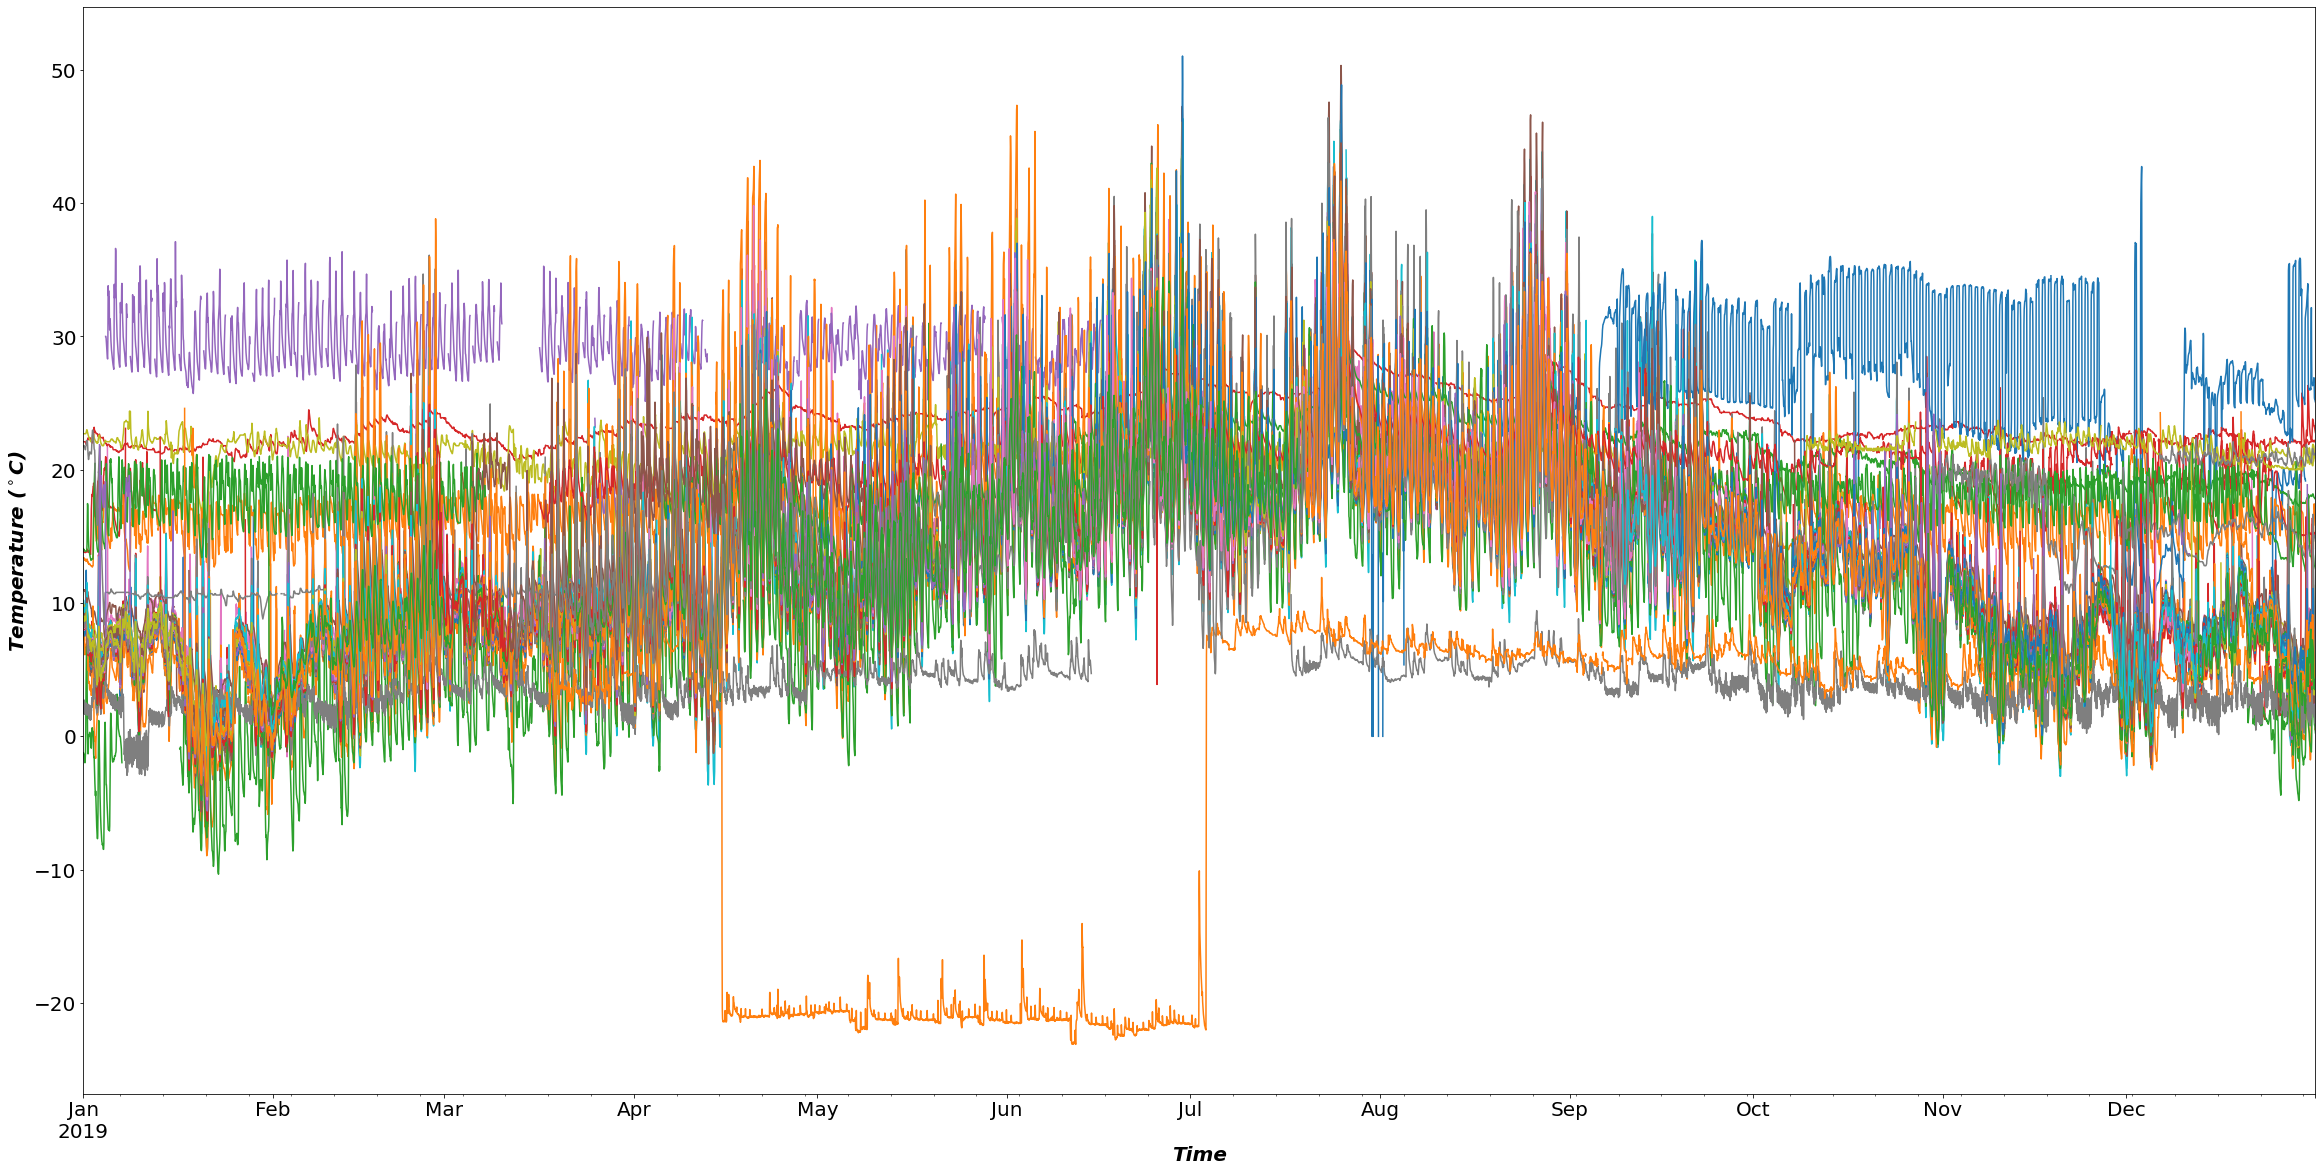

In [13]:
#plotting the hourly data by stations ID's
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40,20))
data_2019_grp_grp.plot(x='time',y='Temperature',ax=ax,legend=False)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Time',fontsize=20, weight='bold', fontstyle='oblique')
plt.ylabel('Temperature ($^\circ$C)', fontsize=20, weight='bold', fontstyle='oblique')

In [3]:
data_2019_grp1 = data_2019.groupby('station_id').resample('D').mean()

In [4]:
data_2019_grp_grp1 = data_2019_grp1.reset_index().groupby('station_id')

Text(0, 0.5, 'Temperature ($^\\circ$C)')

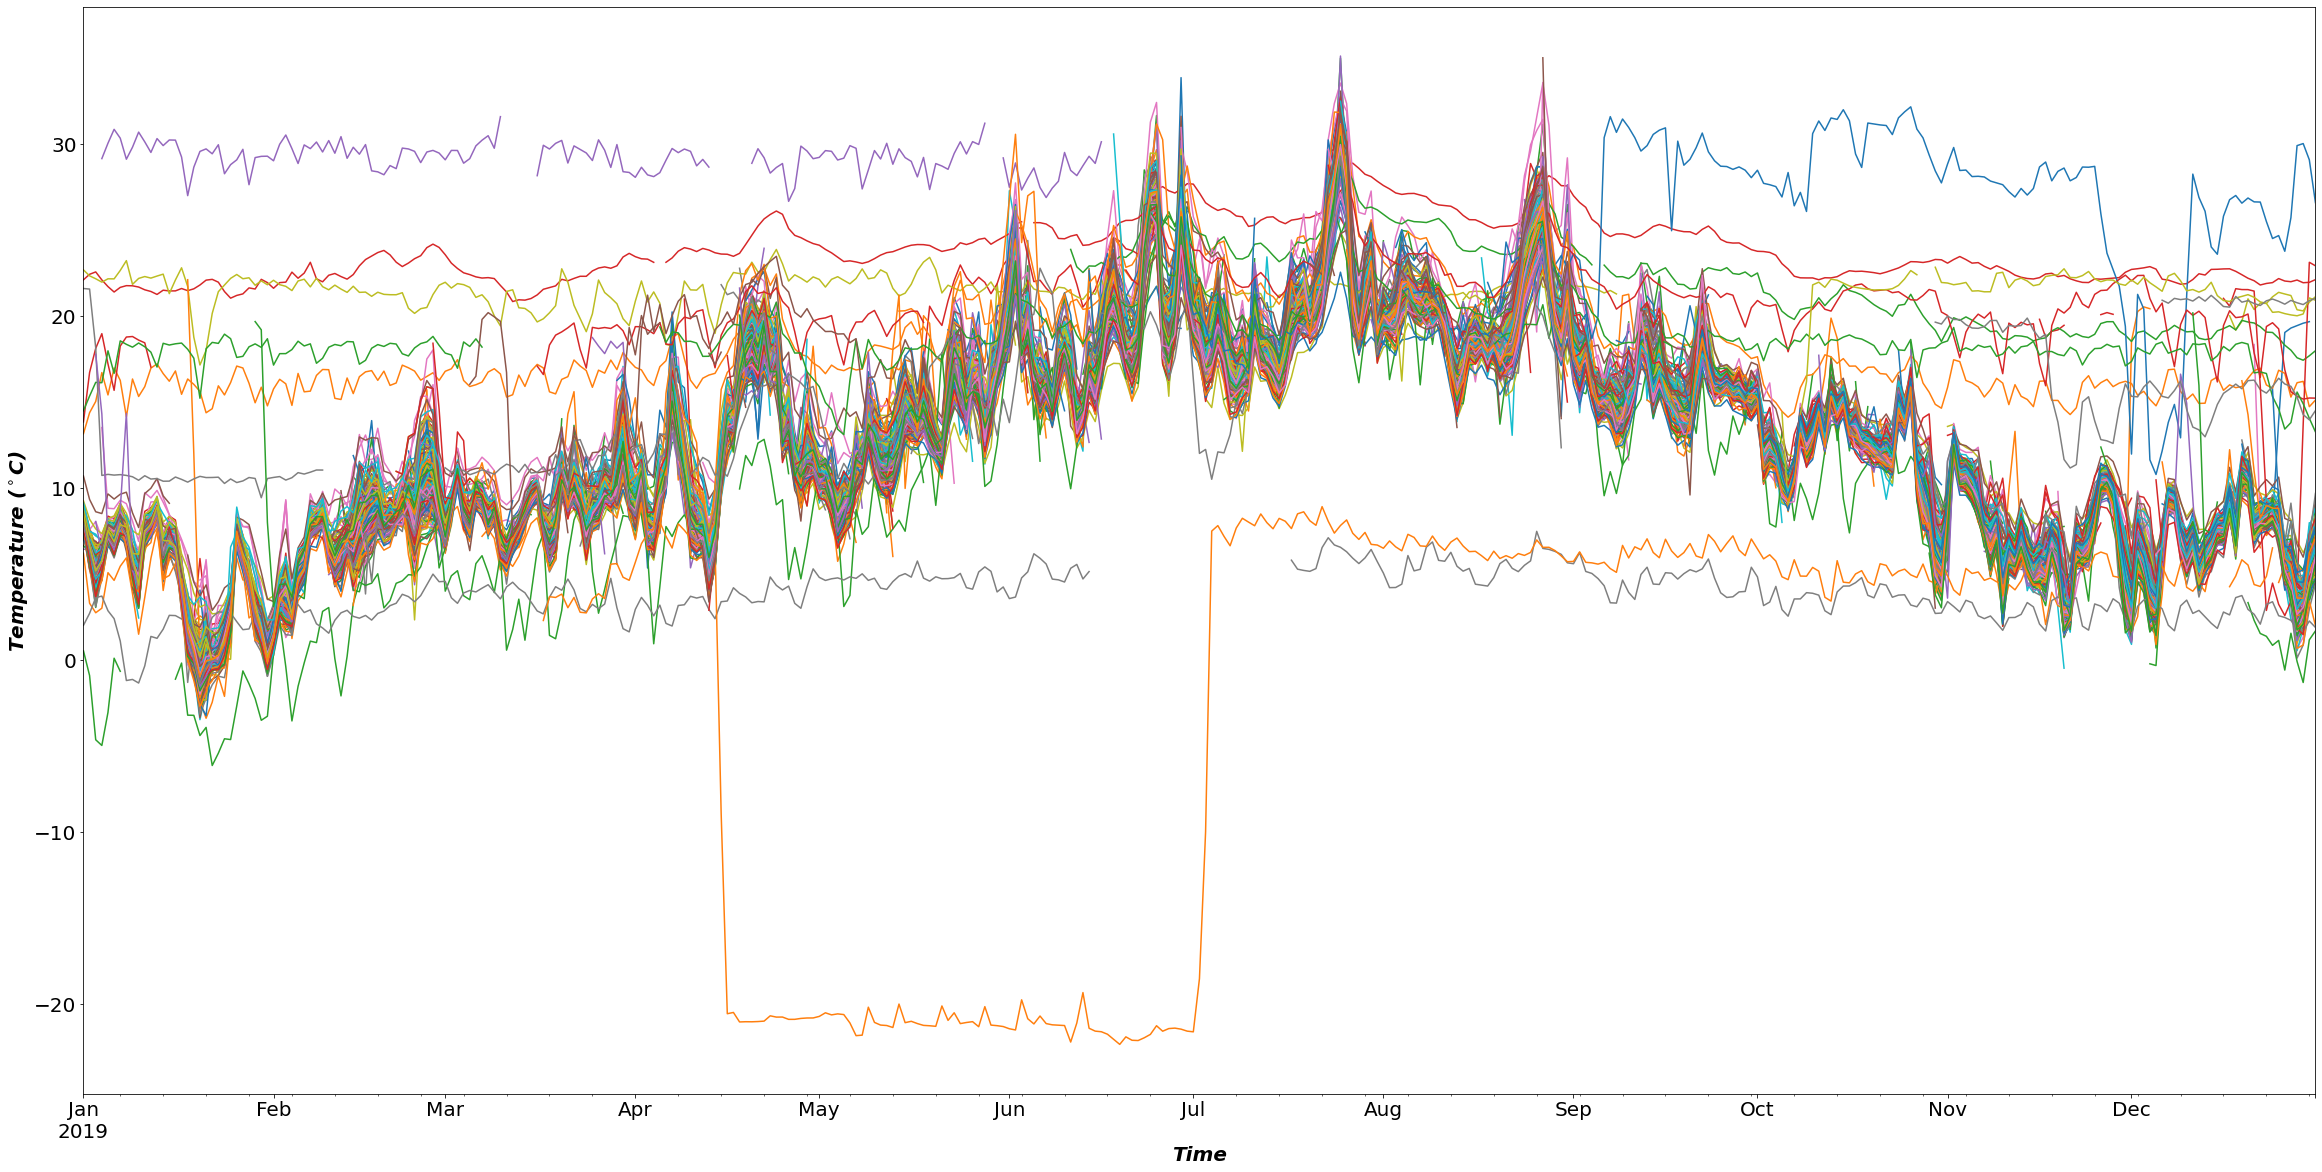

In [5]:
#plotting the daily data
fig, ax = plt.subplots(figsize=(40,20))
data_2019_grp_grp1.plot(x='time',y='Temperature',ax=ax,legend=False)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Time',fontsize=20, weight='bold', fontstyle='oblique')
plt.ylabel('Temperature ($^\circ$C)', fontsize=20, weight='bold', fontstyle='oblique')

In [260]:
#reading the reference station
os.chdir('C:\\Users\donna\\')
reference11 = pd.read_csv('referentiestation.csv')

Text(0, 0.5, 'Temperature ($^\\circ$C)')

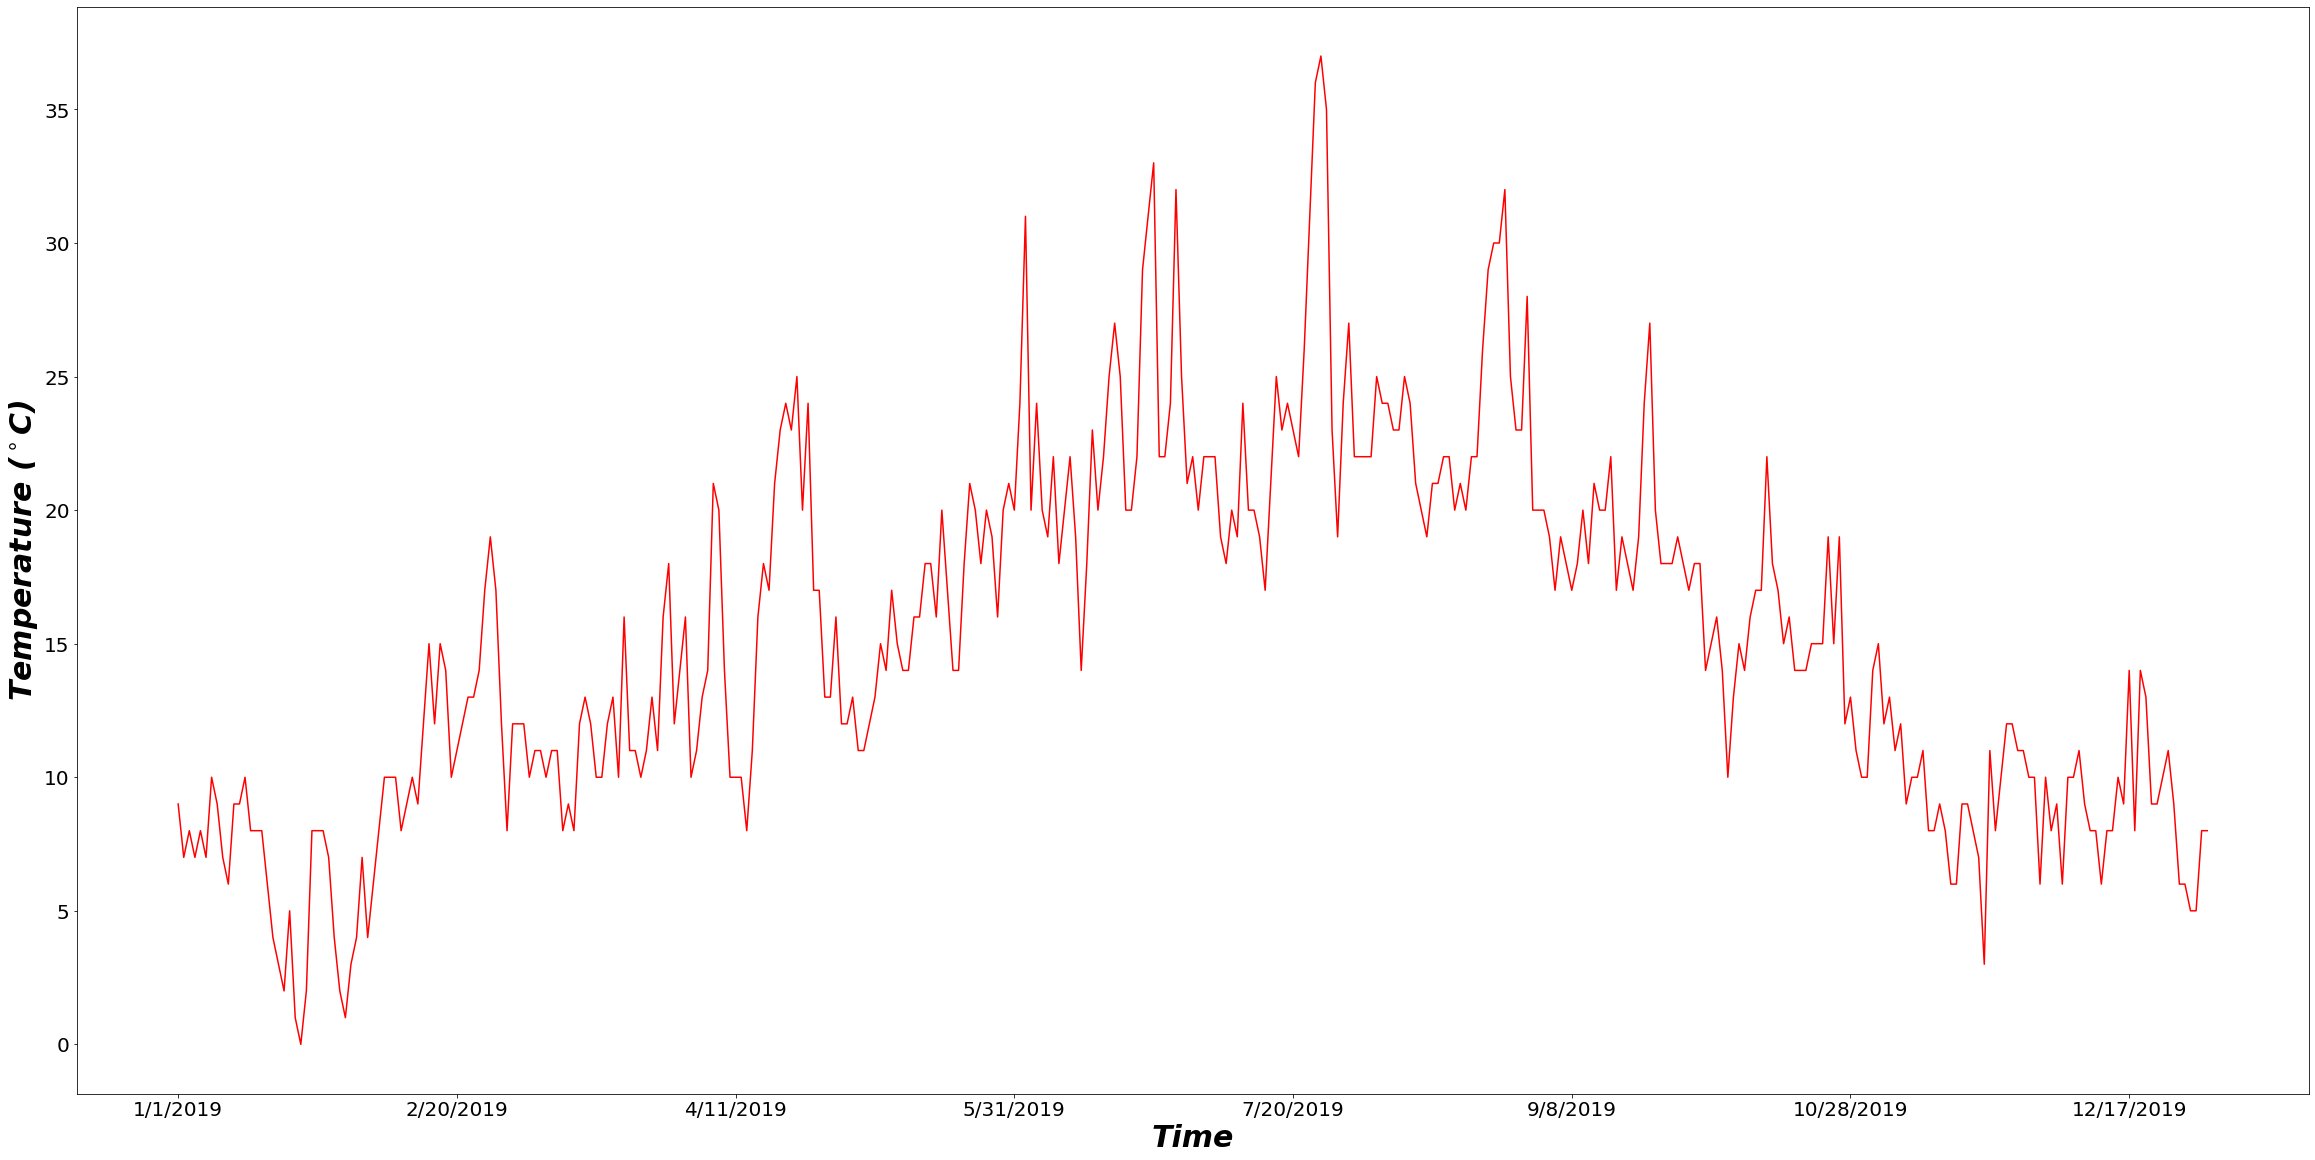

In [185]:
#here I plot the reference station 
fig, ax = plt.subplots(figsize=(40,20))
reference11.plot(x='time',y='Temperature',ax=ax,legend=False,color='red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Time',fontsize=30, weight='bold', fontstyle='oblique')
plt.ylabel('Temperature ($^\circ$C)', fontsize=30, weight='bold', fontstyle='oblique')

In [5]:
gdf = gpd.GeoDataFrame(data_2019, geometry=gpd.points_from_xy(x=data_2019['longitude'], y=data_2019['latitude']))
gdf.crs = {'init': 'epsg:4326'}

C:\Users\donna\anaconda3\envs\bep\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


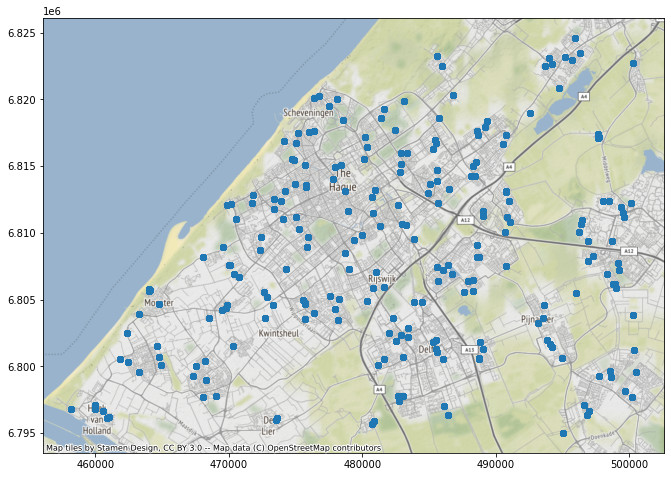

In [7]:
ax = gdf.to_crs(epsg=3857).plot(figsize=(18,8))
ctx.add_basemap(ax=ax)